<div style="display: flex; align-items: center; justify-content: left; padding: 0px;">
    <div class="logo-container" style="flex:0.13;height:100%;">
        <img src="https://raw.githubusercontent.com/andikaaa18/Tripleten_datascience_project/main/Assets/logo_tripleten.png" alt="Logo" style="max-height: 155px; width: auto; filter:invert(0%);">
    </div>
    <div class="title-container" style="flex:0.85;height:75%;text-align: left">
        <div style="margin: 0px 0px 0px 0px; font-size: 40px; font-family:Trebuchet MS; font-weight:bold; line-height:40px;">Tripleten Indonesia Project</div>
        <div style="margin: 0px 0px 0px 0px; font-size: 30px; font-family:Trebuchet MS;">&mdash; Sprint 17 : Final Project</div>
    </div>
</div>

<hr style="width:95%;height:2px;background-color:black;" align="left">

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:35px; text-align:left; line-height:40px">
Churn Analysis and Prediction for Telecommunication Services
</div>
<div style="font-family:Trebuchet MS; font-weight:regular; font-size:20px; text-align:left; ">
&mdash; Strategi proaktif untuk meningkatkan retensi pelanggan layanan telekomunikasi.
</div>

# **A. Pendahuluan**

## 1) Deskripsi Proyek

<h4 style="font-family:Trebuchet MS; font-weight:bold; padding-bottom:0px">Sebuah perusahaan layanan telekomunikasi ingin meningkatkan retensi pelanggan dengan memberikan kode promosi dan paket khusus.</h4>

<div style="margin-left:2%; width:95%; text-align:justify">

Saat ini kita bekerja untuk perusahaan operator telekomunikasi bernama **Interconnect**. Perusahaan ingin meramalkan tingkat *churn* klien mereka agar dapat meningkatkan retensi pelanggan. Apabila diketahui bahwa seorang klien berencana untuk berhenti berlangganan, maka klien tersebut akan ditawari kode promosi dan opsi paket khusus agar mereka tetap berlangganan. Tim pemasaran **Interconnect** telah mengumpulkan beberapa data pribadi klien, termasuk informasi tentang paket yang dipilih dan kontrak mereka. Tugas kita pada proyek ini yaitu melakukan *churn analysis* dan membuat model prediktif untuk tingkat *churn*.
</div>

## 2) Tentang Layanan `Interconnect`

<h4 style="font-family:Trebuchet MS; font-weight:bold; padding-bottom:0px">Interconnect menyediakan dua jenis layanan utama:</h4>

<div style="margin-left:2%; width:95%; text-align:justify">

1. Jaringan telepon rumah. Telepon bisa disambungkan ke beberapa saluran secara bersamaan.
2. Internet. Jaringan internet dapat diatur melalui saluran telepon (DSL, digital subscriber line) atau melalui kabel serat optik.
</div>

<h4 style="font-family:Trebuchet MS; font-weight:bold; padding-bottom:0px">Beberapa layanan lain yang disediakan Interconnect meliputi:</h4>

<div style="margin-left:2%; width:95%; text-align:justify">

* Keamanan Internet: perangkat lunak antivirus (DeviceProtection) dan pemblokir situs web berbahaya (OnlineSecurity)
* Jalur dukungan teknis khusus (TechSupport)
* Penyimpanan cloud untuk file dan backup data (OnlineBackup)
* Streaming TV (StreamingTV) dan direktori film (StreamingMovies)

Klien dapat memilih untuk melakukan pembayaran secara bulanan atau menandatangani kontrak untuk berlangganan selama 1 atau 2 tahun. Mereka bisa menggunakan beragam metode pembayaran dan menerima tagihan elektronik setelah melakukan transaksi.
</div>

## 3) Tujuan dan Alur Proyek

<h3 style="font-family:Trebuchet MS; font-weight:bold">Tujuan</h3>
<div style="margin-left:2%; width:95%; text-align:justify">

Berikut di bawah ini merupakan tujuan yang ingin dicapai pada proyek ini:
1. Melakukan *churn analysis* agar dapat menemukan cara lain untuk mempertahankan pelanggan.
2. Membuat model prediktif yang dapat memprediksi tingkat *churn* pelanggan layanan telekomunikasi di perusahaan Interconnect secara akurat. Persyaratan minimum yang harus dicapai pada proyek ini yaitu memperoleh skor AUC-ROC sebesar 0,88 ketika memprediksi *test set*.
</div>

<h3 style="font-family:Trebuchet MS; font-weight:bold">Alur Proyek</h3>
<div style="margin-left:2%; width:95%;text-align:justify">

Adapun proses yang akan dilakukan dalam proses analis untuk proyek ini terdiri dari beberapa langkah utama, yaitu:
1. **Ikhtisar Data.** <div> Pada bagian ini, data yang telah diimpor akan dipahami setiap parameter data serta sejumlah catatan dokumentasi terkait dataset.</div>        
2. **Mempersiapkan Data.** <div> Pada bagian ini, data yang telah diimpor akan dilakukan proses eksplorasi untuk melihat berbagai permasalahan pada data kemudian dilanjutkan dengan perbaikan data. Apabila diperlukan, reduksi dan pengayaan data akan dilakukan untuk membuang informasi yang tidak relevan dan memperkaya informasi pada dataset. Hasil akhir dari proses ini yaitu dataset yang siap untuk dilakukan proses analisis.</div>        
3. **Analisa Data Eksploratif.** <div> Pada bagian ini, data yang telah dipersiapkan akan diolah untuk memperoleh informasi penting dengan melakukan sejumlah perhitungan statistik dan visualisasi data.</div>
4. **Membangun Model *Machine-learning*.** <div> Pada bagian ini akan dilakukan sejumlah proses, diantaranya: *feature engineering*, melakukan optimasi model, dan diakhiri dengan evaluasi model menggunakan *testing dataset* untuk memutuskan model terbaik.
</div>

</div>

# **B. Memuat Data**

* Memuat sejumlah *library* dan data yang dibutuhkan.

In [1]:
# library for data processing
import pandas as pd
import numpy as np
from scipy.stats import chi2, chi2_contingency, ttest_ind, mannwhitneyu
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# library for data visualization
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import plotly.express as px

# library for building models
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# library model evaluation
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, confusion_matrix

# other
import warnings
import joblib
import re
import ast
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

d:\~BelajarProg\Python\Bootcamp_Practicum\17_Final_Project_Telecom\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# setting grafik untuk visualisasi data
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-v0_8')

In [3]:
# memuat dataset
try:
    contract = pd.read_csv("../datasets/final_provider/contract.csv")
    internet = pd.read_csv("../datasets/final_provider/internet.csv")
    personal = pd.read_csv("../datasets/final_provider/personal.csv")
    phone = pd.read_csv("../datasets/final_provider/phone.csv")
    
except:
    contract = pd.read_csv("/datasets/final_provider/contract.csv")
    internet = pd.read_csv("/datasets/final_provider/internet.csv")
    personal = pd.read_csv("/datasets/final_provider/personal.csv")
    phone = pd.read_csv("/datasets/final_provider/phone.csv")

# **C. Ikhtisar Data**

## 1) Contract

Berikut di bawah ini merupakan 10 sampel data pada dataset `contract`.

In [4]:
# menampilkan data contract
print(f"Ukuran dataset: {contract.shape}")
contract.sample(10, random_state=101010)

Ukuran dataset: (7043, 8)


customerID   BeginDate              EndDate            Type  \
2061  4958-GZWIY  2019-04-01  2019-11-01 00:00:00  Month-to-month   
633   7665-VIGUD  2019-04-01                   No        One year   
3359  3623-FQBOX  2018-05-01                   No  Month-to-month   
1266  1251-STYSZ  2019-10-01                   No  Month-to-month   
1909  3750-YHRYO  2019-07-01                   No        One year   
6546  9828-QHFBK  2018-02-01                   No  Month-to-month   
4044  2126-GSEGL  2014-04-01                   No        Two year   
869   0323-XWWTN  2019-11-01                   No        Two year   
4638  7817-BOQPW  2019-09-01  2019-11-01 00:00:00  Month-to-month   
4070  0531-ZZJWQ  2015-07-01                   No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
2061               No           Electronic check           48.70       340.25  
633                No               Mailed check           20.35        176.3  
3359              Yes               Mailed check           19.95        416.4  
1266              Yes           Electronic check           80.25        303.7  
1909               No               Mailed check           20.65          150  
6546              Yes           Electronic check           51.15       1275.7  
4044              Yes  Bank transfer (automatic)           84.80      5917.55  
869               Yes               Mailed check           26.40       121.25  
4638              Yes           Electronic check           75.55        166.3  
4070              Yes           Electronic check           74.00       4052.4

Berikut di bawah ini merupakan deskripsi dari masing-masing kolom berdasarkan dokumentasi pada dataset.

* `customerID` &mdash; ID unik untuk setiap pelanggan layanan telekomunikasi.
* `BeginDate` &mdash; Tanggal mulai pelanggan berlangganan layanan telekomunikasi.
* `EndDate` &mdash; Tanggal berakhirnya layanan pelanggan. Apabila pelanggan masih aktif berlangganan, maka nilai pada kolom ini adalah 'No'.
* `Type` &mdash; Jenis kontrak berlangganan yang dipilih oleh pelanggan. Terdapat tiga opsi, yaitu bulanan, 1 tahun atau 2 tahun.
* `PaperlessBilling` &mdash; Indikator apakah pelanggan memilih untuk menerima tagihan secara elektronik (tanpa kertas).
* `PaymentMethod` &mdash; Metode pembayaran yang dipilih oleh pelanggan untuk membayar tagihan. Terdapat empat opsi, yaitu transfer bank, kartu kredit, cek elektronik, atau via pos (*mailed check*).
* `MonthlyCharges` &mdash; Jumlah biaya bulanan yang dibayar oleh pelanggan untuk layanan telekomunikasi (dalam USD).
* `TotalCharges` &mdash; Total biaya yang dibayar oleh pelanggan selama masa berlangganan (dalam USD).

Data pada `contract.csv` berisi tentang informasi kontrak berlangganan setiap pelanggan layanan telekomunikasi perusahaan **Interconnect**. Informasi kontrak di atas merupakan informasi yang berlaku **per tanggal 1 Februari 2020**. 

## 2) Internet

Berikut di bawah ini merupakan 10 sampel data pada dataset `internet`.

In [5]:
# menampilkan data internet
print(f"Ukuran dataset: {internet.shape}")
internet.sample(10, random_state=101010)

Ukuran dataset: (5517, 8)


customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
3313  6481-LXPWL             DSL             No          Yes              Yes   
4866  7153-OANIO     Fiber optic             No           No               No   
4996  7921-BEPCI             DSL            Yes          Yes               No   
4853  1496-GGSUK             DSL             No           No               No   
3270  1209-VFFOC             DSL            Yes          Yes              Yes   
3055  6372-RFVNS     Fiber optic             No           No               No   
1325  4737-AQCPU             DSL            Yes          Yes              Yes   
4920  1597-LHYNC     Fiber optic            Yes          Yes               No   
2477  9097-ZUBYC             DSL             No           No               No   
3204  4282-YMKNA     Fiber optic             No           No               No   

     TechSupport StreamingTV StreamingMovies  
3313          No          No              No  
4866          No          No              No  
4996          No          No              No  
4853          No          No              No  
3270         Yes          No             Yes  
3055          No         Yes              No  
1325         Yes          No              No  
4920          No          No             Yes  
2477         Yes          No              No  
3204          No          No              No

Data pada `internet.csv` berisi informasi tentang layanan internet yang digunakan oleh setiap pelanggan. Berikut di bawah ini merupakan deskripsi dari masing-masing kolom berdasarkan dokumentasi pada dataset.

* `customerID` &mdash; ID unik untuk setiap pelanggan layanan telekomunikasi.
* `'InternetService'` &mdash; Jenis layanan internet yang digunakan oleh pelanggan. Terdapat dua opsi, yaitu DSL (*digital subscriber line*) atau *fiber optic*.
* `'OnlineSecurity'` &mdash; Menunjukkan apakah pelanggan berlangganan layanan *online security*.
* `'OnlineBackup'` &mdash; Menunjukkan apakah pelanggan berlangganan layanan *cloud* untuk *online backup*.
* `'DeviceProtection'` &mdash; Menunjukkan apakah pelanggan berlangganan layanan anti-virus.
* `'TechSupport'` &mdash; Menunjukkan apakah pelanggan berlangganan layanan dukungan teknis.
* `'StreamingTV'` &mdash; Menunjukkan apakah pelanggan berlangganan layanan *streaming* TV.
* `'StreamingMovies'` &mdash; Menunjukkan apakah pelanggan berlangganan layanan *streaming* film.

## 3) Personal

Berikut di bawah ini merupakan 10 sampel data pada dataset `personal`.

In [6]:
# menampilkan data personal
print(f"Ukuran dataset: {personal.shape}")
personal.sample(10, random_state=101010)

Ukuran dataset: (7043, 5)


customerID  gender  SeniorCitizen Partner Dependents
2061  4958-GZWIY    Male              0     Yes        Yes
633   7665-VIGUD    Male              0      No         No
3359  3623-FQBOX    Male              0      No         No
1266  1251-STYSZ  Female              1      No         No
1909  3750-YHRYO    Male              0     Yes        Yes
6546  9828-QHFBK    Male              0      No         No
4044  2126-GSEGL  Female              0     Yes         No
869   0323-XWWTN    Male              0      No        Yes
4638  7817-BOQPW  Female              0      No         No
4070  0531-ZZJWQ    Male              1     Yes         No

Data pada `personal.csv` berisi informasi tentang data pribadi setiap pelanggan. Berikut di bawah ini merupakan deskripsi dari masing-masing kolom berdasarkan dokumentasi pada dataset.

* `customerID` &mdash; ID unik untuk setiap pelanggan layanan telekomunikasi.
* `'gender'` &mdash; Jenis kelamin pelanggan.
* `'SeniorCitizen'` &mdash; Menunjukkan apakah pelanggan merupakan kategori lanjut usia/lansia (usia &ge; 60 tahun).
* `'Partner'` &mdash; Menunjukkan apakah pelanggan memiliki pasangan.
* `'Dependents'` &mdash; Menunjukkan apakah pelanggan memiliki tanggungan, seperti anak-anak atau orang lain yang mereka tanggung.

## 4) Phone

Berikut di bawah ini merupakan 10 sampel data pada dataset `phone`.

In [7]:
# menampilkan data phone
print(f"Ukuran dataset: {phone.shape}")
phone.sample(10, random_state=101010)

Ukuran dataset: (6361, 2)


customerID MultipleLines
4333  1043-UXOVO           Yes
6049  5161-XEUVX           Yes
4445  3162-ZJZFU            No
2021  4365-MSDYN            No
258   2294-SALNE            No
2484  3426-NIYYL           Yes
5278  0787-LHDYT            No
180   9323-HGFWY            No
5599  3719-TDVQB            No
510   6967-QIQRV            No

Data pada `phone.csv` berisi informasi tentang layanan telepon yang digunakan setiap pelanggan. Berikut di bawah ini merupakan deskripsi dari masing-masing kolom berdasarkan dokumentasi pada dataset.

* `customerID` &mdash; ID unik untuk setiap pelanggan layanan telekomunikasi.
* `MultipleLines` &mdash; Menunjukkan apakah pelanggan memiliki lebih dari satu saluran telepon (*multi-channel*).

# **D. Mempersiapkan Data**

## 1) Eksplorasi Data

### **Data Contract**

Berikut di bawah ini merupakan informasi umum dataset.

In [8]:
# informasi data
contract.info()
print()
contract.sample(10, random_state=101010)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB



customerID   BeginDate              EndDate            Type  \
2061  4958-GZWIY  2019-04-01  2019-11-01 00:00:00  Month-to-month   
633   7665-VIGUD  2019-04-01                   No        One year   
3359  3623-FQBOX  2018-05-01                   No  Month-to-month   
1266  1251-STYSZ  2019-10-01                   No  Month-to-month   
1909  3750-YHRYO  2019-07-01                   No        One year   
6546  9828-QHFBK  2018-02-01                   No  Month-to-month   
4044  2126-GSEGL  2014-04-01                   No        Two year   
869   0323-XWWTN  2019-11-01                   No        Two year   
4638  7817-BOQPW  2019-09-01  2019-11-01 00:00:00  Month-to-month   
4070  0531-ZZJWQ  2015-07-01                   No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
2061               No           Electronic check           48.70       340.25  
633                No               Mailed check           20.35        176.3  
3359              Yes               Mailed check           19.95        416.4  
1266              Yes           Electronic check           80.25        303.7  
1909               No               Mailed check           20.65          150  
6546              Yes           Electronic check           51.15       1275.7  
4044              Yes  Bank transfer (automatic)           84.80      5917.55  
869               Yes               Mailed check           26.40       121.25  
4638              Yes           Electronic check           75.55        166.3  
4070              Yes           Electronic check           74.00       4052.4

In [9]:
# memeriksa duplikasi
print(f"Jumlah data duplikat: {contract.duplicated(subset='customerID').sum()}")

Jumlah data duplikat: 0


Dari hasil di atas, berikut informasi yang diperoleh.

* Data `contract` memiliki sebanyak 7043 baris dan 8 kolom.
* Tidak ditemukan `Null value` pada data.
* Tidak terdapat data duplikat.
* Perlu dilakukan transformasi nilai 'No' pada kolom `EndDate` menjadi `Null value` agar tidak merusak struktur data.
* Perlu dilakukan perbaikan tipe data untuk sejumlah kolom, yaitu `BeginDate`, `EndDate` dan `TotalCharges`.
* Kolom `PaperlessBilling` menggunakan nilai 'No' atau 'Yes', sebaiknya menggunakan nilai 0 atau 1 untuk efisiensi proses.

Meskipun tidak ditemukan *missing value* pada data secara eksplisit, akan tetapi pada kolom `TotalCharges` ditemukan nilai *empty string* (' ').

In [10]:
# data empty string pada kolom 'TotalCharges'
contract.query("TotalCharges==' '")

customerID   BeginDate EndDate      Type PaperlessBilling  \
488   4472-LVYGI  2020-02-01      No  Two year              Yes   
753   3115-CZMZD  2020-02-01      No  Two year               No   
936   5709-LVOEQ  2020-02-01      No  Two year               No   
1082  4367-NUYAO  2020-02-01      No  Two year               No   
1340  1371-DWPAZ  2020-02-01      No  Two year               No   
3331  7644-OMVMY  2020-02-01      No  Two year               No   
3826  3213-VVOLG  2020-02-01      No  Two year               No   
4380  2520-SGTTA  2020-02-01      No  Two year               No   
5218  2923-ARZLG  2020-02-01      No  One year              Yes   
6670  4075-WKNIU  2020-02-01      No  Two year               No   
6754  2775-SEFEE  2020-02-01      No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges  
488   Bank transfer (automatic)           52.55               
753                Mailed check           20.25               
936                Mailed check           80.85               
1082               Mailed check           25.75               
1340    Credit card (automatic)           56.05               
3331               Mailed check           19.85               
3826               Mailed check           25.35               
4380               Mailed check           20.00               
5218               Mailed check           19.70               
6670               Mailed check           73.35               
6754  Bank transfer (automatic)           61.90

In [11]:
# apakah nilai empty string pada 'TotalCharges' berkaitan dengan 'BeginDate' 2020-02-01 ?
print("apakah nilai empty string pada 'TotalCharges' berkaitan dengan 'BeginDate' 2020-02-01 ?\n>>>", end=' ')
print((contract.query("BeginDate=='2020-02-01'").index == contract.query("TotalCharges==' '").index).any())

apakah nilai empty string pada 'TotalCharges' berkaitan dengan 'BeginDate' 2020-02-01 ?
>>> True


Dari hasil di atas, berikut informasi yang diperoleh.

* Nilai kosong pada kolom `TotalCharges` berkaitan dengan data pelanggan yang mulai berlangganan pada tanggal 1 Februari 2020. Hal ini dapat terjadi karena proses penarikan data juga dilakukan per tanggal 1 Februari 2020. Oleh karena itu, data *empty string* pada kolom `TotalCharges` akan dianggap sebagai *missing value* dan akan dibuang dari dataset karena tidak relevan untuk proyek ini. 

### **Data Internet**

Berikut di bawah ini merupakan informasi umum dataset.

In [12]:
# informasi data
internet.info()
print()
internet.sample(10, random_state=101010)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB



customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
3313  6481-LXPWL             DSL             No          Yes              Yes   
4866  7153-OANIO     Fiber optic             No           No               No   
4996  7921-BEPCI             DSL            Yes          Yes               No   
4853  1496-GGSUK             DSL             No           No               No   
3270  1209-VFFOC             DSL            Yes          Yes              Yes   
3055  6372-RFVNS     Fiber optic             No           No               No   
1325  4737-AQCPU             DSL            Yes          Yes              Yes   
4920  1597-LHYNC     Fiber optic            Yes          Yes               No   
2477  9097-ZUBYC             DSL             No           No               No   
3204  4282-YMKNA     Fiber optic             No           No               No   

     TechSupport StreamingTV StreamingMovies  
3313          No          No              No  
4866          No          No              No  
4996          No          No              No  
4853          No          No              No  
3270         Yes          No             Yes  
3055          No         Yes              No  
1325         Yes          No              No  
4920          No          No             Yes  
2477         Yes          No              No  
3204          No          No              No

In [13]:
# memeriksa duplikasi
print(f"Jumlah data duplikat: {internet.duplicated(subset='customerID').sum()}")

Jumlah data duplikat: 0


Dari hasil di atas, berikut informasi yang diperoleh.

* Data `internet` memiliki sebanyak 5517 baris dan 8 kolom.
* Tidak ditemukan `Null value` pada data.
* Tidak terdapat data duplikat.
* Kolom `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, dan `StreamingMovies` menggunakan nilai 'No' atau 'Yes', sebaiknya menggunakan nilai 0 atau 1 untuk efisiensi proses.

### **Data Personal**

Berikut di bawah ini merupakan informasi umum dataset.

In [14]:
# informasi data
personal.info()
print()
personal.sample(10, random_state=101010)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB



customerID  gender  SeniorCitizen Partner Dependents
2061  4958-GZWIY    Male              0     Yes        Yes
633   7665-VIGUD    Male              0      No         No
3359  3623-FQBOX    Male              0      No         No
1266  1251-STYSZ  Female              1      No         No
1909  3750-YHRYO    Male              0     Yes        Yes
6546  9828-QHFBK    Male              0      No         No
4044  2126-GSEGL  Female              0     Yes         No
869   0323-XWWTN    Male              0      No        Yes
4638  7817-BOQPW  Female              0      No         No
4070  0531-ZZJWQ    Male              1     Yes         No

In [15]:
# memeriksa duplikasi
print(f"Jumlah data duplikat: {personal.duplicated(subset='customerID').sum()}")

Jumlah data duplikat: 0


Dari hasil di atas, berikut informasi yang diperoleh.

* Data `personal` memiliki sebanyak 7043 baris dan 5 kolom.
* Tidak ditemukan `Null value` pada data.
* Tidak terdapat data duplikat.
* Kolom `Partner` dan `Dependents` menggunakan nilai 'No' atau 'Yes', sebaiknya menggunakan nilai 0 atau 1 untuk efisiensi proses.

### **Data Phone**

Berikut di bawah ini merupakan informasi umum dataset.

In [16]:
# informasi data
phone.info()
print()
phone.sample(10, random_state=101010)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB



customerID MultipleLines
4333  1043-UXOVO           Yes
6049  5161-XEUVX           Yes
4445  3162-ZJZFU            No
2021  4365-MSDYN            No
258   2294-SALNE            No
2484  3426-NIYYL           Yes
5278  0787-LHDYT            No
180   9323-HGFWY            No
5599  3719-TDVQB            No
510   6967-QIQRV            No

In [17]:
# memeriksa duplikasi
print(f"Jumlah data duplikat: {phone.duplicated(subset='customerID').sum()}")

Jumlah data duplikat: 0


Dari hasil di atas, berikut informasi yang diperoleh.

* Data `phone` memiliki sebanyak 6361 baris dan 2 kolom.
* Tidak ditemukan `Null value` pada data.
* Tidak terdapat data duplikat.
* Kolom `MultipleLines` menggunakan nilai 'No' atau 'Yes', sebaiknya menggunakan nilai 0 atau 1 untuk efisiensi proses.

### **Kesimpulan**

Dari hasil eksplorasi yang dilakukan, berikut merupakan sejumlah masalah pada data dan harus ditangani pada tahap berikutnya.
1. Terdapat *missing value* pada data `contract` di kolom `TotalCharges` berupa *empty string* (' '). Hal ini diakibatkan pelanggan yang mulai berlangganan pada tanggal 1 Februari 2020 dimana proses penarikan data dilakukan per tanggal tersebut. Data ini harus dibuang dari dataset karena tidak relevan pada proyek ini.
2. Terdapat struktur data yang tidak homogen pada data `contract` di kolom `EndDate` dimana data tanggal bercampur dengan nilai `'No'` yang menunjukkan bahwa klien masih berlangganan layanan telekomunikasi. Ganti nilai `'No'` menjadi `Null Value` agar tidak merusak struktur data.
3. Pada data `contract` di kolom `BeginDate`, `EndDate` dan `TotalCharges`, perlu dilakukan perbaikan tipe data.
4. Terdapat sejumlah kolom pada seluruh data yang bersifat variabel biner. Lakukan pergantian nilai 'No' atau 'Yes' pada kolom tersebut menjadi nilai 0 atau 1 untuk efisiensi proses. Berikut merupakan nama-nama kolom tersebut:
    * Data `contract` : kolom `PaperlessBilling`.
    * Data `internet` : kolom `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, dan `StreamingMovies`.
    * Data `personal` : kolom `Partner` dan `Dependents`.
    * Data `phone` $~~~~~$ : kolom `MultipleLines`.

## 2) Memperbaiki Data

### **Missing Value Pada `TotalCharges`**

Pada tahap sebelumnya ditemukan *missing value* pada data `contract` di kolom `TotalCharges` berupa *empty string*. Data-data tersebut terkait dengan pelanggan yang mulai berlangganan layanan pada tanggal 1 Februari 2020. Adapun data pada proyek ini merupakan data per 1 Februari 2020 juga, sehingga pelanggan yang mulai berlangganan pada tanggal tersebut akan kita buang dari dataset karena tidak relevan pada proyek ini.

Proses pembuangan data tidak hanya pada data `contract`, tetapi juga pada data lainnya untuk `customerID` yang sama.

In [18]:
def remove_data(customer_ids, *df):
    df_list = []
    for data in df:
        data = data.query("~customerID.isin(@customer_ids)")
        data = data.reset_index(drop=True)
        df_list.append(data)

    return df_list

In [19]:
# membuang data client dengan nilai empty string pada data contract di kolom 'TotalCharges' 
remove_ids = contract[contract['TotalCharges'] == ' ']['customerID'].values

contract, internet, personal, phone = remove_data(remove_ids, contract, internet, personal, phone)

### **Nilai `'No'` Pada `EndDate`**

Nilai `No` pada data `contract` di kolom `EndDate` merujuk pada pelanggan yang masih berlangganan layanan telekomunikasi. Nilai `No` tersebut perlu diganti menjadi *Null Value* agar struktur data menjadi seragam dan dapat dilakukan perbaikan tipe data.

In [20]:
# replace nilai 'No' di kolom 'EndDate' menjadi np.nan
contract = contract.replace({'EndDate':'No'}, np.nan)

### **Tranformasi Nilai Variabel Biner**

Terdapat sejumlah kolom pada masing-masing data yang memiliki jenis data biner yang memiliki nilai 'No' atau 'Yes'. Kita perlu menggantinya menjadi nilai 0 atau 1 untuk menghasilkan proses yang efisien. Berikut merupakan kolom-kolom yang akan ditransformasikan nilainya menjadi `0` untuk `'No'` dan `1` untuk `'Yes'`:
* Data `contract` : kolom `PaperlessBilling`.
* Data `internet` : kolom `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, dan `StreamingMovies`.
* Data `personal` : kolom `Partner` dan `Dependents`.
* Data `phone` $~~~~~$ : kolom `MultipleLines`.

In [21]:
# transformasi nilai 'No' menjadi 0 dan 'Yes' menjadi 1
contract = contract.replace(['No', 'Yes'], [0, 1])
internet = internet.replace(['No', 'Yes'], [0, 1])
personal = personal.replace(['No', 'Yes'], [0, 1])
phone = phone.replace(['No', 'Yes'], [0, 1])

### **Perbaikan Tipe Data**

Perbaikan tipe data perlu dilakukan pada data `contract` di kolom `BeginDate`, `EndDate` dan `TotalCharges`. Kita akan memperbaiki tipe data kolom `BeginDate` dan `EndDate` menjadi *datetime*, sedangkan kolom `TotalCharges` menjadi tipe data *float64*.

In [22]:
# memperbaiki tipe data
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format="%Y-%m-%d")
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format="%Y-%m-%d %H:%M:%S")
contract['TotalCharges'] = contract['TotalCharges'].astype(float)

In [23]:
# memeriksa tipe data
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int64         
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 439.6+ KB


In [24]:
# memeriksa tipe data
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5512 non-null   object
 1   InternetService   5512 non-null   object
 2   OnlineSecurity    5512 non-null   int64 
 3   OnlineBackup      5512 non-null   int64 
 4   DeviceProtection  5512 non-null   int64 
 5   TechSupport       5512 non-null   int64 
 6   StreamingTV       5512 non-null   int64 
 7   StreamingMovies   5512 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 344.6+ KB


In [25]:
# memeriksa tipe data
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7032 non-null   object
 1   gender         7032 non-null   object
 2   SeniorCitizen  7032 non-null   int64 
 3   Partner        7032 non-null   int64 
 4   Dependents     7032 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 274.8+ KB


In [26]:
# memeriksa tipe data
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6352 entries, 0 to 6351
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6352 non-null   object
 1   MultipleLines  6352 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 99.4+ KB


### **Kesimpulan**

Seluruh permasalahan pada data telah selesai ditangani. Terdapat `Null Value` pada data `contract` di kolom `EndDate` yang mengindikasikan klien yang masih berlangganan layanan. Data tersebut bukan suatu *missing value* yang harus disingkirkan saat ini karena masih dapat digunakan pada tahap pengayaan data.

## 3) Pengayaan Data

Pada tahap ini, kita akan menambahkan kolom baru pada data `contract` yang bernama kolom `Churn`. Kolom `Churn` menunjukkan apakah klien berhenti berlangganan layanan telekomunikasi atau tidak. Klien yang melakukan *churn* dapat dilihat pada data `EndDate` yang memiliki nilai valid (`non-null`).

In [27]:
# menambahkan kolom 'Churn' pada data contract
contract['Churn'] = (~contract['EndDate'].isna()).apply(lambda x: 1 if x==True else 0)

# menampilkan data
contract.sample(10, random_state=101010)

customerID  BeginDate    EndDate            Type  PaperlessBilling  \
2360  7268-IGMFD 2018-08-01        NaT  Month-to-month                 0   
5166  0947-IDHRQ 2019-04-01 2019-11-01  Month-to-month                 1   
1950  0701-RFGFI 2016-01-01        NaT  Month-to-month                 1   
3047  5151-HQRDG 2017-01-01        NaT  Month-to-month                 1   
1468  7079-QRCBC 2017-11-01 2019-11-01  Month-to-month                 1   
1511  6198-RTPMF 2018-09-01        NaT  Month-to-month                 0   
5042  7762-URZQH 2014-06-01 2019-12-01        Two year                 1   
5826  4641-FROLU 2017-08-01        NaT        Two year                 0   
3878  4090-KPJIP 2019-11-01        NaT  Month-to-month                 1   
4491  6178-KFNHS 2019-01-01 2020-01-01  Month-to-month                 1   

                  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
2360  Bank transfer (automatic)           93.90       1743.90      0  
5166               Mailed check           80.30        526.70      1  
1950  Bank transfer (automatic)           95.40       4613.95      0  
3047               Mailed check           55.05       2030.75      0  
1468           Electronic check           98.75       2407.30      1  
1511           Electronic check           92.60       1579.70      0  
5042    Credit card (automatic)          106.05       6981.35      1  
5826               Mailed check           19.30        602.90      0  
3878           Electronic check           74.95        212.40      0  
4491           Electronic check           78.30        909.25      1

Pada tahap berikutnya, kita akan menambahkan kolom baru pada data `contract` yang bernama kolom `Duration`. Kolom ini menunjukkan berapa lama klien sudah berlangganan layanan telekomunikasi (dalam satuan hari), baik yang sudah *churn* atau yang masih setia berlangganan. Untuk klien yang masih berlangganan, maka perhitungan mengikuti selisih antara `BeginDate` terhadap tanggal 1 Februari 2020.

In [28]:
# menambahkan kolom 'Duration' pada data contract
contract['Duration'] = (contract['EndDate'].fillna('2020/02/01') - contract['BeginDate']).dt.days

# menampilkan data
contract.sample(10, random_state=101010)

customerID  BeginDate    EndDate            Type  PaperlessBilling  \
2360  7268-IGMFD 2018-08-01        NaT  Month-to-month                 0   
5166  0947-IDHRQ 2019-04-01 2019-11-01  Month-to-month                 1   
1950  0701-RFGFI 2016-01-01        NaT  Month-to-month                 1   
3047  5151-HQRDG 2017-01-01        NaT  Month-to-month                 1   
1468  7079-QRCBC 2017-11-01 2019-11-01  Month-to-month                 1   
1511  6198-RTPMF 2018-09-01        NaT  Month-to-month                 0   
5042  7762-URZQH 2014-06-01 2019-12-01        Two year                 1   
5826  4641-FROLU 2017-08-01        NaT        Two year                 0   
3878  4090-KPJIP 2019-11-01        NaT  Month-to-month                 1   
4491  6178-KFNHS 2019-01-01 2020-01-01  Month-to-month                 1   

                  PaymentMethod  MonthlyCharges  TotalCharges  Churn  Duration  
2360  Bank transfer (automatic)           93.90       1743.90      0       549  
5166               Mailed check           80.30        526.70      1       214  
1950  Bank transfer (automatic)           95.40       4613.95      0      1492  
3047               Mailed check           55.05       2030.75      0      1126  
1468           Electronic check           98.75       2407.30      1       730  
1511           Electronic check           92.60       1579.70      0       518  
5042    Credit card (automatic)          106.05       6981.35      1      2009  
5826               Mailed check           19.30        602.90      0       914  
3878           Electronic check           74.95        212.40      0        92  
4491           Electronic check           78.30        909.25      1       365

Pada tahap berikutnya kita akan menambahkan kolom baru pada data `internet` yang bernama kolom `Net_Addons_Num`. Kolom ini menunjukkan jumlah layanan internet tambahan yang digunakan oleh klien, seperti `OnlineSecurity`, `OnlineBackup`, dan lain-lain.

In [29]:
# menambahkan kolom 'Net_Addons_Num' pada data internet
net_add_ons = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet['Net_Addons_Num'] = internet[net_add_ons].sum(axis=1)

# menampilkan data
internet.sample(10, random_state=101010)

customerID InternetService  OnlineSecurity  OnlineBackup  \
2027  5780-INQIK             DSL               0             0   
3     7795-CFOCW             DSL               1             0   
3946  6133-OZILE             DSL               0             0   
5144  7426-GSWPO     Fiber optic               1             1   
3688  6119-SPUDB             DSL               1             0   
5107  1444-VVSGW     Fiber optic               1             1   
3174  2873-ZLIWT     Fiber optic               0             0   
4424  1121-QSIVB             DSL               0             1   
399   8205-OTCHB             DSL               0             1   
3030  2898-LSJGD             DSL               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
2027                 0            1            0                0   
3                    1            1            0                0   
3946                 1            1            0                0   
5144                 0            0            1                1   
3688                 1            1            0                0   
5107                 1            1            1                1   
3174                 1            1            0                0   
4424                 0            0            1                1   
399                  1            0            0                1   
3030                 1            0            1                1   

      Net_Addons_Num  
2027               1  
3                  3  
3946               2  
5144               4  
3688               3  
5107               6  
3174               2  
4424               3  
399                3  
3030               4

Data `contract` dan `personal` berisi seluruh data klien layanan telekomunikasi. Adapun data `internet` dan `phone` hanya berisi data klien yang menggunakan layanan tersebut. Oleh karena itu, pastikan seluruh ID klien dimasukkan pada data `phone` dan `internet`. 

Untuk pengguna yang hanya menggunakan layanan telepon, atur nilai-nilai berikut pada data `internet`:
* `InternetService` = ‘No internet’
* `OnlineSecurity` = 0
* `OnlineBackup` = 0
* `DeviceProtection` = 0
* `TechSupport` = 0
* `StreamingTV` = 0
* `StreamingMovies` = 0
* `Net_Addons_Num` = 0

In [30]:
# mengatur nilai untuk klien yang tidak berlangganan layanan internet
internet = contract[['customerID']].merge(internet, on='customerID', how='left')
internet['InternetService'] = internet['InternetService'].fillna('No internet')
internet = internet.fillna(0)

# menampilkan data
internet.info()
internet.sample(10, random_state=101010)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   InternetService   7032 non-null   object 
 2   OnlineSecurity    7032 non-null   float64
 3   OnlineBackup      7032 non-null   float64
 4   DeviceProtection  7032 non-null   float64
 5   TechSupport       7032 non-null   float64
 6   StreamingTV       7032 non-null   float64
 7   StreamingMovies   7032 non-null   float64
 8   Net_Addons_Num    7032 non-null   float64
dtypes: float64(7), object(2)
memory usage: 494.6+ KB


customerID InternetService  OnlineSecurity  OnlineBackup  \
2360  7268-IGMFD     Fiber optic             0.0           0.0   
5166  0947-IDHRQ     Fiber optic             0.0           0.0   
1950  0701-RFGFI     Fiber optic             0.0           0.0   
3047  5151-HQRDG             DSL             1.0           0.0   
1468  7079-QRCBC     Fiber optic             0.0           0.0   
1511  6198-RTPMF     Fiber optic             0.0           0.0   
5042  7762-URZQH     Fiber optic             1.0           0.0   
5826  4641-FROLU     No internet             0.0           0.0   
3878  4090-KPJIP     Fiber optic             0.0           0.0   
4491  6178-KFNHS     Fiber optic             1.0           0.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
2360               1.0          1.0          1.0              0.0   
5166               0.0          0.0          1.0              0.0   
1950               0.0          0.0          1.0              1.0   
3047               0.0          0.0          0.0              0.0   
1468               1.0          0.0          1.0              1.0   
1511               0.0          0.0          1.0              1.0   
5042               1.0          0.0          1.0              1.0   
5826               0.0          0.0          0.0              0.0   
3878               0.0          0.0          0.0              0.0   
4491               0.0          0.0          0.0              0.0   

      Net_Addons_Num  
2360             3.0  
5166             1.0  
1950             2.0  
3047             1.0  
1468             3.0  
1511             2.0  
5042             4.0  
5826             0.0  
3878             0.0  
4491             1.0

Untuk pengguna yang hanya menggunakan layanan internet, atur nilai-nilai berikut pada data `phone`:
* `MultipleLines` = ‘No line’

Untuk pengguna yang menggunakan layanan telepon, maka atur nilai kolom `MultipleLines` sebagai ‘Single line’ apabila kolom `MultipleLines` = 0 dan atur nilai kolom sebagai ‘Multi line’ apabila kolom `MultipleLines` = 1. Untuk selanjutnya, kolom `MultipleLines` akan diganti dengan nama 
`PhoneService` yang menunjukkan layanan telepon yang digunakan.

In [31]:
# mengatur nilai untuk klien yang tidak berlangganan layanan telepon
phone = contract[['customerID']].merge(phone, on='customerID', how='left')
phone['MultipleLines'] = phone['MultipleLines'].fillna('No line')
phone['MultipleLines'] = phone['MultipleLines'].replace({0: 'Single line', 1: 'Multi line'})
phone = phone.rename(columns={'MultipleLines': 'PhoneService'})

# menampilkan data
phone.info()
phone.sample(10, random_state=101010)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customerID    7032 non-null   object
 1   PhoneService  7032 non-null   object
dtypes: object(2)
memory usage: 110.0+ KB


customerID PhoneService
2360  7268-IGMFD   Multi line
5166  0947-IDHRQ  Single line
1950  0701-RFGFI   Multi line
3047  5151-HQRDG   Multi line
1468  7079-QRCBC   Multi line
1511  6198-RTPMF   Multi line
5042  7762-URZQH   Multi line
5826  4641-FROLU  Single line
3878  4090-KPJIP   Multi line
4491  6178-KFNHS   Multi line

Kita memiliki data yang pada variabel yang terpisah. Untuk kebutuhan analisis dan membangun model, maka kita perlu melakukan penggabungan data berdasarkan `'customerID'`.

In [32]:
# data merging
df = personal.merge(contract, how='left', on='customerID')
df = df.merge(internet, how='left', on='customerID')
df = df.merge(phone, how='left', on='customerID')

# menampilkan data
print(f"Ukuran dataset: {df.shape}")
df.sample(5, random_state=101010)

Ukuran dataset: (7032, 23)


customerID  gender  SeniorCitizen  Partner  Dependents  BeginDate  \
2360  7268-IGMFD    Male              1        0           0 2018-08-01   
5166  0947-IDHRQ  Female              0        0           0 2019-04-01   
1950  0701-RFGFI  Female              0        1           1 2016-01-01   
3047  5151-HQRDG    Male              0        1           0 2017-01-01   
1468  7079-QRCBC  Female              0        0           0 2017-11-01   

        EndDate            Type  PaperlessBilling              PaymentMethod  \
2360        NaT  Month-to-month                 0  Bank transfer (automatic)   
5166 2019-11-01  Month-to-month                 1               Mailed check   
1950        NaT  Month-to-month                 1  Bank transfer (automatic)   
3047        NaT  Month-to-month                 1               Mailed check   
1468 2019-11-01  Month-to-month                 1           Electronic check   

      ...  Duration  InternetService  OnlineSecurity  OnlineBackup  \
2360  ...       549      Fiber optic             0.0           0.0   
5166  ...       214      Fiber optic             0.0           0.0   
1950  ...      1492      Fiber optic             0.0           0.0   
3047  ...      1126              DSL             1.0           0.0   
1468  ...       730      Fiber optic             0.0           0.0   

     DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
2360              1.0          1.0          1.0              0.0   
5166              0.0          0.0          1.0              0.0   
1950              0.0          0.0          1.0              1.0   
3047              0.0          0.0          0.0              0.0   
1468              1.0          0.0          1.0              1.0   

      Net_Addons_Num  PhoneService  
2360             3.0    Multi line  
5166             1.0   Single line  
1950             2.0    Multi line  
3047             1.0    Multi line  
1468             3.0    Multi line  

[5 rows x 23 columns]

Berikut di bawah ini merupakan informasi data setelah dilakukan penggabungan.

In [33]:
# informasi data gabungan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   gender            7032 non-null   object        
 2   SeniorCitizen     7032 non-null   int64         
 3   Partner           7032 non-null   int64         
 4   Dependents        7032 non-null   int64         
 5   BeginDate         7032 non-null   datetime64[ns]
 6   EndDate           1869 non-null   datetime64[ns]
 7   Type              7032 non-null   object        
 8   PaperlessBilling  7032 non-null   int64         
 9   PaymentMethod     7032 non-null   object        
 10  MonthlyCharges    7032 non-null   float64       
 11  TotalCharges      7032 non-null   float64       
 12  Churn             7032 non-null   int64         
 13  Duration          7032 non-null   int64         
 14  InternetService   7032 n

## 4) Reduksi Data

Pada tahap ini, sejumlah kolom yang tidak diperlukan akan dibuang dari data. Kolom-kolom yang sudah tidak dibutuhkan, yaitu kolom `BeginDate`, dan `EndDate`.

In [34]:
# melakukan reduksi data
df = df.drop(columns=['BeginDate', 'EndDate'])

# menampilkan data
df.info()
df.sample(10, random_state=101010)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   Type              7032 non-null   object 
 6   PaperlessBilling  7032 non-null   int64  
 7   PaymentMethod     7032 non-null   object 
 8   MonthlyCharges    7032 non-null   float64
 9   TotalCharges      7032 non-null   float64
 10  Churn             7032 non-null   int64  
 11  Duration          7032 non-null   int64  
 12  InternetService   7032 non-null   object 
 13  OnlineSecurity    7032 non-null   float64
 14  OnlineBackup      7032 non-null   float64
 15  DeviceProtection  7032 non-null   float64
 16  TechSupport       7032 non-null   float64


customerID  gender  SeniorCitizen  Partner  Dependents            Type  \
2360  7268-IGMFD    Male              1        0           0  Month-to-month   
5166  0947-IDHRQ  Female              0        0           0  Month-to-month   
1950  0701-RFGFI  Female              0        1           1  Month-to-month   
3047  5151-HQRDG    Male              0        1           0  Month-to-month   
1468  7079-QRCBC  Female              0        0           0  Month-to-month   
1511  6198-RTPMF  Female              0        1           0  Month-to-month   
5042  7762-URZQH    Male              0        1           0        Two year   
5826  4641-FROLU  Female              0        1           1        Two year   
3878  4090-KPJIP  Female              0        0           0  Month-to-month   
4491  6178-KFNHS  Female              0        0           1  Month-to-month   

      PaperlessBilling              PaymentMethod  MonthlyCharges  \
2360                 0  Bank transfer (automatic)           93.90   
5166                 1               Mailed check           80.30   
1950                 1  Bank transfer (automatic)           95.40   
3047                 1               Mailed check           55.05   
1468                 1           Electronic check           98.75   
1511                 0           Electronic check           92.60   
5042                 1    Credit card (automatic)          106.05   
5826                 0               Mailed check           19.30   
3878                 1           Electronic check           74.95   
4491                 1           Electronic check           78.30   

      TotalCharges  ...  Duration  InternetService OnlineSecurity  \
2360       1743.90  ...       549      Fiber optic            0.0   
5166        526.70  ...       214      Fiber optic            0.0   
1950       4613.95  ...      1492      Fiber optic            0.0   
3047       2030.75  ...      1126              DSL            1.0   
1468       2407.30  ...       730      Fiber optic            0.0   
1511       1579.70  ...       518      Fiber optic            0.0   
5042       6981.35  ...      2009      Fiber optic            1.0   
5826        602.90  ...       914      No internet            0.0   
3878        212.40  ...        92      Fiber optic            0.0   
4491        909.25  ...       365      Fiber optic            1.0   

      OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
2360           0.0               1.0          1.0          1.0   
5166           0.0               0.0          0.0          1.0   
1950           0.0               0.0          0.0          1.0   
3047           0.0               0.0          0.0          0.0   
1468           0.0               1.0          0.0          1.0   
1511           0.0               0.0          0.0          1.0   
5042           0.0               1.0          0.0          1.0   
5826           0.0               0.0          0.0          0.0   
3878           0.0               0.0          0.0          0.0   
4491           0.0               0.0          0.0          0.0   

      StreamingMovies  Net_Addons_Num  PhoneService  
2360              0.0             3.0    Multi line  
5166              0.0             1.0   Single line  
1950              1.0             2.0    Multi line  
3047              0.0             1.0    Multi line  
1468              1.0             3.0    Multi line  
1511              1.0             2.0    Multi line  
5042              1.0             4.0    Multi line  
5826              0.0             0.0   Single line  
3878              0.0             0.0    Multi line  
4491              0.0             1.0    Multi line  

[10 rows x 21 columns]

## 5) Kesimpulan

Data sudah siap untuk digunakan pada proses analisis dan membangun model prediktif. Pada akhir tahap ini, data telah mengalami beragam perbaikan dan transformasi. Penanganan *missing value*,  perbaikan tipe data, penggabungan data, pengayaan data dan reduksi data telah dilakukan pada tahap ini. Berikut merupakan data yang telah diperbaiki.

In [35]:
# menampilkan data yang telah diperbaiki
print(f"Ukuran dataset: {df.shape}")
df.sample(10, random_state=101010)

Ukuran dataset: (7032, 21)


customerID  gender  SeniorCitizen  Partner  Dependents            Type  \
2360  7268-IGMFD    Male              1        0           0  Month-to-month   
5166  0947-IDHRQ  Female              0        0           0  Month-to-month   
1950  0701-RFGFI  Female              0        1           1  Month-to-month   
3047  5151-HQRDG    Male              0        1           0  Month-to-month   
1468  7079-QRCBC  Female              0        0           0  Month-to-month   
1511  6198-RTPMF  Female              0        1           0  Month-to-month   
5042  7762-URZQH    Male              0        1           0        Two year   
5826  4641-FROLU  Female              0        1           1        Two year   
3878  4090-KPJIP  Female              0        0           0  Month-to-month   
4491  6178-KFNHS  Female              0        0           1  Month-to-month   

      PaperlessBilling              PaymentMethod  MonthlyCharges  \
2360                 0  Bank transfer (automatic)           93.90   
5166                 1               Mailed check           80.30   
1950                 1  Bank transfer (automatic)           95.40   
3047                 1               Mailed check           55.05   
1468                 1           Electronic check           98.75   
1511                 0           Electronic check           92.60   
5042                 1    Credit card (automatic)          106.05   
5826                 0               Mailed check           19.30   
3878                 1           Electronic check           74.95   
4491                 1           Electronic check           78.30   

      TotalCharges  ...  Duration  InternetService OnlineSecurity  \
2360       1743.90  ...       549      Fiber optic            0.0   
5166        526.70  ...       214      Fiber optic            0.0   
1950       4613.95  ...      1492      Fiber optic            0.0   
3047       2030.75  ...      1126              DSL            1.0   
1468       2407.30  ...       730      Fiber optic            0.0   
1511       1579.70  ...       518      Fiber optic            0.0   
5042       6981.35  ...      2009      Fiber optic            1.0   
5826        602.90  ...       914      No internet            0.0   
3878        212.40  ...        92      Fiber optic            0.0   
4491        909.25  ...       365      Fiber optic            1.0   

      OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
2360           0.0               1.0          1.0          1.0   
5166           0.0               0.0          0.0          1.0   
1950           0.0               0.0          0.0          1.0   
3047           0.0               0.0          0.0          0.0   
1468           0.0               1.0          0.0          1.0   
1511           0.0               0.0          0.0          1.0   
5042           0.0               1.0          0.0          1.0   
5826           0.0               0.0          0.0          0.0   
3878           0.0               0.0          0.0          0.0   
4491           0.0               0.0          0.0          0.0   

      StreamingMovies  Net_Addons_Num  PhoneService  
2360              0.0             3.0    Multi line  
5166              0.0             1.0   Single line  
1950              1.0             2.0    Multi line  
3047              0.0             1.0    Multi line  
1468              1.0             3.0    Multi line  
1511              1.0             2.0    Multi line  
5042              1.0             4.0    Multi line  
5826              0.0             0.0   Single line  
3878              0.0             0.0    Multi line  
4491              0.0             1.0    Multi line  

[10 rows x 21 columns]

Berikut di bawah ini merupakan deskripsi dari masing-masing kolom pada dataset.
* `customerID` &mdash; ID unik untuk setiap pelanggan layanan telekomunikasi.
* `gender` &mdash; Jenis kelamin pelanggan.
* `SeniorCitizen` &mdash; Menunjukkan apakah pelanggan merupakan kategori lanjut usia/lansia (usia &ge; 60 tahun).
* `Partner` &mdash; Menunjukkan apakah pelanggan memiliki pasangan.
* `Dependents` &mdash; Menunjukkan apakah pelanggan memiliki tanggungan, seperti anak-anak atau orang lain yang mereka tanggung.
* `Type` &mdash; Jenis kontrak berlangganan yang dipilih oleh pelanggan. Terdapat tiga opsi, yaitu bulanan, 1 tahun atau 2 tahun.
* `PaperlessBilling` &mdash; Indikator apakah pelanggan memilih untuk menerima tagihan secara elektronik (tanpa kertas).
* `PaymentMethod` &mdash; Metode pembayaran yang dipilih oleh pelanggan untuk membayar tagihan. Terdapat empat opsi, yaitu transfer bank, kartu kredit, cek elektronik, atau via pos (*mailed check*).
* `MonthlyCharges` &mdash; Jumlah biaya bulanan yang dibayar oleh pelanggan untuk layanan telekomunikasi (dalam USD).
* `TotalCharges` &mdash; Total biaya yang dibayar oleh pelanggan selama masa berlangganan (dalam USD).
* `churn` &mdash; Menunjukkan apakah pelanggan berhenti berlangganan atau tidak.
* `duration` &mdash; Menunjukkan berapa lama klien sudah berlangganan layanan telekomunikasi (dalam satuan hari).
* `InternetService` &mdash; Jenis layanan internet yang digunakan oleh pelanggan. Terdapat tiga opsi, yaitu DSL (*digital subscriber line*),  *fiber optic*, atau 'No Internet' yang menunjukkan bahwa klien tidak berlangganan layanan internet.
* `OnlineSecurity` &mdash; Menunjukkan apakah pelanggan berlangganan layanan *online security*.
* `OnlineBackup` &mdash; Menunjukkan apakah pelanggan berlangganan layanan *cloud* untuk *online backup*.
* `DeviceProtection` &mdash; Menunjukkan apakah pelanggan berlangganan layanan anti-virus.
* `TechSupport` &mdash; Menunjukkan apakah pelanggan berlangganan layanan dukungan teknis.
* `StreamingTV` &mdash; Menunjukkan apakah pelanggan berlangganan layanan *streaming* TV.
* `StreamingMovies` &mdash; Menunjukkan apakah pelanggan berlangganan layanan *streaming* film.
* `Net_Addons_Num` &mdash; Menunjukkan jumlah layanan internet tambahan yang digunakan oleh klien.
* `PhoneService` &mdash; Menunjukan jenis layanan telepon yang digunakan. Terdapat tiga opsi, yaitu '*Single line*', '*Multi line*' atau '*No line*' yang menunjukkan bahwa klien tidak berlangganan layanan telepon.


In [36]:
# menyimpan data yang sudah bersih
df.to_csv('../datasets/clean_data_final_provider.csv', index=False)

# **E. Analisa Data Eksploratif (EDA)**

## 1) Jenis layanan utama yang diminati

Berikut di bawah ini akan ditampilkan *stacked bar plot* yang menunjukkan jumlah pengguna layanan utama untuk masing-masing varian.

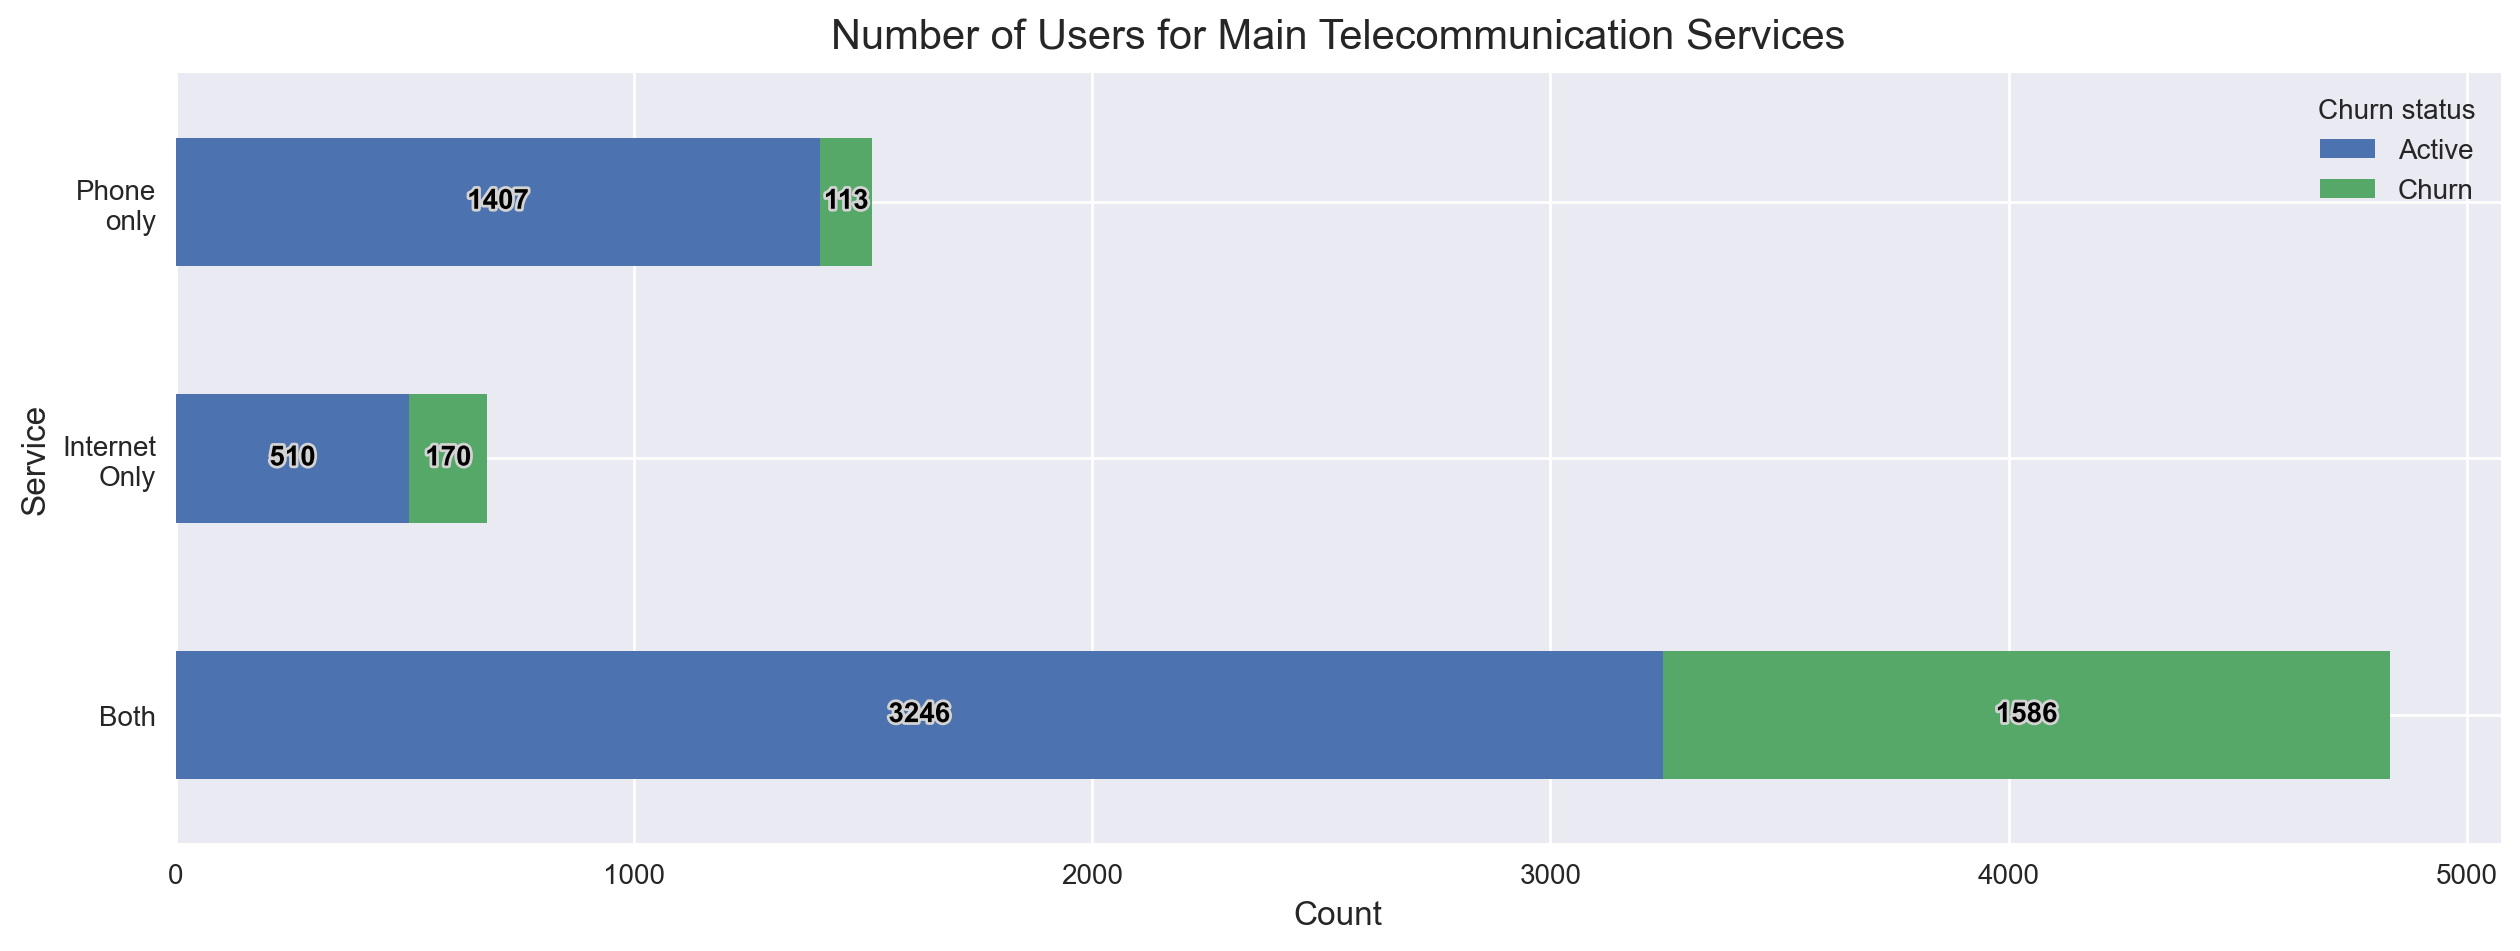

In [37]:
# jumlah pengguna internet, telepon atau keduanya
main_serv = df[['customerID', 'InternetService', 'PhoneService', 'Churn']].copy()
main_serv['Service'] = main_serv.apply(lambda x: 'Phone\nonly' if x['InternetService']=='No internet' else (
                                                 'Internet\nOnly' if x['PhoneService']=='No line' else 'Both'), axis=1)

stacked_bar = main_serv.groupby('Service')['Churn'].value_counts().unstack(level=-1).plot(kind='barh', stacked=True, figsize=(15,5))
stacked_bar.legend(title='Churn status', labels=['Active', 'Churn'])
for i in stacked_bar.patches:
    plt.annotate(int(i.get_width()), (i.get_x()+i.get_width()/2, i.get_y()+i.get_height()/2), ha='center', va='center',
                 weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])
stacked_bar.set_title("Number of Users for Main Telecommunication Services", size=15, y=1.01)
stacked_bar.set_xlabel("Count", size=12)
stacked_bar.set_ylabel('Service', size=12)
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Mayoritas klien menggunakan layanan telepon dan internet secara besamaan dengan total sebanyak 4832 per 7032 pengguna (68,7%). Pada urutan kedua terdapat pengguna layanan telepon (*only*) sebesar 1520 pengguna (21,6%), dan pada urutan terakhir terdapat pengguna layanan internet (*only*) sebesar 680 pengguna (9,7%).
* Lebih sedikit ditemukan pengguna yang berhenti berlangganan ketika menggunakan layanan telepon saja, yaitu sebesar 113 pengguna (7,4%). Pengguna yang berhenti berlangganan mayoritas berasal dari pengguna layanan internet dan telepon secara bersamaan, yaitu sebesar 1586 pengguna (32,8%). Adapun untuk golongan yang hanya menggunakan layanan internet saja, jumlah yang berhenti berlangganan sebesar 170 pengguna (25%).
* Secara umum untuk pengguna layanan internet &mdash; baik yang hanya menggunakan layanan internet saja maupun layanan telepon &mdash; terlihat bahwa 1756 per 5512 pengguna internet (32%) berhenti berlangganan.
* Secara umum untuk pengguna layanan telepon &mdash; baik yang hanya menggunakan layanan telepon saja maupun layanan internet &mdash; terlihat bahwa 1699 per 6352 pengguna telepon (26,7%) berhenti berlangganan.

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Kemungkinan besar alasan klien berhenti berlangganan terkait dengan ketidakpuasan pada layanan internet.
* Jaringan telepon pada umumnya relatif sudah cukup baik ketika digunakan sehingga jarang ditemukan orang yang mengajukan keluhan ke operator. Lain halnya dengan jaringan internet, sering terjadi ketidakstabilan jaringan yang mengakibatkan lebih banyak keluhan yang diterima oleh operator. Hal ini akan mengakibatkan pelanggan berhenti berlangganan dan pindah ke kompetitor lain.
* Dari seluruh pelanggan yang masih aktif (5163 orang), terdapat peluang sebesar 27,25% untuk mendorong klien yang hanya menggunakan layanan telepon agar berlangganan layanan internet.

</div>

Berikut di bawah ini akan ditampilkan *stacked bar plot* yang menunjukkan jumlah pengguna layanan telepon pada masing-masing jenis saluran.

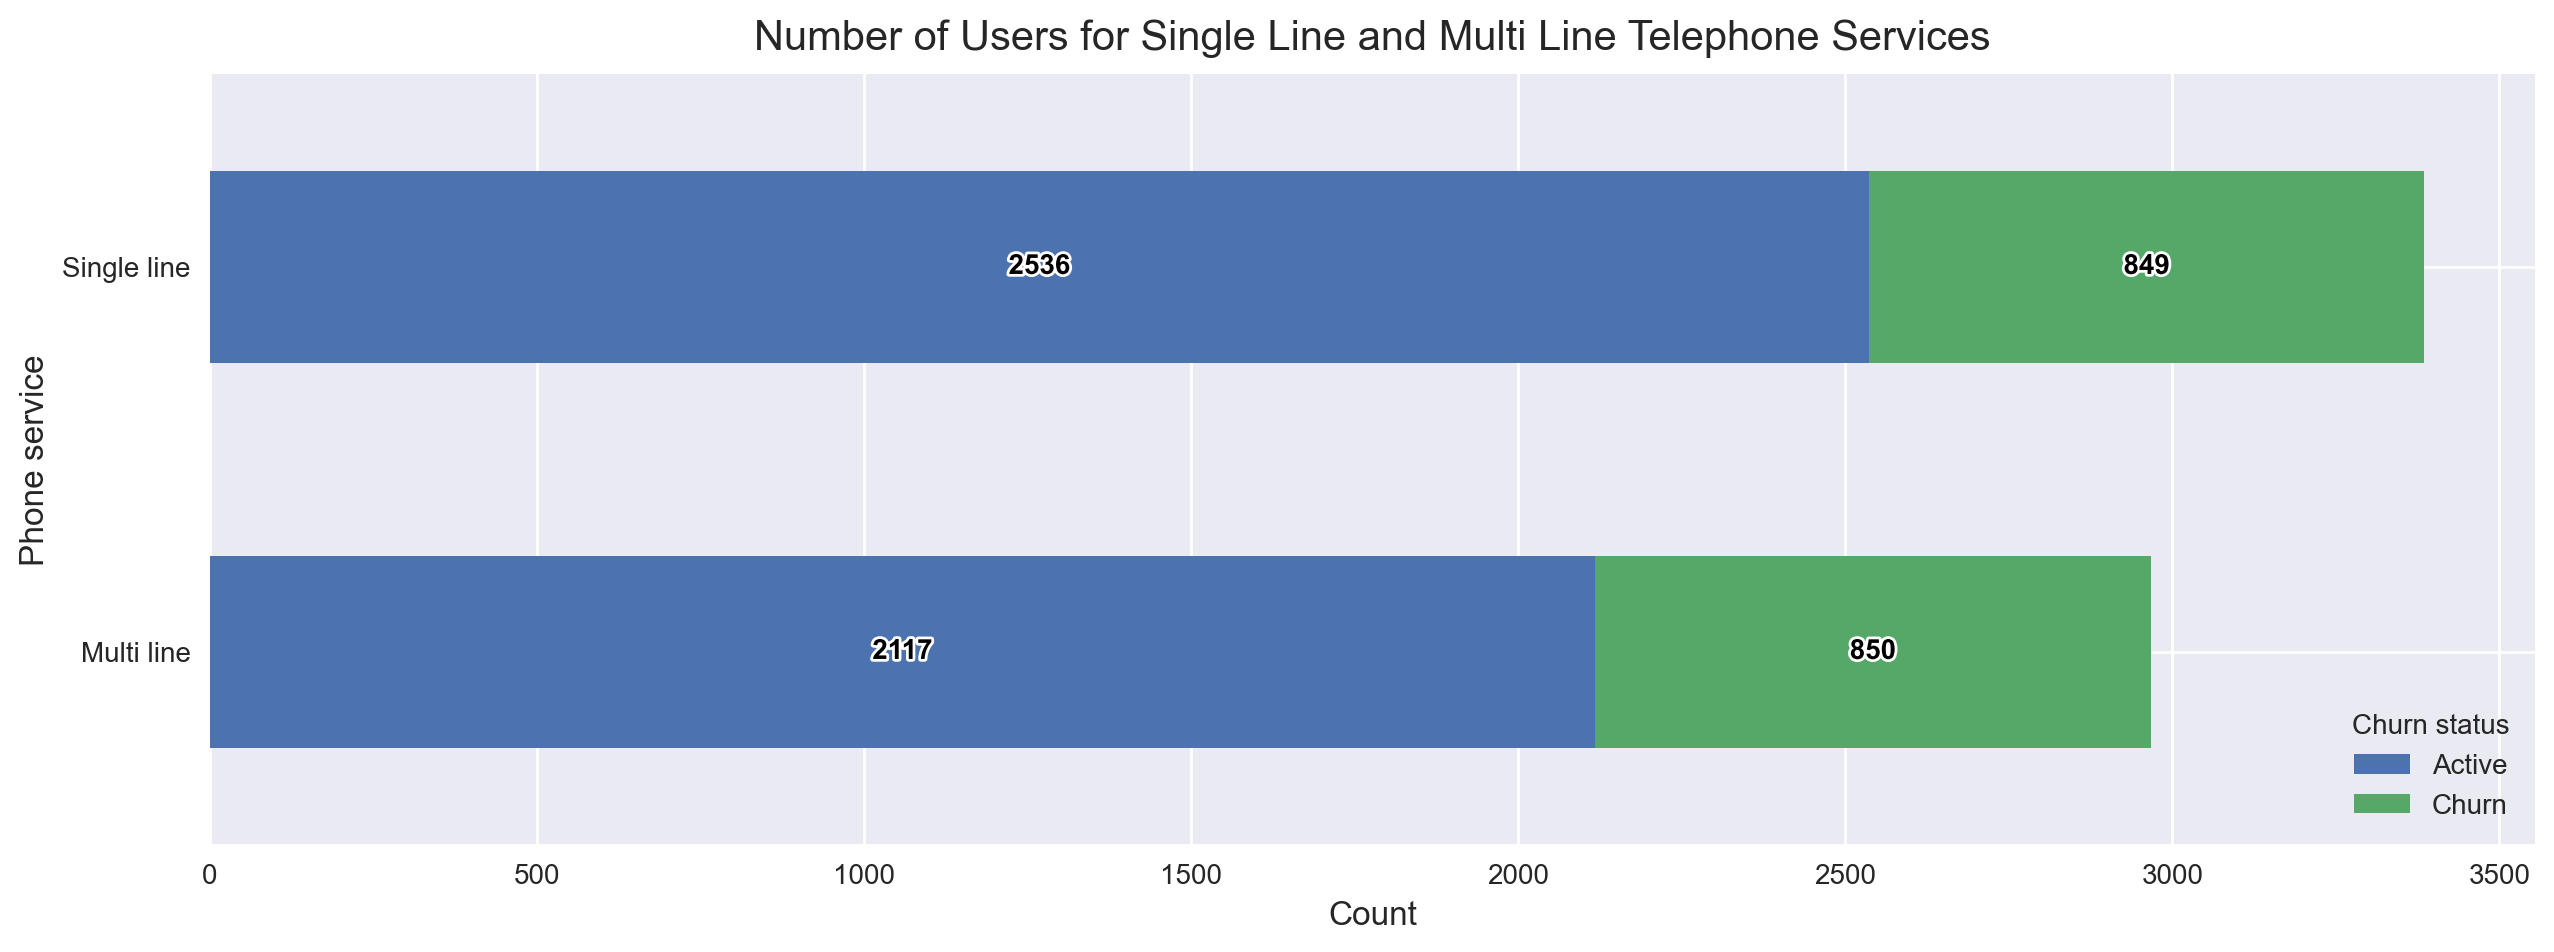

In [38]:
# jumlah pengguna telepon single-line dan multi-line
phone_user = main_serv.query("PhoneService!='No line'")
stacked_bar = phone_user.groupby('PhoneService')['Churn'].value_counts().unstack(level=-1).plot(kind='barh', stacked=True, figsize=(15,5))
stacked_bar.legend(title='Churn status', labels=['Active', 'Churn'])
for i in stacked_bar.patches:
    plt.annotate(int(i.get_width()), (i.get_x()+i.get_width()/2, i.get_y()+i.get_height()/2), ha='center', va='center',
                 weight='bold', color='black', path_effects=[pe.withStroke(foreground='white', linewidth=2)])
stacked_bar.set_title("Number of Users for Single Line and Multi Line Telephone Services", size=15, y=1.01)
stacked_bar.set_xlabel("Count", size=12)
stacked_bar.set_ylabel('Phone service', size=12)
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Mayoritas pengguna layanan telepon hanya menggunakan 1-saluran telepon, yaitu sebesar 3385 per 6352 pengguna (53%).
* Secara proporsi, mayoritas klien yang berhenti berlanggan berasal dari pengguna layanan telepon multi-saluran, yaitu sebesar 28,6%. Adapun proporsi klien yang berhenti dari kategori 1-saluran, yaitu sebesar 25,1%.

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Secara proporsi, persentase klien yang berhenti pada kedua jenis saluran tidak memiliki nilai yang terpaut jauh, sehingga kemungkinan terdapat alasan yang sama ketika klien memutuskan berhenti berlangganan.
* Kemungkinan alasan klien berhenti berlangganan karena klien tidak membutuhkan lebih dari 1 saluran telepon atau sudah tidak memerlukan layanan telepon sama sekali.
* Persentase *churn* di atas 15% dapat dikategorikan nilai yang cukup besar. Perlu dilakukan penguatan *branding* agar meningkat *economic moat* perusahaan sehingga dapat melindungi pangsa pasar.

</div>

Berikut di bawah ini akan ditampilkan *stacked bar plot* yang menunjukkan jumlah pengguna layanan internet pada masing-masing jenis saluran.

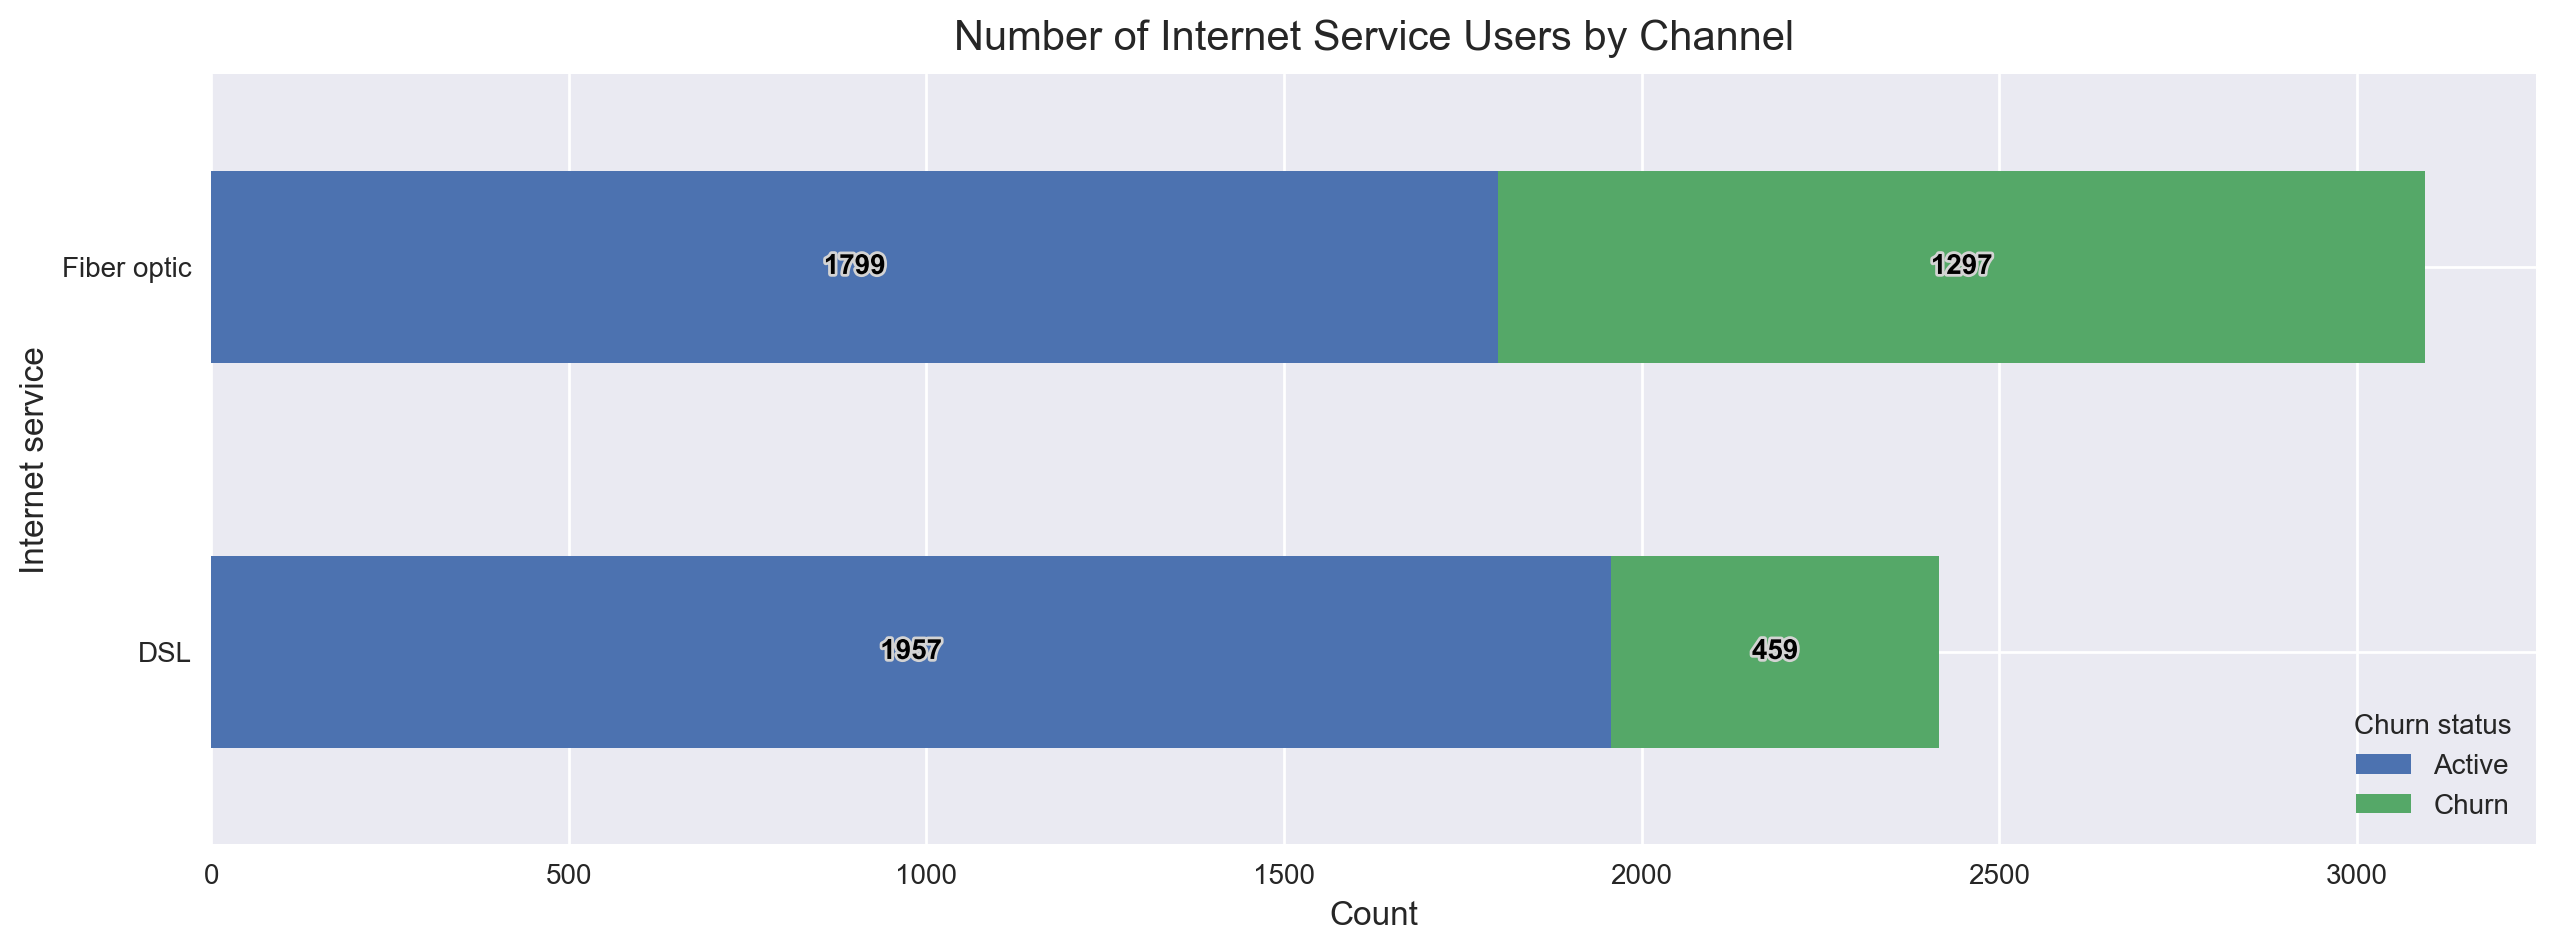

In [39]:
# jumlah pengguna internet DSL dan fiber optik
internet_user = main_serv.query("InternetService!='No internet'")
stacked_bar = internet_user.groupby('InternetService')['Churn'].value_counts().unstack(level=-1).plot(kind='barh', stacked=True, figsize=(15,5))
stacked_bar.legend(title='Churn status', labels=['Active', 'Churn'])
for i in stacked_bar.patches:
    plt.annotate(int(i.get_width()), (i.get_x()+i.get_width()/2, i.get_y()+i.get_height()/2), ha='center', va='center',
                 weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])
    stacked_bar.set_title("Number of Internet Service Users by Channel", size=15, y=1.01)
stacked_bar.set_xlabel("Count", size=12)
stacked_bar.set_ylabel('Internet service', size=12)
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Mayoritas pengguna layanan internet menggunakan teknologi fiber optik, yaitu sebesar 3096 per 5512 pengguna (56,2%). Adapun penggunan layanan internet dengan teknologi DSL berjumlah 2416 pengguna (43,8%).
* Pengguna layanan internet berbasis teknologi fiber optik merupakan yang terbesar, tetapi memiliki *churn rate* yang sangat tinggi.
* Berdasarkan proporsi, pengguna teknologi fiber optik memiliki peluang yang lebih besar untuk berhenti berlangganan, yaitu sebesar 41,9%. Adapun pengguna teknologi DSL memiliki peluang berhenti berlangganan sebesar 19%.

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Jumlah pengguna teknologi fiber optik yang dominan disertai *churn rate* sebesar 41,9% sangat mengkhawatirkan. Perusahaan harus lebih serius dalam menangani keluhan klien terkait jaringan internet. Mencari tahu penyebab klien berhenti berlangganan dan mencari solusi secepat mungkin.
* Teknologi fiber optik relatif lebih unggul dibandingkan DSL, tetapi memiliki harga yang lebih mahal. Faktor persaingan harga antar kompetitor dapat menjadi penyebab *churn rate* yang tinggi.
* Kualitas *maintenance* yang kurang baik dapat menurunkan kualitas jaringan internet, baik DSL ataupun fiber optik. Hal ini akan berdampak pada ketidakpuasan klien sehingga berpotensi berhenti untuk berlangganan dan pindah ke kompetitor lain.
* Perusahaan perlu meningkatkan proporsi pengguna layanan internet berbasis DSL karena memiliki proporsi pengguna yang relatif besar (43,8%) tetapi memiliki *churn rate* yang lebih rendah (19%). Klien aktif yang hanya menggunakan layanan telepon (27,3% klien aktif) dapat menjadi sasaran utama penjualan perusahan untuk produk DSL.

</div>

Berikutnya kita akan melakukan pengujian statistik untuk mengetahui signifikansi pengaruh jenis layanan utama dan varian yang digunakan terhadap tingkat *churn* yang terjadi pada pengguna layanan telekomunikasi.

In [40]:
# function untuk test independensi variabel kategorik
def chi2_independence_test(df, alpha=0.05):
    """
    df: contingency table
    alpha: significance value
    """
    ind_test = chi2_contingency(df)
    statistic = ind_test.statistic
    pvalue = ind_test.pvalue
    df_expect = pd.DataFrame(ind_test.expected_freq, index=df.index, columns=df.columns)
    chi2_contribution = (((df - df_expect)**2/df_expect)/statistic) * 100 # persentase kontribusi chi2 untuk setiap cell
    
    print(f"Critical value: {chi2.ppf(q=1-alpha, df=ind_test.dof):.2f} ({alpha:.2%})")
    print(f"Statistic: {statistic:.2f} ({pvalue:.2%})")
    if pvalue >= alpha:
        print(f"H0 is accepted: Variables {df.index.name} and {df.columns.name} are independent")
    else:
        print(f"H0 is rejected: Variables {df.index.name} and {df.columns.name} are dependent")
    print(f"\n{' Observed frequency ':-^70}")
    print(df.to_string())
    print(f"\n{' Expected frequency ':-^70}")
    print(df_expect.round().to_string())
    print(f"\n{' Chi-squared contribution (%) ':-^70}")
    print(chi2_contribution.round(2).to_string())

Kita akan melakukan uji independensi apakah kombinasi layanan utama (`phone only`, `internet only` atau `both`) yang digunakan mempengaruhi tingkat *churn* atau tidak.

In [41]:
# uji independensi antara kombinasi layanan utama vs churn
contingency_churn_mainserv = main_serv.groupby('Churn')['Service'].value_counts().unstack()
contingency_churn_mainserv = contingency_churn_mainserv.rename(columns={'Internet\nOnly':'Internet only', 'Phone\nonly':'Phone only'})
chi2_independence_test(contingency_churn_mainserv)

Critical value: 5.99 (5.00%)
Statistic: 382.89 (0.00%)
H0 is rejected: Variables Churn and Service are dependent

------------------------- Observed frequency -------------------------
Service  Both  Internet only  Phone only
Churn                                   
0        3246            510        1407
1        1586            170         113

------------------------- Expected frequency -------------------------
Service    Both  Internet only  Phone only
Churn                                     
0        3548.0          499.0      1116.0
1        1284.0          181.0       404.0

-------------------- Chi-squared contribution (%) --------------------
Service   Both  Internet only  Phone only
Churn                                    
0         6.70           0.06       19.82
1        18.51           0.17       54.74


<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Berdasarkan statistik, kombinasi layanan utama yang digunakan berhubungan dengan tingkat *churn* secara signifikan.
* Besarnya nilai kontribusi $\chi^2$ pada kategori `Phone only` disebabkan tingkat *churn* yang rendah pada kategori ini dibandingkan *expected value* perhitungan *chi-square*. Besarnya nilai kontribusi $\chi^2$ pada kategori `Both` disebabkan tingkat *churn* yang tinggi pada kategori ini dibandingkan *expected value* perhitungan *chi-square*.
* Dari 3 kategori pada kombinasi layanan utama, pengguna `Internet only` dapat dikatakan tidak ada kaitannya dengan tingkat *churn* karena memiliki kontribusi $\chi^2$ yang sangat kecil, yaitu 0,06% dan 0,17%. Adapun kategori lainnya, yaitu `Both` dan `Phone only` memiliki hubungan yang kuat dengan tingkat *churn*. Kategori `Phone only` memiliki hubungan kuat dengan tingkat *churn* yang rendah, sedangkan kategori `Both` memiliki hubungan yang kuat dengan tingkat *churn* yang tinggi.

</div>

Pada bagian berikutnya kita akan melakukan uji independensi apakah jenis jaringan telepon (`single-line` atau `multi-line`) yang digunakan mempengaruhi tingkat *churn* pengguna layanan telepon.

In [42]:
# uji independensi antara jenis jaringan telepon vs churn
contingency_churn_phoneserv = df.query("PhoneService!='No line'").groupby('Churn')['PhoneService'].value_counts().unstack()
chi2_independence_test(contingency_churn_phoneserv)

Critical value: 3.84 (5.00%)
Statistic: 10.09 (0.15%)
H0 is rejected: Variables Churn and PhoneService are dependent

------------------------- Observed frequency -------------------------
PhoneService  Multi line  Single line
Churn                                
0                   2117         2536
1                    850          849

------------------------- Expected frequency -------------------------
PhoneService  Multi line  Single line
Churn                                
0                 2173.0       2480.0
1                  794.0        905.0

-------------------- Chi-squared contribution (%) --------------------
PhoneService  Multi line  Single line
Churn                                
0                  14.51        12.72
1                  39.74        34.83


<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Berdasarkan statistik, jenis jaringan telepon yang digunakan pengguna layanan telepon memiliki hubungan yang kuat dengan tingkat *churn*. Oleh karena itu, fitur jenis layanan telepon tersebut dapat digunakan dalam pembangunan model prediktif.
* Baik kategori `Multi line` maupun `Single line` memiliki kontribusi $\chi^2$ yang tinggi ($\chi^2_{contribution}$ > 10%). Hal ini mengindikasikan bahwa kedua kategori memiliki korelasi yang kuat dengan tingkat *churn*.
* Kategori `Single line` berkorelasi kuat dengan tingkat *churn* yang rendah. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih kecil dibandingkan *expected freq.* pada index `churn = 1`.
* Kategori `Multi line` berkorelasi kuat dengan tingkat *churn* yang tinggi. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih tinggi dibandingkan *expected freq.* pada index `churn = 1`.

</div>

Pada bagian berikutnya kita akan melakukan uji independensi apakah jenis jaringan internet (`fiber optic` atau `DSL`) yang digunakan mempengaruhi tingkat *churn* pengguna layanan internet.

In [43]:
# uji independensi antara jenis jaringan internet vs churn
contingency_churn_netserv = df.query("InternetService!='No internet'").groupby('Churn')['InternetService'].value_counts().unstack()
chi2_independence_test(contingency_churn_netserv)

Critical value: 3.84 (5.00%)
Statistic: 326.60 (0.00%)
H0 is rejected: Variables Churn and InternetService are dependent

------------------------- Observed frequency -------------------------
InternetService   DSL  Fiber optic
Churn                             
0                1957         1799
1                 459         1297

------------------------- Expected frequency -------------------------
InternetService     DSL  Fiber optic
Churn                               
0                1646.0       2110.0
1                 770.0        986.0

-------------------- Chi-squared contribution (%) --------------------
InternetService    DSL  Fiber optic
Churn                              
0                17.95        14.01
1                38.40        29.96


<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Berdasarkan statistik, jenis jaringan internet yang digunakan oleh pengguna layanan internet memiliki hubungan yang kuat dengan tingkat *churn*. Oleh karena itu, fitur jenis layanan internet tersebut dapat digunakan dalam pembangunan model prediktif.
* Baik kategori pengguna jaringan `DSL` maupun `Fiber optic`, keduanya memiliki kontribusi $\chi^2$ yang tinggi ($\chi^2_{contribution}$ > 10%). Hal ini mengindikasikan bahwa kedua kategori memiliki korelasi yang kuat dengan tingkat *churn*.
* Kategori `DSL` berkorelasi kuat dengan tingkat *churn* yang rendah. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih kecil dibandingkan *expected freq.* pada index `churn = 1`.
* Kategori `Fiber optic` berkorelasi kuat dengan tingkat *churn* yang tinggi. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih tinggi dibandingkan *expected freq.* pada index `churn = 1`.

</div>

## 2) Jenis layanan tambahan yang diminati pengguna layanan internet

Berikut di bawah ini ditampilkan *stacked bar plot* yang menunjukkan distribusi jumlah *add-on-services* yang digunakan oleh pengguna layanan internet dan jumlah pengguna pada setiap jenis layanan tambahan.

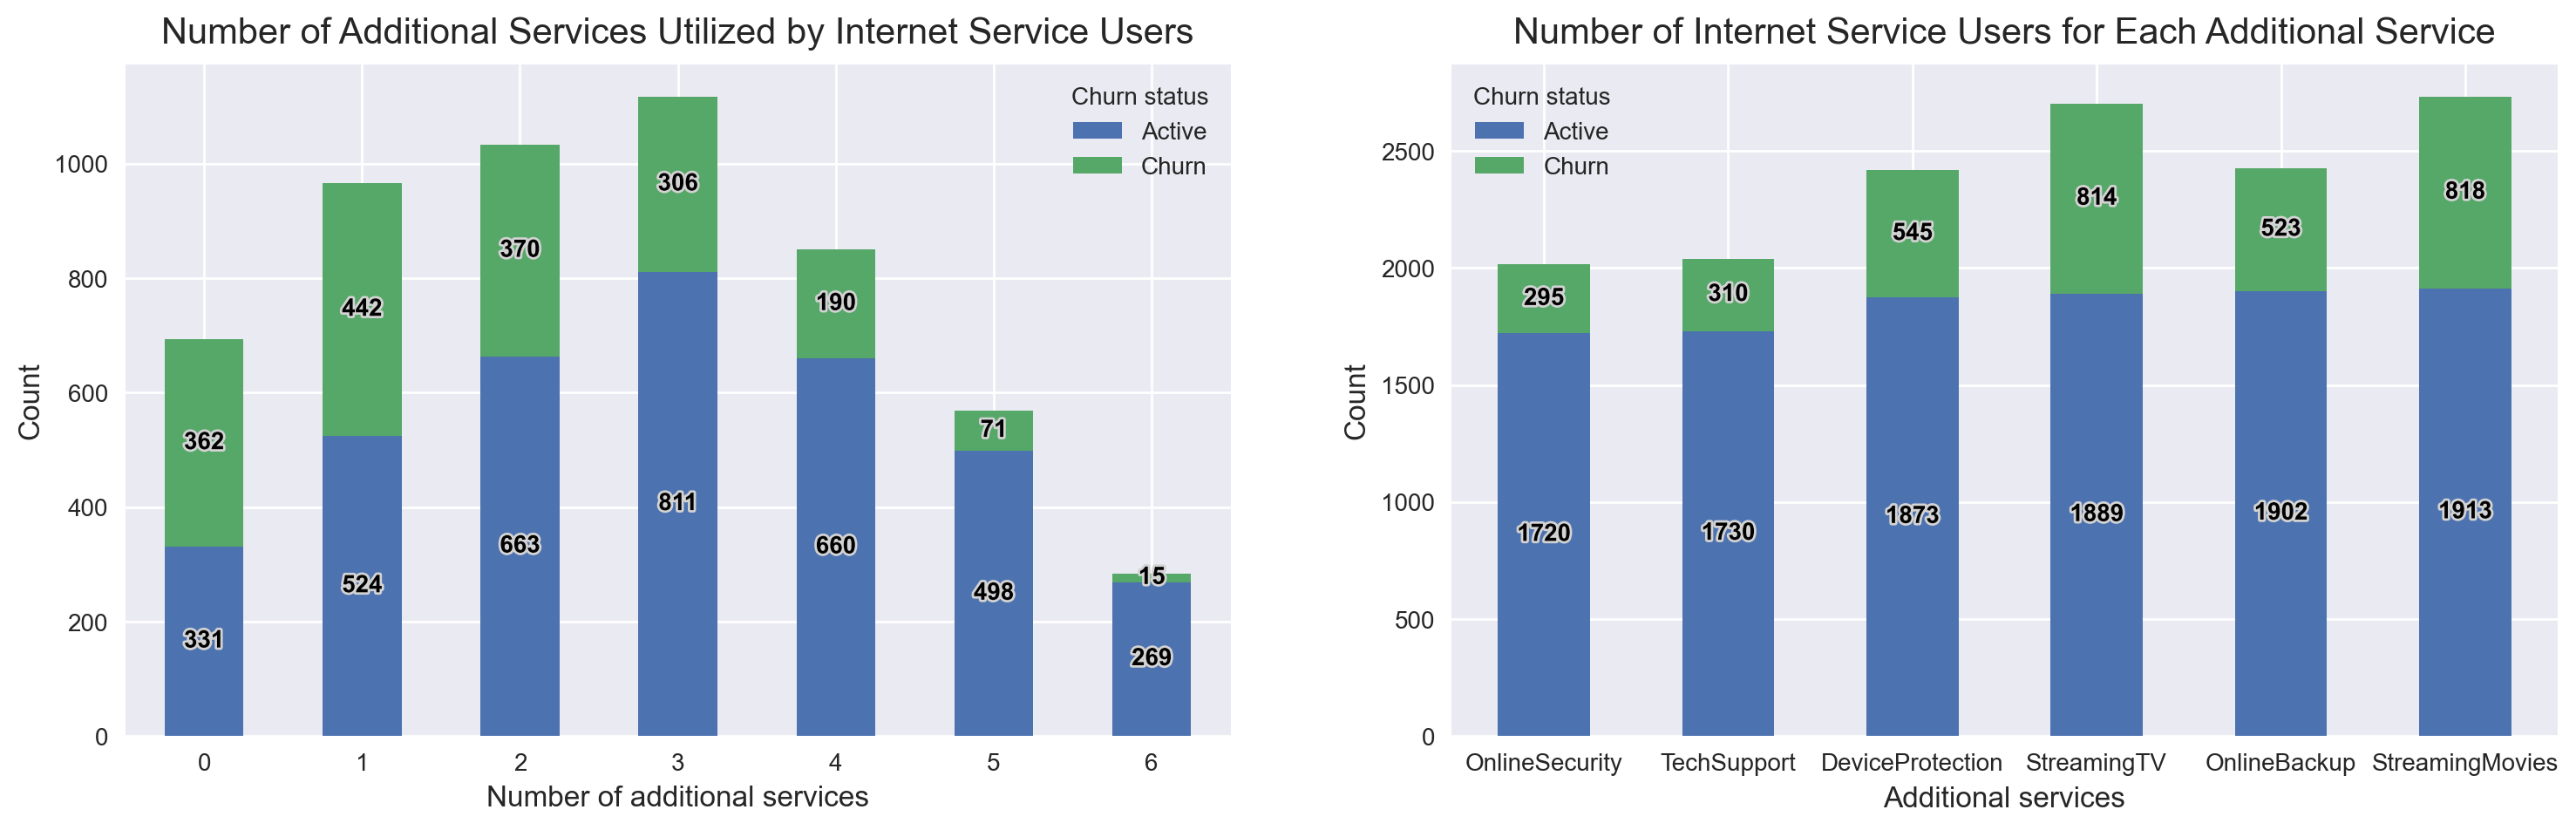

In [44]:
addon_list = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',]
net_addon = df.query("InternetService!='No internet'")[['customerID', 'Churn', 'Net_Addons_Num'] + addon_list]
net_addon['Net_Addons_Num'] = net_addon['Net_Addons_Num'].astype(int)

fig, ax = plt.subplots(ncols=2, figsize=(18, 5))

# distribusi jumlah layanan tambahan yang digunakan pengguna layanan internet
net_addon.groupby('Net_Addons_Num')['Churn'].value_counts().unstack(level=-1).plot(kind='bar', stacked=True, ax=ax[0])
ax[0].legend(title='Churn status', labels=['Active', 'Churn'])
ax[0].set_xticklabels(rotation=0, labels=ax[0].get_xticklabels())
for i in ax[0].patches:
    ax[0].annotate(int(i.get_height()), (i.get_x()+i.get_width()/2, i.get_y()+i.get_height()/2), ha='center', va='center',
                   weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])
ax[0].set_title("Number of Additional Services Utilized by Internet Service Users", size=15, y=1.01)
ax[0].set_xlabel('Number of additional services', size=12)
ax[0].set_ylabel("Count", size=12)

# jumlah pengguna pada masing-masing layanan tambahan
net_addon.groupby('Churn')[addon_list].sum().T.sort_values(by=0).plot(kind='bar', stacked=True, ax=ax[1])
ax[1].legend(title='Churn status', labels=['Active', 'Churn'])
ax[1].set_xticklabels(rotation=0, labels=ax[1].get_xticklabels())
for i in ax[1].patches:
    ax[1].annotate(int(i.get_height()), (i.get_x()+i.get_width()/2, i.get_y()+i.get_height()/2), ha='center', va='center',
                   weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])
ax[1].set_title("Number of Internet Service Users for Each Additional Service", size=15, y=1.01)
ax[1].set_xlabel('Additional services', size=12)
ax[1].set_ylabel("Count", size=12)
plt.show()


<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Jumlah layanan tambahan yang umum digunakan oleh pengguna layanan internet yaitu sebanyak 2 hingga 4 jenis layanan, dengan persentase sebesar 54,4% total pengguna layanan internet.
* Pengguna yang aktif berlangganan umumnya menggunakan sebanyak 2 hingga 4 jenis layanan tambahan, dengan persentase sebesar 56,8% klien aktif. Adapun penggunan yang berhenti berlangganan umumnya menggunakan sebanyak 0 hingga 2 jenis layanan tambahan, dengan persentase sebesar 66,9% klien yang berhenti berlangganan.
* Untuk seluruh penggunan layanan internet, 4 jenis layanan tambahan yang paling diminati, yaitu layanan *streaming film* (49,5%), *streaming TV* (49%), *cloud* untuk *online backup* (44%) dan layanan anti-virus/*device protection* (43,9%). Adapun untuk layanan lainnya, yakni layanan dukungan teknis dan layanan *online security* masing-masing memiliki persentase pengguna kurang dari 40% pengguna layanan internet.
* Untuk klien aktif, distribusi jumlah pengguna pada masing-masing layanan tambahan relatif sama besar. Akan tetapi, untuk klien yang berhenti berlangganan memiliki jumlah pengguna yang dominan pada layanan *streaming* film dan TV.

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Perlu dilakukan pemantauan khusus untuk pelanggan yang hanya berlangganan sebanyak 0 hingga 2 jenis layanan tambahan. Kelompok ini memiliki *churn rate* yang cukup tinggi.
* Layanan *streaming*, *cloud* dan *device protection* merupakan layanan favorit pengguna layanan internet. Layanan ini dapat digunakan sebagai penarik pengguna baru dan meningkatkan retensi pengguna lama melalui penawaran-penawaran khusus.

</div>

Pada bagian berikutnya, kita akan melakukan perhitungan statistik untuk mengetahui apakah jumlah layanan tambahan yang digunakan mempengaruhi tingkat *churn* pelanggan layanan internet.

In [45]:
# uji independensi antara jumlah add-ons vs churn
contingency_churn_totaladdon = net_addon.groupby('Churn')['Net_Addons_Num'].value_counts().unstack()
chi2_independence_test(contingency_churn_totaladdon)

Critical value: 12.59 (5.00%)
Statistic: 462.45 (0.00%)
H0 is rejected: Variables Churn and Net_Addons_Num are dependent

------------------------- Observed frequency -------------------------
Net_Addons_Num    0    1    2    3    4    5    6
Churn                                            
0               331  524  663  811  660  498  269
1               362  442  370  306  190   71   15

------------------------- Expected frequency -------------------------
Net_Addons_Num      0      1      2      3      4      5      6
Churn                                                          
0               472.0  658.0  704.0  761.0  579.0  388.0  194.0
1               221.0  308.0  329.0  356.0  271.0  181.0   90.0

-------------------- Chi-squared contribution (%) --------------------
Net_Addons_Num      0      1     2     3     4      5      6
Churn                                                       
0                9.13   5.92  0.51  0.71  2.44   6.78   6.37
1               19.54  1

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Secara statistik, jumlah layanan tambahan yang digunakan oleh pengguna layanan internet secara signifikan mempengaruhi tingkat *churn*. Oleh karena itu, fitur jumlah layanan tambahan merupakan fitur penting untuk membangun model prediktif.
* Ditemukan 4 kategori dengan nilai kontribusi $\chi^2$ yang tinggi ($\chi^2_{contribution}$ > 10%), yaitu kelompok `0`, `1`, `4`, dan `6`. Berdasarkan temuan ini, maka kelompok tersebut memiliki korelasi yang kuat terhadap tingkat *churn*.
* Kelompok `0` dan `1` berkorelasi kuat dengan tingkat *churn* yang tinggi. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih tinggi dibandingkan *expected freq.* pada index `churn = 1`.
* Kelompok `4` dan `6` berkorelasi kuat dengan tingkat *churn* yang rendah. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih rendah dibandingkan *expected freq.* pada index `churn = 1`.

</div>

Pada bagian berikutnya, kita akan melakukan perhitungan statistik untuk mengetahui apakah jenis layanan tambahan (`Online Security`, `Streaming TV`, dll.) yang digunakan mempengaruhi tingkat *churn* pelanggan layanan internet.

In [46]:
# uji independensi antara jenis add-ons vs churn
contingency_churn_addontype = net_addon.groupby('Churn')[addon_list].sum()
contingency_churn_addontype.columns.name = 'Add-on type'
chi2_independence_test(contingency_churn_addontype)

Critical value: 11.07 (5.00%)
Statistic: 303.97 (0.00%)
H0 is rejected: Variables Churn and Add-on type are dependent

------------------------- Observed frequency -------------------------
Add-on type  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies
Churn                                                                                                 
0                    1720.0        1902.0            1873.0       1730.0       1889.0           1913.0
1                     295.0         523.0             545.0        310.0        814.0            818.0

------------------------- Expected frequency -------------------------
Add-on type  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies
Churn                                                                                                 
0                    1550.0        1866.0            1860.0       1570.0       2080.0           2101.0
1                

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Secara statistik, jenis layanan tambahan secara signifikan memiliki hubungan yang kuat dengan tingkat *churn*. Oleh karena itu, fitur jenis layanan merupakan fitur penting untuk membangun model prediktif.
* Ditemukan 4 jenis layanan tambahan dengan nilai kontribusi $\chi^2$ yang tinggi ($\chi^2_{contribution}$ > 10%), yaitu `OnlineSecurity`, `TechSupport`, `StreamingTV`, dan `StreamingMovies`. Hal ini menunjukkan bahwa kategori tersebut memiliki korelasi yang kuat terhadap tingkat *churn*.
* Kategori `OnlineSecurity` dan `TechSupport` berkorelasi kuat dengan tingkat *churn* yang rendah. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih rendah dibandingkan *expected freq.* pada index `churn = 1`.
* Kategori `StreamingTV` dan `StreamingMovies` berkorelasi kuat dengan tingkat *churn* yang tinggi. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih tinggi dibandingkan *expected freq.* pada index `churn = 1`.

</div>

## 3) Karakter klien dalam berlangganan layanan telekomunikasi

Berikut di bawah ini merupakan *stacked bar plot* yang menunjukkan jumlah pengguna pada masing-masing jenis kontrak serta jumlah pengguna pada masing-masing metode pembayaran.

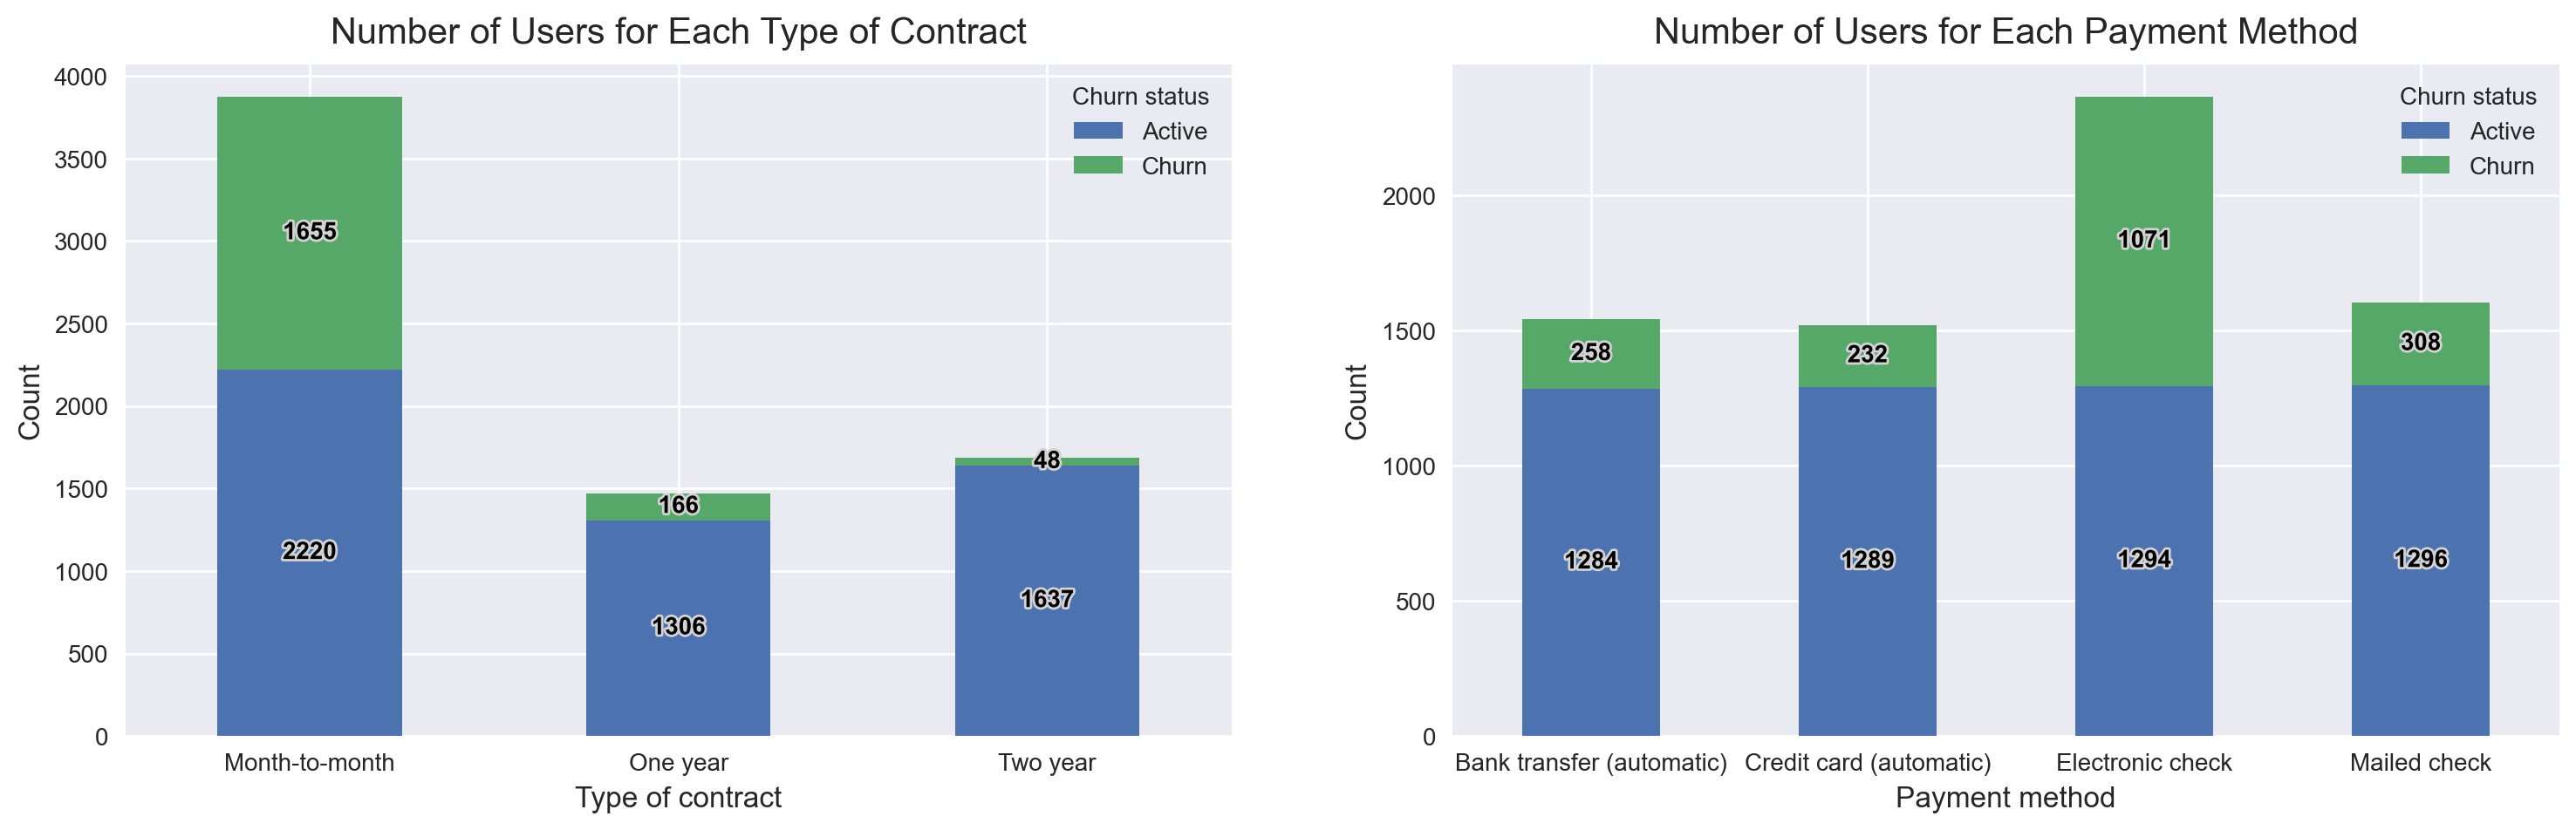

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=(18,5))

# jumlah pengguna yang melakukan kontrak bulanan/1 tahun/2 tahun
df.groupby('Type')['Churn'].value_counts().unstack(level=-1).plot(kind='bar', stacked=True, ax=ax[0])
ax[0].legend(title='Churn status', labels=['Active', 'Churn'])
ax[0].set_xticklabels(rotation=0, labels=ax[0].get_xticklabels())
for i in ax[0].patches:
    ax[0].annotate(int(i.get_height()), (i.get_x()+i.get_width()/2, i.get_y()+i.get_height()/2), ha='center', va='center',
                   weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])
ax[0].set_title("Number of Users for Each Type of Contract", size=15, y=1.01)
ax[0].set_xlabel('Type of contract', size=12)
ax[0].set_ylabel("Count", size=12)

# jumlah pengguna pada masing-masing metode pembayaran
df.groupby('PaymentMethod')['Churn'].value_counts().unstack(level=-1).sort_values(by=0).plot(kind='bar', stacked=True, ax=ax[1])
ax[1].legend(title='Churn status', labels=['Active', 'Churn'])
ax[1].set_xticklabels(rotation=0, labels=ax[1].get_xticklabels())
for i in ax[1].patches:
    ax[1].annotate(int(i.get_height()), (i.get_x()+i.get_width()/2, i.get_y()+i.get_height()/2), ha='center', va='center',
                 weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])
ax[1].set_title("Number of Users for Each Payment Method", size=15, y=1.01)
ax[1].set_xlabel('Payment method', size=12)
ax[1].set_ylabel("Count", size=12)
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Mayoritas klien melakukan kontrak secara bulanan, yaitu berjumlah 3875 per 7032 pelanggan (55,1%). Pada urutan kedua, klien cenderung melakukan kontrak per 2 tahun dengan jumlah sebanyak 1685 pelanggan (24%). Dan pada urutan terakhir, klien cenderung melakukan kontrak per 1 tahun dengan jumlah sebanyak 1472 pelanggan (20,9%).
* Pada kategori kontrak per bulan, peluang klien berhenti berlangganan yaitu sebesar 42,7%. Pada kategori kontrak per 1 tahun, peluang klien berhenti berlangganan yaitu sebesar 11,3%. Adapun untuk kategori kontrak per 2 tahun, peluang klien berhenti berlangganan yaitu sebesar 2,8%.
* Mayoritas klien melakukan pembayaran via *electronic check* sebanyak 2365 per 7032 pelanggan (33,6%). Adapun untuk metode pembayaran lainnya relatif berjumlah sama besar, yaitu berkisar 1521 klien hingga 1604 klien (21,6% - 22,8%) untuk masing-masing metode.
* Untuk klien yang aktif, proporsi jumlah klien antar metode pembayaran relatif sama besar. Pada sisi lain, untuk klien yang berhenti berlangganan, proporsi jumlah klien untuk metode *electronic check* jauh lebih besar dibandingkan metode lainnya dimana untuk metode lainnya memiliki proporsi yang seimbang.
* Dari seluruh metode pembayaran, metode *electronic check* memiliki tingkat *churn* yang paling besar. Peluang klien berhenti berlangganan pada metode *electronic check* yaitu sebesar 45,3%. Adapun untuk metode lainnya, tingkat churn berada pada angka 19,2% untuk metode *mailed check*, 16,7% untuk metode *bank transfer (automatic)* dan 15,3% untuk metode *credit card (automatic)*.

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Jenis kontrak yang singkat akan mengakibatkan pelanggan lebih leluasa untuk berhenti berlangganan layanan telekomunikasi. Hal ini terbukti dengan *churn rate* yang sangat tinggi pada kontrak bulanan, yaitu sebesar 42,7%. Pada sisi lain, jenis kontrak yang singkat menjadi pilihan yang disukai karena lebih tidak terikat. Perlu dilakukan segmentasi klien antara klien yang loyal (melakukan kontrak panjang) dan tidak sehingga dapat diberikan penanganan khusus untuk klien yang tidak loyal melalui sejumlah penawaran khusus.
* Metode pembayaran *electronic check* menjadi metode yang paling diminati tetapi juga memiliki *churn rate* tertinggi, yaitu sebesar 45,3%. Perlu dilakukan analisis terkait keluhan oleh klien yang menggunakan metode pembayaran tersebut. Besar kemungkinan hal ini terkait dengan ketidakpuasan klien ketika menggunakan metode pembayaran via *electronic check*.

</div>

Kita akan melakukan perhitungan statistik untuk mengetahui apakah jenis kontrak (`month-to-month`, `1-year` atau `2-year`) mempengaruhi tingkat *churn* atau tidak.

In [48]:
# uji independensi antara jenis kontrak vs churn
contingency_churn_type = df.groupby('Churn')['Type'].value_counts().unstack()
chi2_independence_test(contingency_churn_type)

Critical value: 5.99 (5.00%)
Statistic: 1179.55 (0.00%)
H0 is rejected: Variables Churn and Type are dependent

------------------------- Observed frequency -------------------------
Type   Month-to-month  One year  Two year
Churn                                    
0                2220      1306      1637
1                1655       166        48

------------------------- Expected frequency -------------------------
Type   Month-to-month  One year  Two year
Churn                                    
0              2845.0    1081.0    1237.0
1              1030.0     391.0     448.0

-------------------- Chi-squared contribution (%) --------------------
Type   Month-to-month  One year  Two year
Churn                                    
0               11.64      3.98     10.96
1               32.16     10.99     30.27


<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Secara statistik, jenis kontrak berlangganan memiliki hubungan yang signifikan terhadap tingkat *churn*. Oleh karena itu, fitur ini merupakan fitur yang penting dalam membangun model prediktif pada proyek ini.
* Seluruh kategori jenis kontrak berlangganan, yakni `Month-to-month`, `One year`, dan `Two year` memiliki nilai kontribusi $\chi^2$ yang tinggi. Hal ini menunjukkan bahwa seluruh kategori memiliki korelasi yang kuat terhadap tingkat *churn*.
* Kategori `Month-to-month` berkorelasi kuat dengan tingkat *churn* yang tinggi. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih tinggi dibandingkan *expected freq.* pada index `churn = 1`.
* Kategori `One year` dan `Two year` berkorelasi kuat dengan tingkat *churn* yang rendah. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih rendah dibandingkan *expected freq.* pada index `churn = 1`.

</div>

Kita akan melakukan perhitungan statistik untuk mengetahui apakah metode pembayaran mempengaruhi tingkat *churn* atau tidak.

In [49]:
# uji independensi antara metode pembayaran vs churn
contingency_churn_payment = df.groupby('Churn')['PaymentMethod'].value_counts().unstack()
chi2_independence_test(contingency_churn_payment)

Critical value: 7.81 (5.00%)
Statistic: 645.43 (0.00%)
H0 is rejected: Variables Churn and PaymentMethod are dependent

------------------------- Observed frequency -------------------------
PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  Electronic check  Mailed check
Churn                                                                                            
0                                   1284                     1289              1294          1296
1                                    258                      232              1071           308

------------------------- Expected frequency -------------------------
PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  Electronic check  Mailed check
Churn                                                                                            
0                                 1132.0                   1117.0            1736.0        1178.0
1                                  410.0           

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Secara statistik, metode pembayaran secara signifikan mempengaruhi tingkat *churn*. Hal ini menunjukkan bahwa fitur metode pembayaran menjadi fitur penting pada proyek ini untuk membangun model prediktif.
* Terdapat 2 jenis metode pembayaran yang memiliki nilai kontribusi $\chi^2$ yang tinggi ($\chi^2_{contribution}$ > 10%), yaitu `Credit card (automatic)` dan `Electronic check`. Hal ini menunjukkan bahwa kedua metode tersebut memiliki korelasi yang kuat terhadap tingkat *churn*.
* Metode `Credit card (automatic)` memiliki korelasi yang kuat terhadap tingkat *churn* yang rendah. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih kecil dibandingkan *expected freq.* pada index `churn = 1`.
* Metode `Electronic check` memiliki korelasi yang kuat terhadap tingkat *churn* yang tinggi. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih tinggi dibandingkan *expected freq.* pada index `churn = 1`.

</div>

## 4) Hubungan antara gender, usia, dan tanggungan terhadap tingkat *churn*

Pada bagian ini, kita akan mengamati bagaimana jenis kelamin, kelompok usia dan keberadaan tanggungan mempengaruhi tingkat *churn* pengguna layanan telekomunikasi. 

Berikut di bawah ini akan ditampilkan komposisi pengguna yang berhenti berlangganan dan yang masih aktif melalui *pie chart* dan *bar plot*.

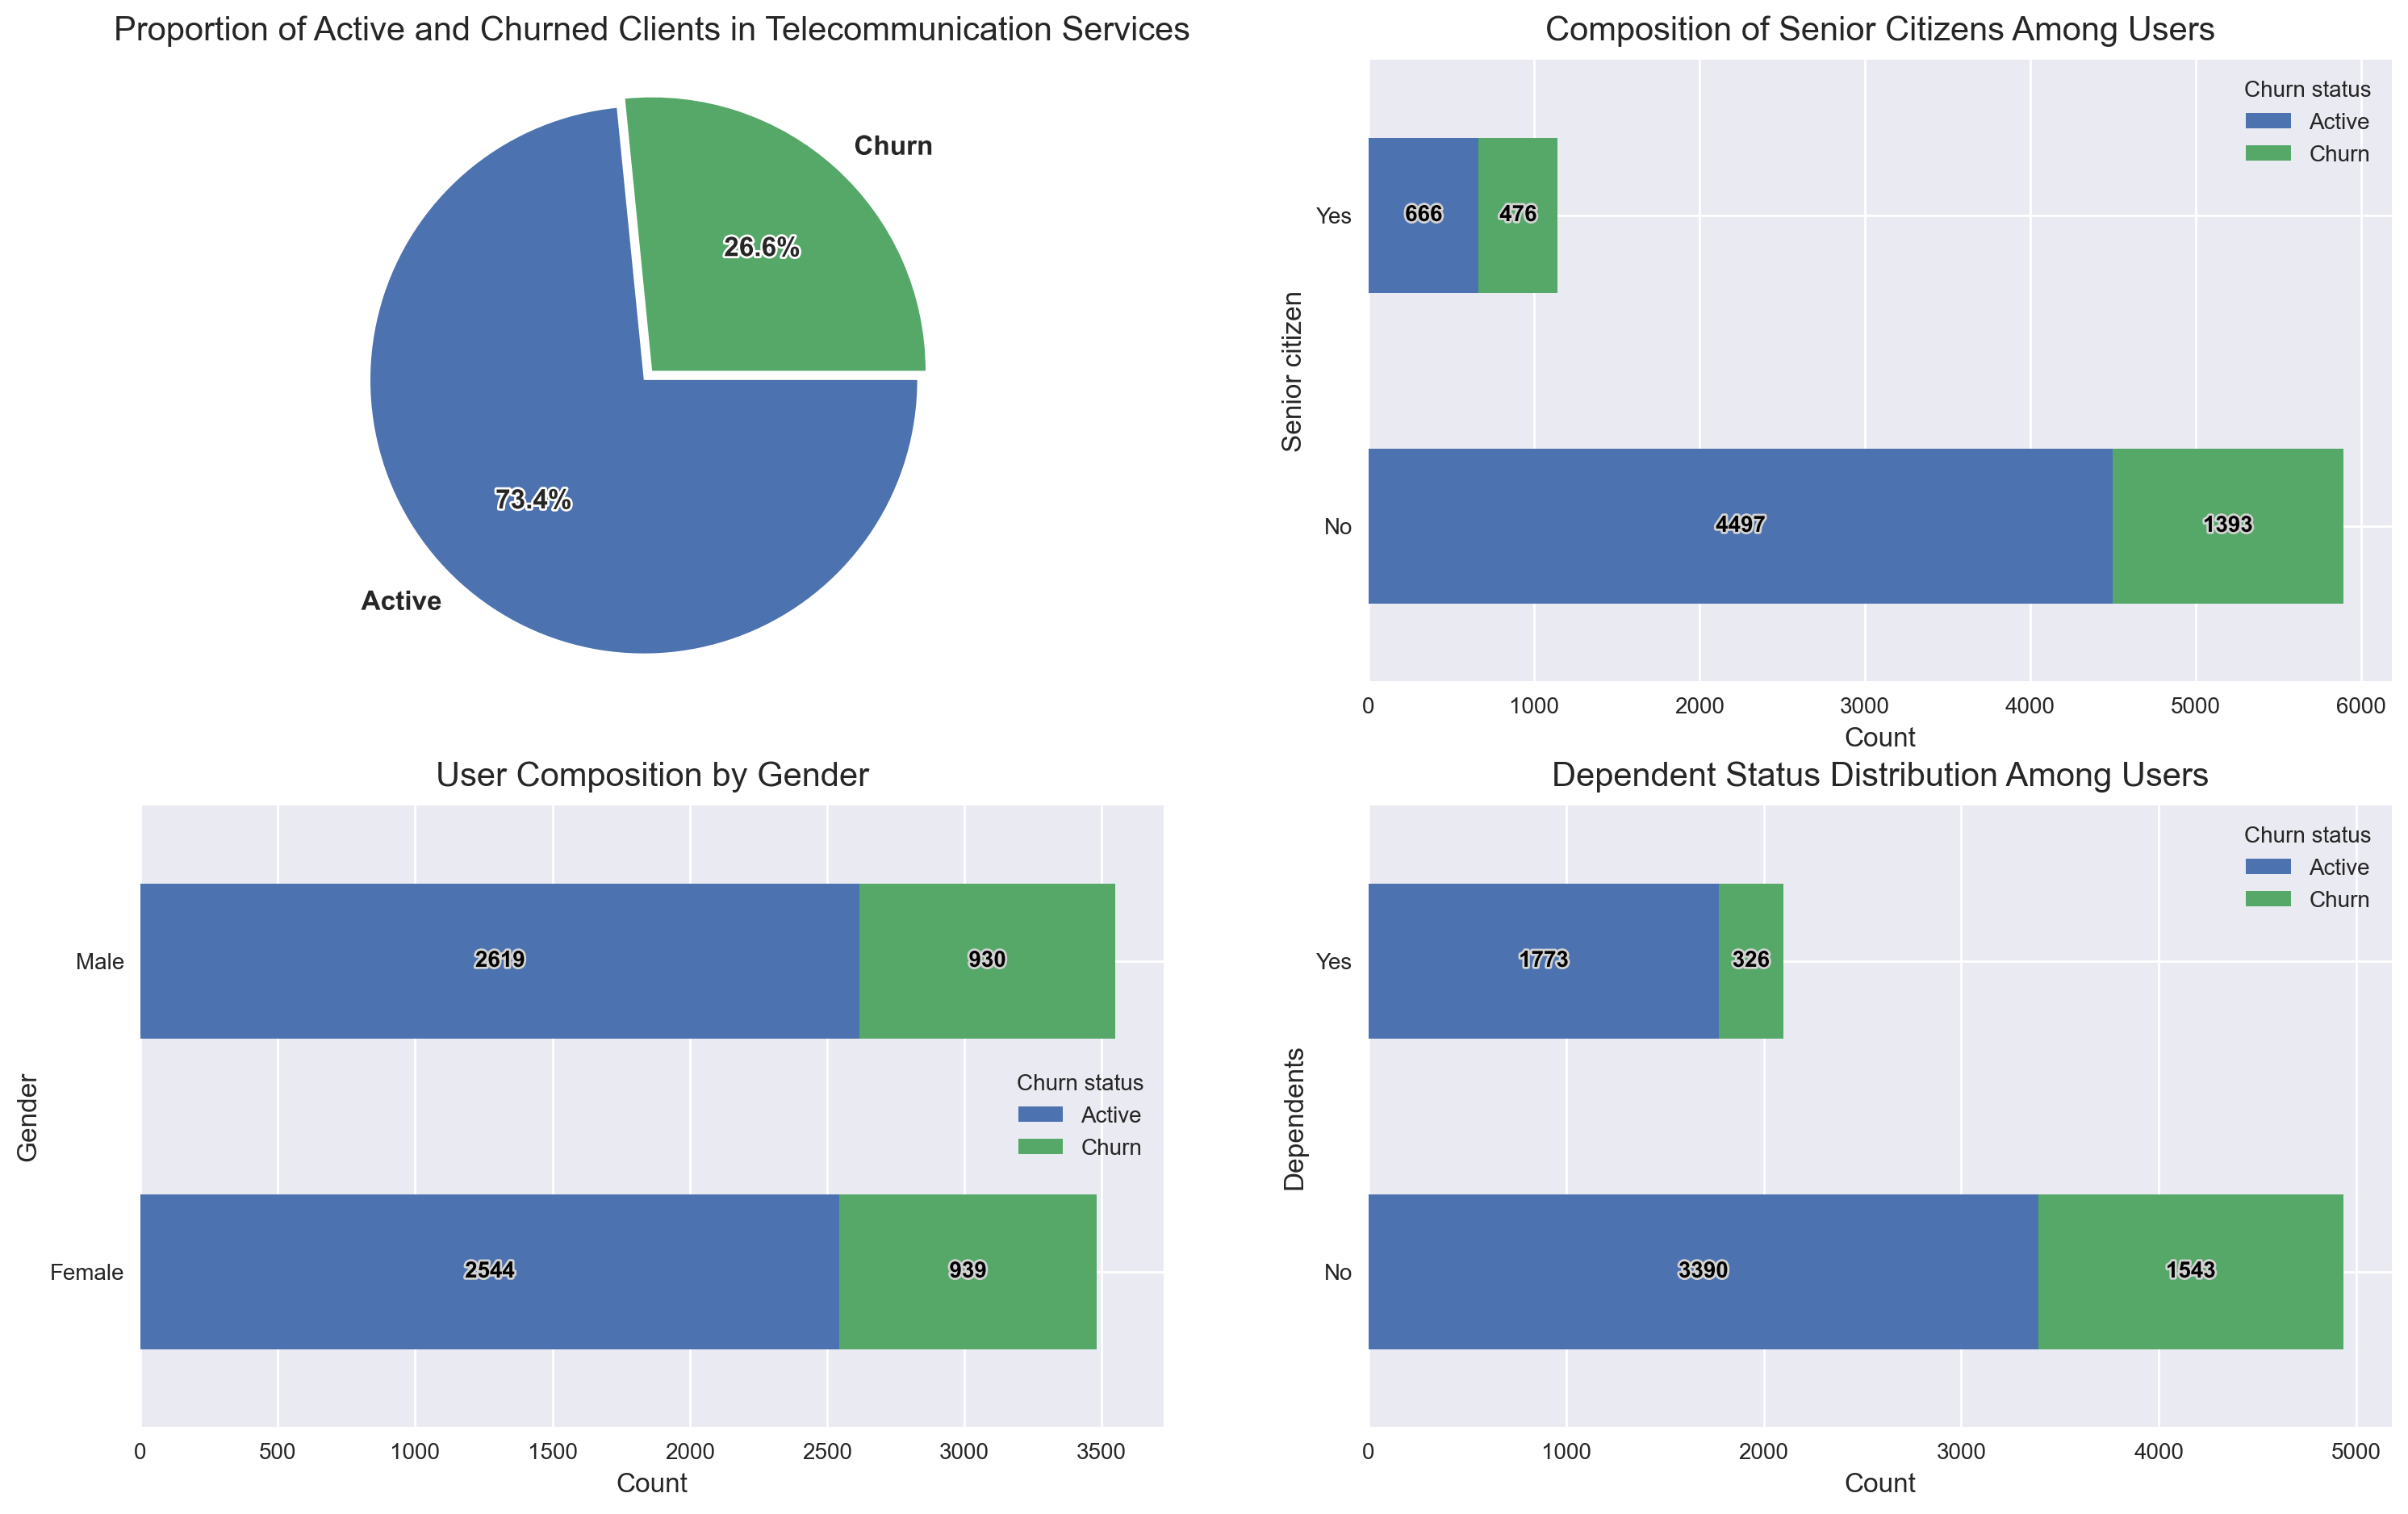

In [50]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(18, 11))

# proporsi klien aktif dan churn
df['Churn'].value_counts(True).plot(kind='pie', explode=[0.05, 0], labels=['Active', 'Churn'], counterclock=False, autopct='%1.1f%%',
                                    ax=ax[0][0], textprops={'path_effects':[pe.withStroke(foreground='white', linewidth=2)],
                                                         'weight':'bold', 'size':12}, radius=1.1)
ax[0][0].set_ylabel(None)
ax[0][0].set_title("Proportion of Active and Churned Clients in Telecommunication Services", size=15, y=1.01)

# komposisi klien dengan kelompok lanjut usia
senior_citizen_comp = df.groupby('SeniorCitizen')['Churn'].value_counts().unstack(level=-1).rename(index={0:'No', 1:'Yes'})
senior_citizen_comp.plot(kind='barh', stacked=True, ax=ax[0][1])
ax[0][1].legend(title='Churn status', labels=['Active', 'Churn'])
for i in ax[0][1].patches:
    ax[0][1].annotate(int(i.get_width()), (i.get_x()+i.get_width()/2, i.get_y()+i.get_height()/2), ha='center', va='center',
                      weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])
ax[0][1].set_title("Composition of Senior Citizens Among Users", size=15, y=1.01)
ax[0][1].set_xlabel("Count", size=12)
ax[0][1].set_ylabel('Senior citizen', size=12)

# komposisi klien pada masing-masing gender
df.groupby('gender')['Churn'].value_counts().unstack(level=-1).plot(kind='barh', stacked=True, ax=ax[1][0])
ax[1][0].legend(title='Churn status', labels=['Active', 'Churn'])
for i in ax[1][0].patches:
    ax[1][0].annotate(int(i.get_width()), (i.get_x()+i.get_width()/2, i.get_y()+i.get_height()/2), ha='center', va='center',
                      weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])
ax[1][0].set_title("User Composition by Gender", size=15, y=1.01)
ax[1][0].set_xlabel("Count", size=12)
ax[1][0].set_ylabel('Gender', size=12)

# komposisi klien yang memiliki tanggungan
dependents_comp = df.groupby('Dependents')['Churn'].value_counts().unstack(level=-1).rename(index={0:'No', 1:'Yes'})
dependents_comp.plot(kind='barh', stacked=True, ax=ax[1][1])
ax[1][1].legend(title='Churn status', labels=['Active', 'Churn'])
for i in ax[1][1].patches:
    ax[1][1].annotate(int(i.get_width()), (i.get_x()+i.get_width()/2, i.get_y()+i.get_height()/2), ha='center', va='center',
                      weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])
ax[1][1].set_title("Dependent Status Distribution Among Users", size=15, y=1.01)
ax[1][1].set_xlabel("Count", size=12)
ax[1][1].set_ylabel('Dependents', size=12)

plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari keseluruhan data, tingkat *churn* klien layanan telekomunikasi berada pada nilai 26,6%. Adapun untuk klien yang aktif berada pada nilai 73,4%.
* Terdapat sebanyak 16,2% klien lansia dan 83,8% non-lansia. Akan tetapi tingkat *churn* pada kelompok lansia lebih tinggi dibandingkan kelompok non-lansia. Kelompok lansia memiliki tingkat *churn* sebesar 41,7%. Adapun kelompok non-lansia memiliki tingkat *churn* sebesar 23,7%.
* Terdapat sebanyak 50,5% klien pria dan 49,5% klien wanita. Tingkat *churn* klien wanita sedikit lebih besar dibandingkan klien pria. Tingkat *churn* klien pria berada pada nilai 26,2%. Adapun tingkat *churn* klien wanita berada pada nilai 27%.
* Terdapat sebanyak 29,8% klien yang memiliki tanggungan dan 70,2% klien tanpa tanggungan. Tingkat *churn* klien tanpa tanggungan lebih besar dibandingkan klien yang memiliki tanggungan. Tingkat *churn* klien yang memiliki tanggungan adalah 15,5%. Adapun tingkat *churn* klien tanpa tanggungan adalah 31,3%.

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Meskipun proporsi lansia cukup kecil serta memiliki tingkat *churn* yang tinggi, akan tetapi memberikan promo kepada kelompok ini memiliki resiko yang lebih kecil dibandingkan memberi promo kepada kelompok non-lansia. Hal ini terjadi akibat *weighted churn rate* yang lebih rendah untuk kelompok lansia, yaitu sebesar `16,2% x 41,7%` = `6,8%`. Adapun *weighted churn rate* untuk kelompok non-lansia, yaitu sebesar `83,8% x 23,7%` = `19,9%`.
* Menarik kelompok yang memiliki tanggungan melalui sejumlah promosi jauh lebih menguntungkan dibandingkan menarik kelompok tanpa tanggungan. Hal ini dikarenakan resiko kerugian akan lebih minimal sebab *weighted churn rate* bernilai cukup kecil, yaitu `29,8% x 15,5%` = `4,6%` dimana untuk kelompok tanpa tanggunan memiliki *weighted churn rate* sebesar `70,2% x 31,3%` = `22%`.
* Kemungkinan alasan lansia memiliki peluang lebih besar untuk berhenti berlangganan terkait dengan terjadinya penurunan konsumsi layanan, penawaran yang tidak sesuai atau dukungan teknis yang tidak memadai untuk lansia yang membutuhkan bantuan lebih dibandingkan pelanggan dengan usia yang lebih muda.
* Kemungkinan alasan kenapa mereka yang memiliki tanggungan memiliki kemungkinan lebih kecil untuk berhenti berlangganan karena layanan tersebut tidak digunakan secara pribadi. Penggunaan layanan secara komunal akan membuat seseorang tidak memilih untuk berhenti berlangganan sebab akan mengganggu kegiatan orang di sekitarnya.

</div>

Berikut di bawah ini, kita akan melakukan pengujian statistik untuk mengetahui apakah kelompok usia mempengaruhi tingkat *churn* secara signifikan.

In [51]:
# uji independensi antara kelompok usia vs churn
contingency_churn_SeniorCitizen = df.groupby('Churn')['SeniorCitizen'].value_counts().unstack()
chi2_independence_test(contingency_churn_SeniorCitizen)

Critical value: 3.84 (5.00%)
Statistic: 158.44 (0.00%)
H0 is rejected: Variables Churn and SeniorCitizen are dependent

------------------------- Observed frequency -------------------------
SeniorCitizen     0    1
Churn                   
0              4497  666
1              1393  476

------------------------- Expected frequency -------------------------
SeniorCitizen       0      1
Churn                       
0              4325.0  838.0
1              1565.0  304.0

-------------------- Chi-squared contribution (%) --------------------
SeniorCitizen      0      1
Churn                      
0               4.34  22.39
1              11.99  61.86


<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Secara statistik, kelompok usia secara signifikan mempengaruhi tingkat *churn*. Hal ini menunjukkan bahwa fitur kelompok usia menjadi fitur penting pada proyek ini untuk membangun model prediktif.
* Kategori `lansia` dan `non-lansia` memiliki nilai kontribusi $\chi^2$ yang tinggi ($\chi^2_{contribution}$ > 10%). Hal ini menunjukkan bahwa kedua metode tersebut memiliki korelasi yang kuat terhadap tingkat *churn*.
* Kelompok `lansia` memiliki korelasi yang kuat terhadap tingkat *churn* yang tinggi. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih tinggi dibandingkan *expected freq.* pada index `churn = 1`.
* Kelompok `non-lansia` memiliki korelasi yang kuat terhadap tingkat *churn* yang rendah. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih rendah dibandingkan *expected freq.* pada index `churn = 1`.

</div>

Berikut di bawah ini, kita akan melakukan pengujian statistik untuk mengetahui apakah gender mempengaruhi tingkat *churn* secara signifikan.

In [52]:
# uji independensi antara gender vs churn
contingency_churn_gender = df.groupby('Churn')['gender'].value_counts().unstack()
chi2_independence_test(contingency_churn_gender)

Critical value: 3.84 (5.00%)
Statistic: 0.48 (49.05%)
H0 is accepted: Variables Churn and gender are independent

------------------------- Observed frequency -------------------------
gender  Female  Male
Churn               
0         2544  2619
1          939   930

------------------------- Expected frequency -------------------------
gender  Female    Male
Churn                 
0       2557.0  2606.0
1        926.0   943.0

-------------------- Chi-squared contribution (%) --------------------
gender  Female   Male
Churn                
0        14.48  14.22
1        40.01  39.27


<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Secara statistik, gender klien tidak secara signifikan mempengaruhi tingkat *churn*. Hal ini menunjukkan bahwa fitur gender tidak relevan pada proyek ini untuk membangun model prediktif.

</div>

Berikut di bawah ini, kita akan melakukan pengujian statistik untuk mengetahui apakah status tanggungan mempengaruhi tingkat *churn* secara signifikan.

In [53]:
# uji independensi antara dependents vs churn
contingency_churn_dependents = df.groupby('Churn')['Dependents'].value_counts().unstack()
chi2_independence_test(contingency_churn_dependents)

Critical value: 3.84 (5.00%)
Statistic: 186.32 (0.00%)
H0 is rejected: Variables Churn and Dependents are dependent

------------------------- Observed frequency -------------------------
Dependents     0     1
Churn                 
0           3390  1773
1           1543   326

------------------------- Expected frequency -------------------------
Dependents       0       1
Churn                     
0           3622.0  1541.0
1           1311.0   558.0

-------------------- Chi-squared contribution (%) --------------------
Dependents      0      1
Churn                   
0            7.97  18.73
1           22.01  51.73


<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Secara statistik, status tanggungan secara signifikan mempengaruhi tingkat *churn*. Hal ini menunjukan bahwa fitur tersebut penting pada proyek ini untuk membangun model prediktif.
* Baik klien yang memiliki tanggungan maupun tidak, memiliki nilai kontribusi $$\chi^2$ yang tinggi ($\chi^2_{contribution}$ > 10%). Hal ini menunjukkan bahwa kedua jenis klien tersebut memiliki korelasi yang kuat dengan tingkat *churn*.
* Klien yang memiliki tanggungan memiliki korelasi yang kuat terhadap tingkat *churn* yang rendah. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih rendah dibandingkan *expected freq.* pada index `churn = 1`.
* Klien tanpa tanggungan memiliki korelasi yang kuat terhadap tingkat *churn* yang tinggi. Hal ini dapat dilihat dari nilai *observed freq.* yang lebih tinggi dibandingkan *expected freq.* pada index `churn = 1`.

</div>

## 5) Pengaruh durasi berlangganan terhadap tingkat *churn*

Berikut di bawah ini merupakan deskripsi statistik untuk data durasi berlangganan antara klien aktif dan yang sudah berhenti berlangganan.

In [54]:
# dekripsi statistik
df.groupby('Churn')['Duration'].describe()

count         mean         std   min    25%     50%     75%     max
Churn                                                                      
0      5163.0  1146.885532  732.773458  31.0  457.0  1157.0  1857.0  2191.0
1      1869.0   547.352060  594.389607  30.0   61.0   304.0   883.0  2191.0

Berikut di bawah ini merupakan histogram dan boxplot yang menunjukkan distribusi durasi berlangganan antara klien aktif dan yang sudah berhenti berlangganan.

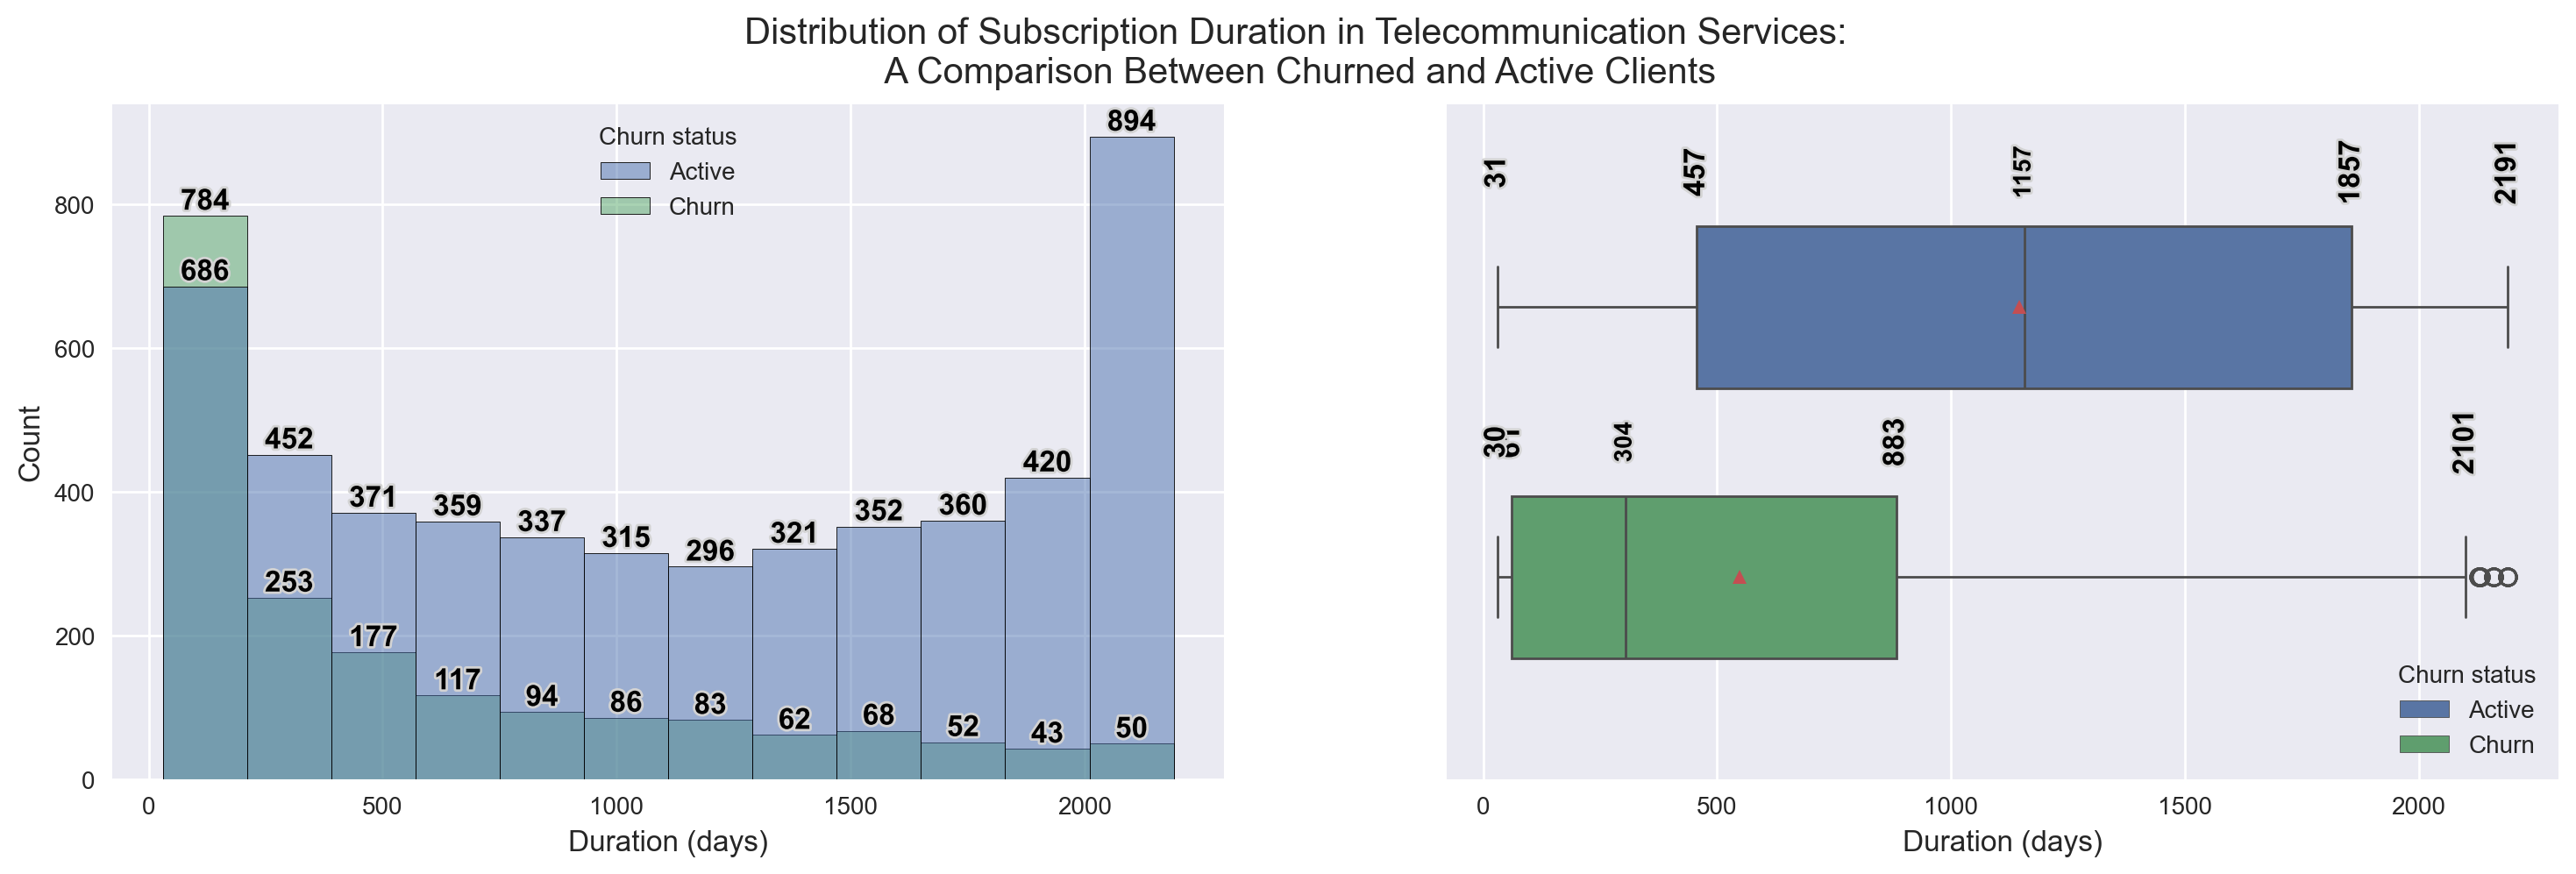

In [55]:
# histogram dan boxplot distribusi durasi langganan
fig, ax = plt.subplots(ncols=2, figsize=(18, 5))

sns.histplot(x=df['Duration'], hue=df['Churn'].replace({0:'Active', 1:'Churn'}).rename('Churn status'), 
             binwidth=6*30, ax=ax[0], legend=True)
plt.suptitle("Distribution of Subscription Duration in Telecommunication Services:\n A Comparison Between Churned and Active Clients", 
             size=15)
ax[0].set_xlabel("Duration (days)", size=12)
ax[0].set_ylabel('Count', size=12)

sns.boxplot(x=df['Duration'], hue=df['Churn'].replace({0:'Active', 1:'Churn'}).rename('Churn status'), 
            gap=0.4, ax=ax[1], showmeans=True)
ax[1].set_xlabel("Duration (days)", size=12)

# anotasi histogram
ax[0].bar_label(ax[0].containers[0], size=12, weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])
ax[0].bar_label(ax[0].containers[1], size=12, weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])

# anotasi boxplot
for i in ax[1].containers:
    for attr in ['median', 'whiskers']:
        if attr != 'whiskers':
            x, y = getattr(i[0], attr).get_data()[0].mean(), getattr(i[0], attr).get_data()[1].mean()
            ax[1].annotate(int(x), (x, y-0.2), ha='center', va='center', rotation=90,
                           weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])
        else:
            # terdapat 2 whisker: atas dan bawah
            for j in range(2):
                # terdapat 2 data pada 1 whisker: cap dan q1/q3
                for k in range(2):
                    x, y = getattr(i[0], attr)[j].get_data()[0][k], getattr(i[0], attr)[j].get_data()[1][k]
                    ax[1].annotate(int(x), (x, y-0.2), ha='center', va='center', rotation=90, size=12,
                                   weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])

plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Persebaran data durasi berlangganan untuk klien aktif memiliki distribusi **U-shaped**. Distribusi ini mengakibatkan terdapatnya modus dan sub-modus pada bagian tepi di kedua sisi serta memiliki kontur yang landai pada sisi tengah. Modus dapat ditemui pada semester kedua tahun ke-6. Adapun sub-modus berada pada semester pertama tahun ke-1. Anti-modus (titik terendah distribusi) dapat ditemukan pada semester pertama tahun ke-4. Distribusi **U-shaped** mengakibatkan data durasi berlangganan untuk klien aktif memiliki bentuk yang simetris sehingga nilai rata-rata akan cukup berdekatan dengan nilai mediannya.
* Persebaran data durasi berlangganan untuk klien non-aktif memiliki distribusi *right-skew*. Modus data dapat ditemukan pada semester pertama tahun ke-1. Distribusi ini mengakibatkan mayoritas klien memiliki durasi berlangganan yang relatif singkat. Hal tersebut dapat dilihat melalui boxplot dimana 25% pengguna non-aktif berhenti berlangganan pada akhir bulan ke-2. 
* Tipikal durasi berlangganan untuk klien non-aktif yaitu sebesar 304 hari (~10 bulan). Adapun untuk klien aktif, yang mana durasi berlangganan masih terus berlanjut, hingga saat ini memiliki tipikal durasi berlangganan sebesar 1157 hari (~3 tahun).

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dibutuhkan waktu sekitar 10 bulan untuk klien melakukan penyesuaian dan memutuskan apakah tetap terus berlangganan atau berhenti segera dari layanan telekomunikasi yang digunakan. Oleh karena itu, perlu ditingkatkan pelayanan untuk klien baru pada fase ini sehingga dapat meningkatkan retensi pelanggan.
* Distribusi **U-shaped** pada data klien aktif menunjukkan terdapatnya 2 jenis populasi pada data, yaitu populasi pengguna baru dan populasi pengguna lama. Populasi pengguna baru merupakan klien yang aktif berlangganan selama $<$ 3,5 tahun, sedangkan populasi pengguna lama merupakan klien yang aktif berlangganan $>$ 3,5 tahun. Oleh karena itu, perlakuan untuk kedua populasi ini harus berbeda, baik dari aspek promosi, pelayanan, dll.

</div>

Pada bagian berikutnya, kita akan melakukan *inferential statistics* untuk menguji hipotesis menggunakan *function* di bawah ini.

In [56]:
def ind_ttest(data1, data2, alpha=0.05, alternative='two-sided', parametric_test=True):
    """
    alternative: 'two-sided', 'less', 'greater'
        * 'two-side': rata-rata distribusi kedua sampel tidak sama.
        * 'less': rata-rata distribusi sampel data1 < rata-rata distribusi sampel data2
        * 'greater': rata-rata distribusi sampel data1 > rata-rata distribusi sampel data2
    """
    if parametric_test:
        stat_test = ttest_ind(data1, data2, alternative=alternative)
    else:
        stat_test = mannwhitneyu(data1, data2, alternative=alternative)

    statistic = stat_test.statistic
    pvalue = stat_test.pvalue
    print(f"Statistic: {statistic:.2f} ({pvalue:.2%})")
    if pvalue >= alpha:
        print("H0 is accepted")
    else:
        print("H0 is rejected")

Berikut di bawah ini, kita akan melakukan uji hipotesis untuk memeriksa apakah durasi berlangganan klien aktif lebih besar dari pada klien yang berhenti berlangganan.
$$H_o=\mu^{duration}_{active} \le \mu^{duration}_{churn}$$
$$H_a=\mu^{duration}_{active} > \mu^{duration}_{churn}$$

Data durasi berlangganan untuk kedua kelompok tidak terdistribusi normal, sehingga kita akan melakukan uji non-parametrik.

In [57]:
# uji hipotesis untuk data durasi berlangganan
data1 = df.query("Churn==0")['Duration']
data2 = df.query("Churn==1")['Duration']
ind_ttest(data1, data2, alternative='greater', parametric_test=False)

Statistic: 7209769.00 (0.00%)
H0 is rejected


<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Hasil pengujian statistik menunjukkan hasil hipotesis nol ditolak. Hal ini menyimpulkan bahwa  secara *significance* rata-rata durasi berlangganan klien aktif lebih besar dari pada rata-rata durasi berlangganan klien yang berhenti berlangganan.

</div>

## 6) Pengaruh konsumsi layanan setiap bulan terhadap tingkat *churn*

Analisis konsumsi layanan akan dianalisa melalui seberapa besar biaya bulanan yang harus dibayar oleh klien. Berikut di bawah ini merupakan deskripsi statistik untuk data biaya bulanan yang dibayarkan oleh klien aktif dan klien yang sudah berhenti berlangganan.

In [58]:
# dekripsi statistik
df.groupby('Churn')['MonthlyCharges'].describe()

count       mean        std    min    25%    50%     75%     max
Churn                                                                   
0      5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35

Berikut di bawah ini merupakan histogram dan boxplot yang menunjukkan distribusi biaya bulanan yang dibayar oleh klien aktif dan klien yang sudah berhenti berlangganan.

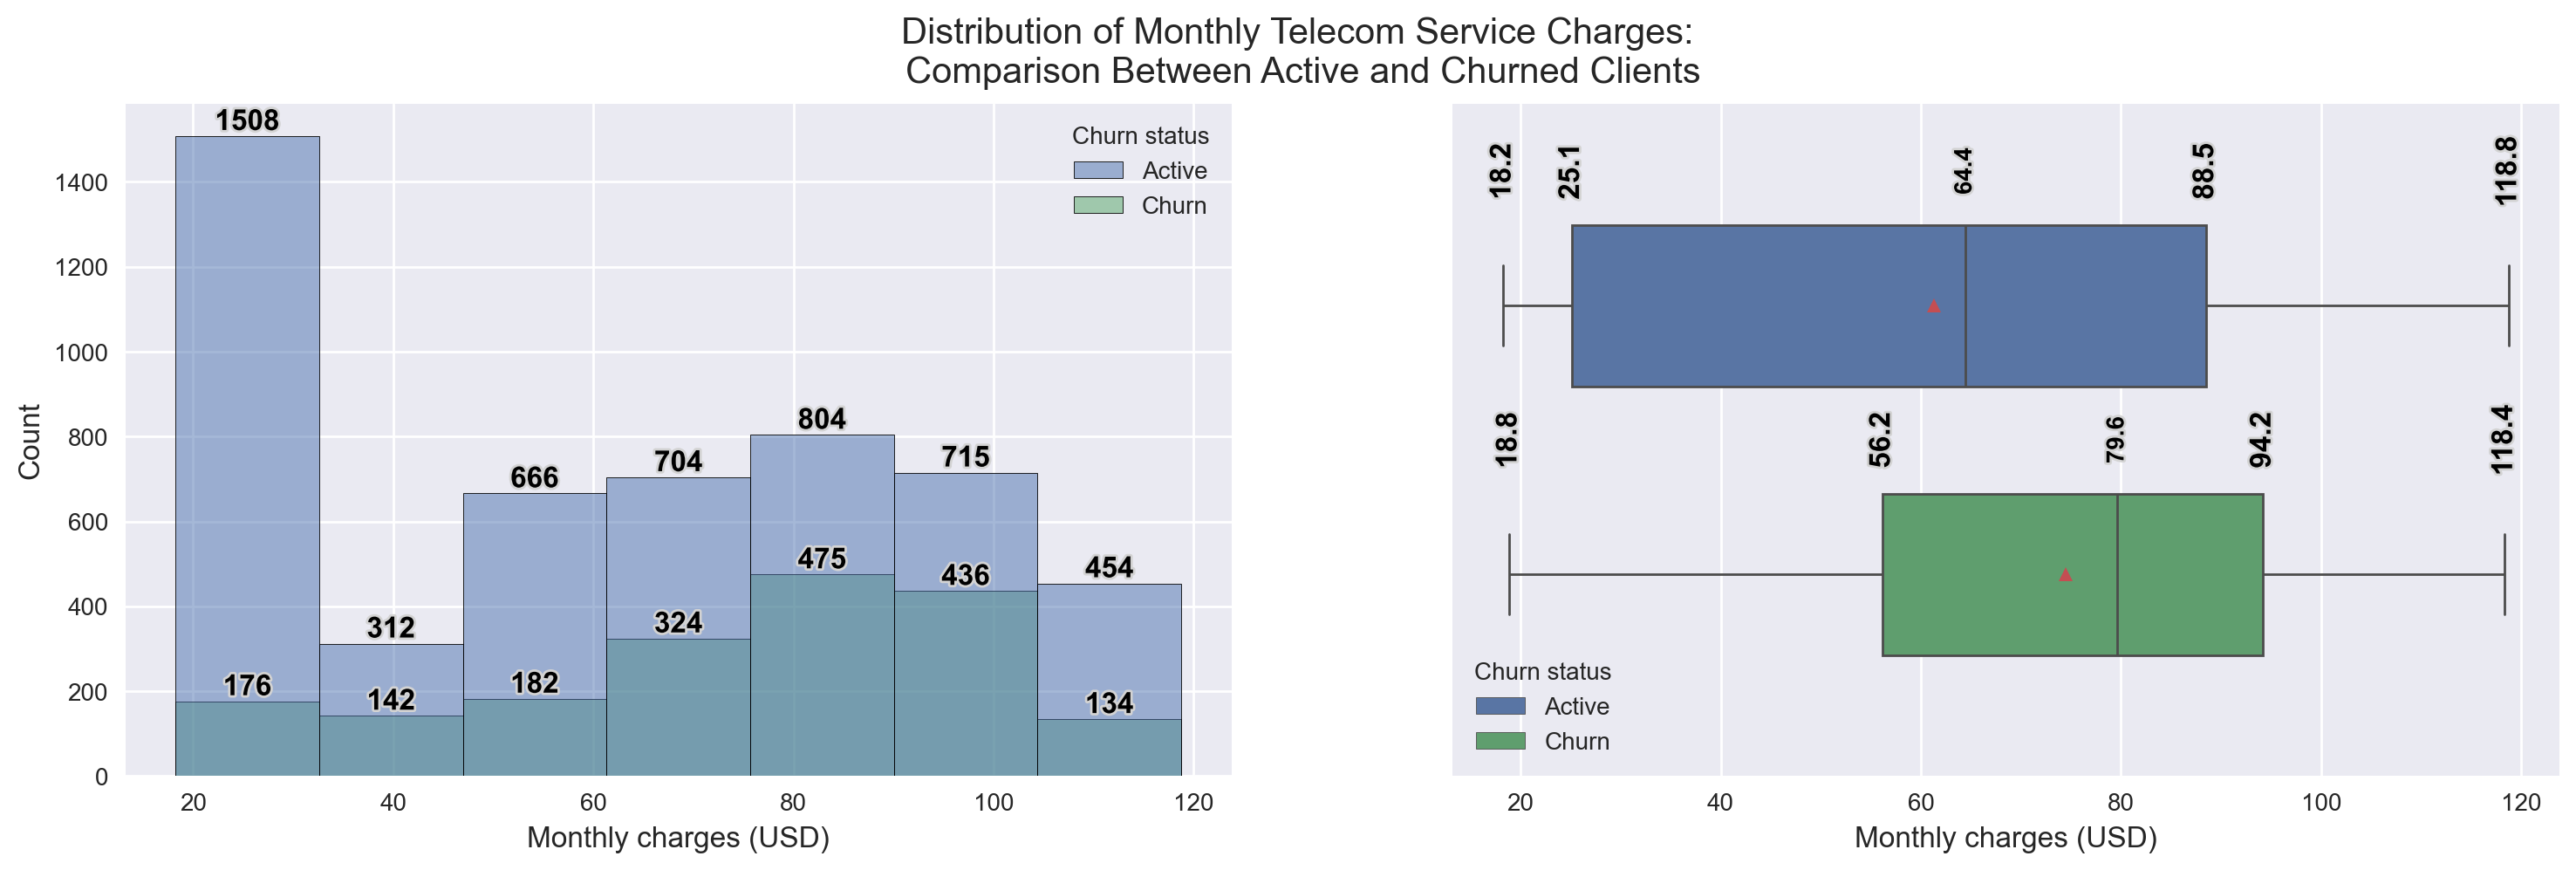

In [59]:
# histogram dan boxplot distribusi biaya bulanan
fig, ax = plt.subplots(ncols=2, figsize=(18, 5))

sns.histplot(x=df['MonthlyCharges'], hue=df['Churn'].replace({0:'Active', 1:'Churn'}).rename('Churn status'), 
             binwidth=15, ax=ax[0], legend=True)
plt.suptitle("Distribution of Monthly Telecom Service Charges: \nComparison Between Active and Churned Clients", 
             size=15)
ax[0].set_xlabel("Monthly charges (USD)", size=12)
ax[0].set_ylabel('Count', size=12)

sns.boxplot(x=df['MonthlyCharges'], hue=df['Churn'].replace({0:'Active', 1:'Churn'}).rename('Churn status'), 
            gap=0.4, ax=ax[1], showmeans=True)
ax[1].set_xlabel("Monthly charges (USD)", size=12)

# anotasi histogram
ax[0].bar_label(ax[0].containers[0], size=12, weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])
ax[0].bar_label(ax[0].containers[1], size=12, weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])

# anotasi boxplot
for i in ax[1].containers:
    for attr in ['median', 'whiskers']:
        if attr != 'whiskers':
            x, y = getattr(i[0], attr).get_data()[0].mean(), getattr(i[0], attr).get_data()[1].mean()
            ax[1].annotate(np.round(x,1), (x, y-0.2), ha='center', va='center', rotation=90,
                           weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])
        else:
            # terdapat 2 whisker: atas dan bawah
            for j in range(2):
                # terdapat 2 data pada 1 whisker: cap dan q1/q3
                for k in range(2):
                    x, y = getattr(i[0], attr)[j].get_data()[0][k], getattr(i[0], attr)[j].get_data()[1][k]
                    ax[1].annotate(np.round(x,1), (x, y-0.2), ha='center', va='center', rotation=90, size=12,
                                   weight='bold', color='black', path_effects=[pe.withStroke(foreground='lightgrey', linewidth=2)])

plt.show()

Berikut di bawah ini merupakan visualisasi untuk distribusi tagihan bulanan untuk setiap kelompok pengguna layanan utama (`internet only`, `phone only` atau `both`). Visualisasi ini ditampilkan untuk memperjelas informasi grafik di atas.

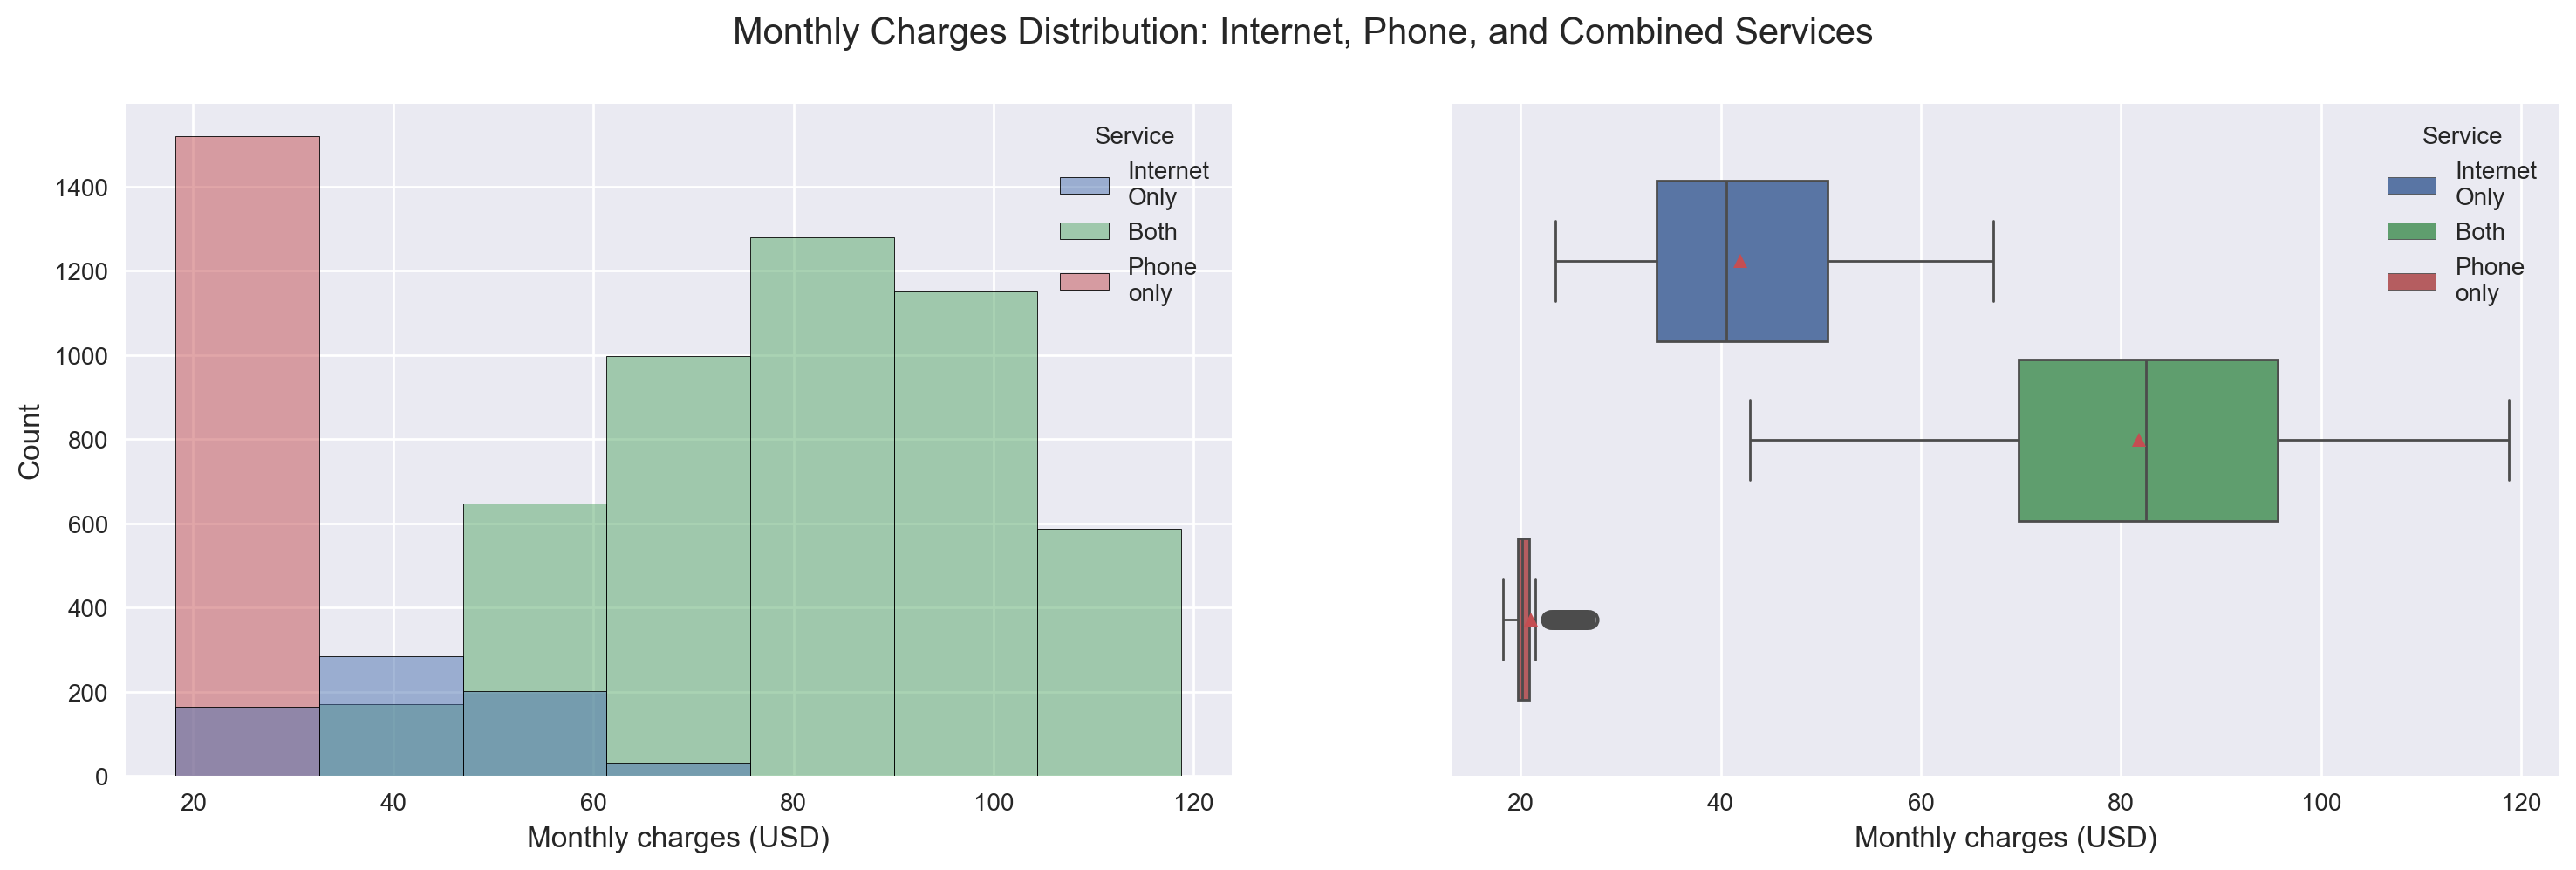

In [60]:
# investigasi distribusi biaya bulanan berdasarkan jenis layanan utama yang digunakan
# histogram dan boxplot distribusi biaya bulanan
fig, ax = plt.subplots(ncols=2, figsize=(18, 5))
plt.suptitle("Monthly Charges Distribution: Internet, Phone, and Combined Services", 
             size=15)
sns.histplot(x=df['MonthlyCharges'], hue=main_serv['Service'], 
             binwidth=15, ax=ax[0], legend=True)
ax[0].set_xlabel("Monthly charges (USD)", size=12)
ax[0].set_ylabel('Count', size=12)
sns.boxplot(x=df['MonthlyCharges'], hue=main_serv['Service'], 
            gap=0.1, ax=ax[1], showmeans=True)
ax[1].set_xlabel("Monthly charges (USD)", size=12)

plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Persebaran data tagihan bulanan untuk klien aktif secara umum, memiliki distribusi *left-skew*. Akan tetapi ditemukan sebuah anomali dimana modus tidak menjadi bagian yang kontinu dengan distribusi utama, yaitu pada rentang nilai USD 18,25 hingga USD 33,25. Adapun sub-modus yang berada pada rentang nilai USD 78,25 hingga $93,25, justru menjadi bagian yang kontinu dengan distribusi utama. Dari hasil investigasi ditemukan bahwa modus pada nilai tagihan yang lebih rendah disebabkan oleh **pengguna layanan telepon saja**. Adapun sub-modus yang berada pada nilai tagihan lebih tinggi berisi **pengguna kedua layanan (internet dan telepon)**.
* Persebaran data tagihan bulanan untuk klien non-aktif memiliki distribusi *left-skew*. Posisi modus data tagihan bulanan untuk kelompok ini berada pada titik yang sama dengan sub-modus klien yang aktif, yaitu pada rentang nilai USD 78,25 hingga USD 93,25.
* Tipikal tagihan bulanan klien yang aktif berada pada angka USD 64,4. Adapun tipikal tagihan bulanan klien yang non-aktif berada pada angka USD 79,6.

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Pengguna **layanan telepon saja** mayoritas ditemukan pada tagihan bulanan $\le$ USD 33,25. Adapun pengguna **layanan internet saja** mayoritas ditemukan pada tagihan bulanan $\le$ USD 63,25. Adapun **pengguna kedua layanan (telepon + internet)** mayoritas ditemukan pada tagihan bulanan $\ge$ USD 63,25.
* Penghasilan yang diberikan dari penggunaan **layanan telepon saja** cukup rendah, mayoritas memberikan pemasukan kurang dari USD 35 setiap bulan per orang. Ditambah kelompok ini memiliki proporsi yang cukup besar pada klien yang masih aktif. Oleh karena itu, perlu dilakukan kampanye khusus agar mereka yang hanya menggunakan layanan telepon ikut serta dalam penggunaan layanan internet sehingga pemasukan perusahaan dapat bertambah.
* Alasan terdapatnya distribusi *left-skew* pada grafik di atas, yaitu karena pengguna **layanan internet saja** mayoritas berada pada rentang tagihan $\le$ USD 63,25. Oleh karena itu mengakibatkan terjadinya perpanjangan ekor pada data sisi kiri.
* Tagihan bulanan klien non-aktif lebih besar dari pada klien aktif. Tagihan yang tinggi dapat menjadi alasan keputusan mereka untuk berhenti berlangganan. Kemungkinan besar klien merasa harga tinggi yang mereka bayarkan tidak sebanding dengan nilai yang mereka terima, baik dari kualitas layanan maupun tawaran harga yang lebih kompetitif dari kompetitor.

</div>

Berikut di bawah ini, kita akan melakukan uji hipotesis untuk memeriksa apakah biaya bulanan klien aktif secara *significance* lebih kecil dari pada klien yang berhenti berlangganan.
$$H_o=\mu^{charges}_{active} \ge \mu^{charges}_{churn}$$
$$H_a=\mu^{charges}_{active} < \mu^{charges}_{churn}$$

Data biaya bulanan untuk kedua kelompok tidak terdistribusi normal, sehingga kita akan melakukan uji non-parametrik.

In [61]:
# uji hipotesis untuk data tagihan bulanan
data1 = df.query("Churn==0")['MonthlyCharges']
data2 = df.query("Churn==1")['MonthlyCharges']
ind_ttest(data1, data2, alternative='less', parametric_test=False)

Statistic: 3663498.50 (0.00%)
H0 is rejected


<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Hasil pengujian statistik menunjukkan hasil hipotesis nol ditolak. Dapat disimpulkan bahwa secara *significance* rata-rata tagihan bulanan klien aktif lebih kecil dari pada rata-rata tagihan bulanan klien yang berhenti berlangganan.

</div>

## 7) Analisis multi-kolinearitas pada variabel numerik

Pada proyek ini, terdapat 4 fitur yang dikategorikan sebagai variabel numerik, yaitu `'MonthlyCharges'`, `'TotalCharges'`, `'Duration'`, dan `'Net_Addons_Num'`. Kita perlu melakukan memeriksa independensi antar fitur numerik untuk menghindari masalah multi-kolinearitas. Hal ini perlu dilakukan agar dapat mereduksi fitur bermasalah sehingga dapat mengoptimalkan pelatihan model.

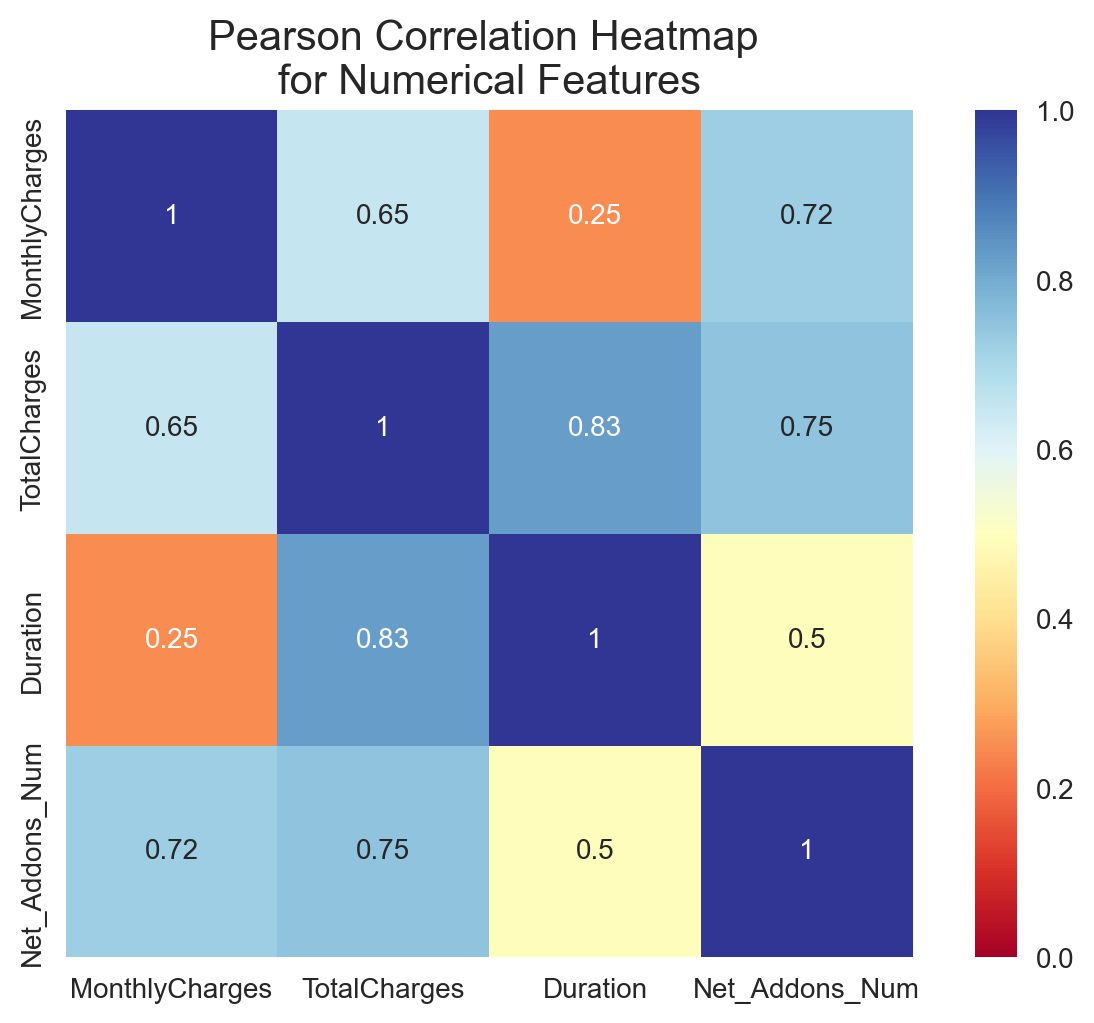

In [62]:
# nilai korelasi pearson untuk setiap variabel numerik
sns.heatmap(df[['MonthlyCharges', 'TotalCharges', 'Duration', 'Net_Addons_Num']].corr(),
            annot=True, square=True, vmin=0, vmax=1, cmap='RdYlBu')
plt.title("Pearson Correlation Heatmap \nfor Numerical Features", size=15)
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Antar variabel numerik seluruhnya memiliki korelasi positif.
* Fitur `MonthlyCharges` memiliki korelasi yang tinggi (0,75 $\ge$ `corr` $\ge$ 0,50) terhadap fitur `TotalCharges` dan `Net_Addons_Num`.
* Fitur `TotalCharges` memiliki korelasi yang tinggi terhadap fitur `MonthlyCharges` dan `Net_Addons_Num`, serta memiliki korelasi yang sangat tinggi (1,00 $\ge$ `corr` $\ge$ 0,75) terhadap fitur `Duration`.
* Fitur `Duration` memiliki korelasi yang tinggi terhadap fitur `Net_Addons_Num`.

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Seluruh fitur numerik memiliki masalah multi-kolinearitas. Akan tetapi, kita tidak dapat membuang seluruh fitur tersebut karena berdasarkan analisis data sebelumnya, diketahui terdapat hubungan yang kuat antara konsumsi layanan (berdasarkan tagihan bulanan), jumlah fitur tambahan yang digunakan, serta durasi berlangganan terhadap tingkat *churn* seseorang. 
* Dari seluruh fitur numerik di atas, fitur yang memiliki masalah multi-kolinearitas paling besar adalah `TotalCharges`. Fitur tersebut memiliki masalah multi-kolinearitas pada seluruh fitur lainnya dengan nilai korelasi yang tinggi hingga sangat tinggi. Hal ini dapat terjadi karena total tagihan merupakan produk matematis dari besaran tagihan bulanan, durasi berlangganan dan jumlah layanan yang digunakan. Oleh karena itu, fitur `TotalCharges` tidak akan digunakan pada tahap pelatihan model.

</div>

## 8) Analisis segmentasi pelanggan

Pada bagian ini, kita akan melakukan analisis segmentasi pelanggan. Hal ini perlu dilakukan agar tim pemasaran dapat meramu dengan baik, apa saja komposisi promosi yang akan diberikan kepada masing-masing segmen apabila peluang mereka berhenti berlangganan cukup besar.

Untuk mempermudah visualisasi data untuk masing-masing segmen, maka kita akan melakukan teknik *principal component analysis* (PCA), sehingga seluruh fitur direduksi menjadi data 2 dimensi.

In [63]:
# melakukan PCA
cluster_pipeline = Pipeline([
    ('feature_eng', make_column_transformer((OneHotEncoder(drop='first', sparse_output=False), make_column_selector(dtype_include=object)),
                                            (StandardScaler(), make_column_selector(dtype_include=np.number))
                                            )),
    ('pca', PCA(n_components=2))
])

# >> TotalCharges tidak digunakan karena representasi dari MonthlyCharges, Duration, dan Net_Addon_Num (dibahas di sesi multikolinearitas).
# >> Churn tidak digunakan karena bukan bagian dari karakter/sifat pengguna.
cluster_df = df.drop(columns=['customerID', 'TotalCharges', 'Churn'])
cluster_df[['PCA_1', 'PCA_2']] = cluster_pipeline.fit_transform(cluster_df)
cluster_df.head()

gender  SeniorCitizen  Partner  Dependents            Type  \
0  Female              0        1           0  Month-to-month   
1    Male              0        0           0        One year   
2    Male              0        0           0  Month-to-month   
3    Male              0        0           0        One year   
4  Female              0        0           0  Month-to-month   

   PaperlessBilling              PaymentMethod  MonthlyCharges  Duration  \
0                 1           Electronic check           29.85        31   
1                 0               Mailed check           56.95      1036   
2                 1               Mailed check           53.85        61   
3                 0  Bank transfer (automatic)           42.30      1371   
4                 1           Electronic check           70.70        61   

  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0             DSL             0.0           1.0               0.0   
1             DSL             1.0           0.0               1.0   
2             DSL             1.0           1.0               0.0   
3             DSL             1.0           0.0               1.0   
4     Fiber optic             0.0           0.0               0.0   

   TechSupport  StreamingTV  StreamingMovies  Net_Addons_Num PhoneService  \
0          0.0          0.0              0.0             1.0      No line   
1          0.0          0.0              0.0             2.0  Single line   
2          0.0          0.0              0.0             2.0  Single line   
3          1.0          0.0              0.0             3.0      No line   
4          0.0          0.0              0.0             0.0  Single line   

      PCA_1     PCA_2  
0 -1.456510 -0.242041  
1 -0.619373  0.542152  
2 -0.824887 -0.536690  
3  0.307597  1.178438  
4 -2.031160 -1.702956

Pada bagian berikutnya, kita akan melakukan *clustering* menggunakan algoritma **Gaussian Mixture Model (GMM)**. Model ini merupakan model *unsupervised learning*, yang mengasumsikan bahwa data dihasilkan dari beberapa distribusi Gaussian (normal).

Untuk memperoleh jumlah *cluster* terbaik, maka kita akan melakukan sejumlah iterasi dan analisis menggunakan *elbow-method*. ***Elbow-method*** merupakan analisis yang dilakukan dengan melakukan visualisasi nilai fungsi objektif model untuk setiap jumlah *cluster*. Fungsi objektif yang akan kita gunakan, yaitu *Bayesian Information Criterion* (BIC).

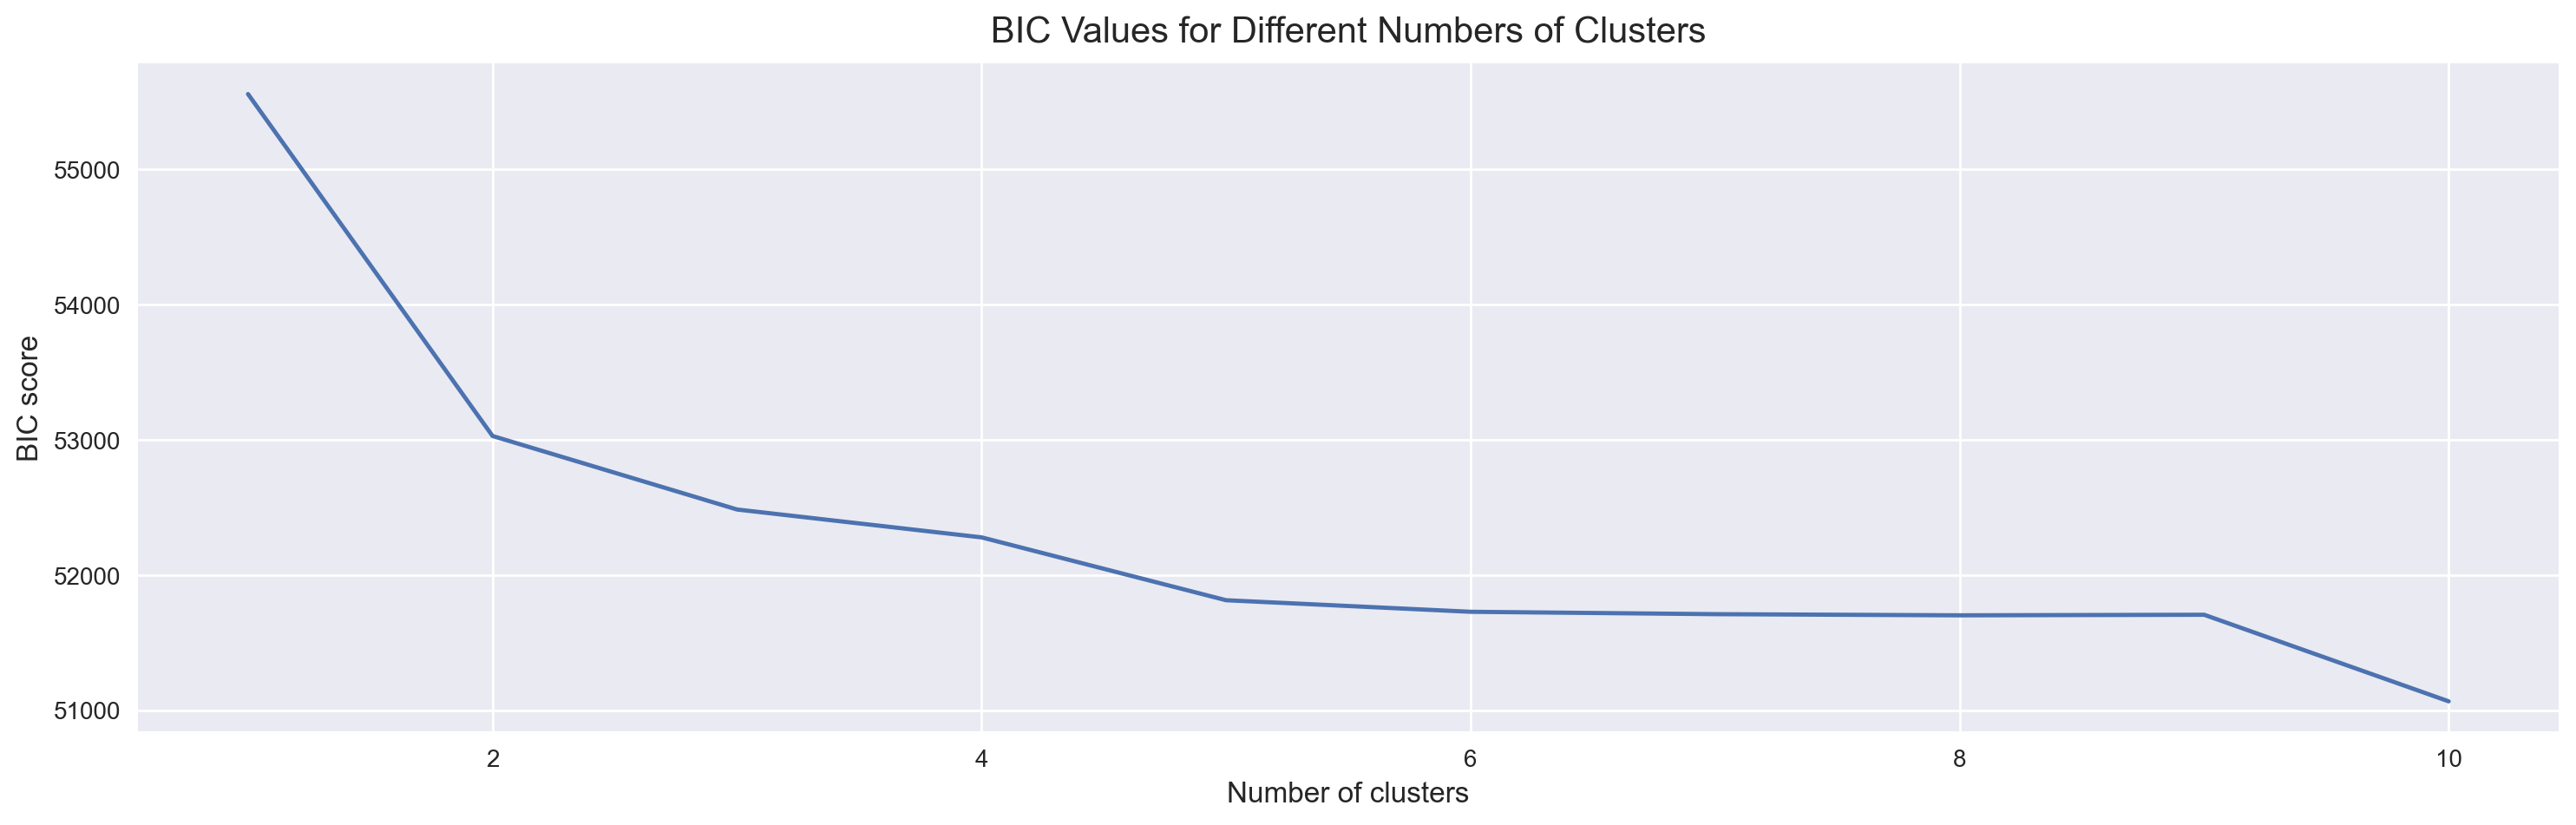

In [64]:
# mencari jumlah klaster terbaik
bic = []
for n in range(1,11):
    gmm = GaussianMixture(n_components=n, n_init=10, tol=1e-4, random_state=101010)
    gmm.fit(cluster_df[['PCA_1', 'PCA_2']])
    bic.append(gmm.bic(cluster_df[['PCA_1', 'PCA_2']]))

# visualisasi
plt.figure(figsize=(18,5))
plt.plot(range(1,11), bic)
plt.title("BIC Values for Different Numbers of Clusters", size=15, y=1.01)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('BIC score', size=12)
plt.show()

Dari hasil di atas, dapat kita simpulkan bahwa penggunaan jumlah klaster sebanyak 5 buah, sudah cukup baik pada proyek ini. Hal ini dikarenakan, penurunan nilai BIC relatif kecil setelah `n_clusters = 5`.

Berikutnya, kita akan melakukan *clustering* pada data dan menampilkan visualisasinya.

In [65]:
# melakukan clustering
gmm = GaussianMixture(n_components=5, n_init=10, tol=1e-4, random_state=101010)
cluster_df['Cluster'] = gmm.fit_predict(cluster_df[['PCA_1', 'PCA_2']])

# menambahkan model GMM yang telah dilatih ke dalam pipeline
cluster_pipeline.steps.append(('clustering_model', gmm))

# menyimpan pipeline
joblib.dump(cluster_pipeline, '../assets/cluster_pipeline.pkl')

# visualisasi
px.scatter(data_frame=cluster_df, x='PCA_1', y='PCA_2', color='Cluster',
           hover_data=cluster_df.columns, title="Clustering Analysis of Telecom Customers Using PCA")

Kita akan melihat bagaimana karakteristik durasi berlangganan dan konsumsi bulanan untuk masing-masing *cluster* secara statistik.

In [66]:
# deskripsi statistik untuk setiap cluster
cluster_df.groupby('Cluster')[['MonthlyCharges', 'Duration']].describe()

MonthlyCharges                                                        \
                 count       mean        std    min    25%     50%       75%   
Cluster                                                                        
0               1856.0  91.304203  15.781725  39.30  85.25  94.750  101.8625   
1               1052.0  22.477567   5.861206  18.25  19.80  20.250   24.4500   
2               1858.0  77.585307  20.819437  29.30  60.95  79.275   92.4500   
3                589.0  25.883701  10.978756  18.75  19.75  20.250   25.0500   
4               1677.0  61.511628  18.735660  18.55  49.80  69.650   75.9000   

                Duration                                                 \
            max    count         mean         std   min     25%     50%   
Cluster                                                                   
0        118.65   1856.0  1068.206358  675.457226  30.0   457.0  1036.0   
1         70.40   1052.0  1094.642586  705.848479  30.0   457.0  1067.0   
2        118.75   1858.0  1529.021529  618.101954  31.0  1067.0  1706.0   
3         71.10    589.0   205.791171  217.203466  30.0    31.0    92.0   
4         91.85   1677.0   505.714371  545.982881  30.0    91.0   304.0   

                         
            75%     max  
Cluster                  
0        1675.0  2191.0  
1        1737.0  2191.0  
2        2071.0  2191.0  
3         337.0  1157.0  
4         761.0  2191.0

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Berdasarkan jumlah konsumsi bulanan terbesar berdasarkan nilai tagihan bulanan, maka peringkat pertama yaitu `cluster-0`, peringkat kedua adalah `cluster-2`, peringkat ketiga adalah `cluster-4`, dan peringkat keempat adalah `cluster-1` dan `cluster-3`, 
* Adapun tipikal tagihan bulanan untuk masing-masing *cluster*, yaitu USD 94,75 untuk `cluster-0`, USD 79,28 untuk `cluster-2`, USD 69,65 untuk `cluster-4`, dan USD 20,25 untuk `cluster-1` dan `cluster-3`.
* Berdasarkan durasi berlangganan yang tertinggi, maka peringkat pertama yaitu `cluster-2`, peringkat kedua adalah `cluster-1`, peringkat ketiga adalah `cluster-0`, peringkat keempat adalah `cluster-4`, dan peringkat kelima adalah `cluster-3`.
* Adapun tipikal durasi berlangganan untuk masing-masing *cluster*, yaitu 1706 hari untuk `cluster-2`, 1067 hari untuk `cluster-1`, 1036 hari untuk `cluster-0`, 304 hari untuk `cluster-4`, dan 92 hari untuk `cluster-3`.

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Berdasarkan temuan di atas, `cluster-2` merupakan klien dengan loyalitas tinggi, baik dari jumlah konsumsi layanan serta durasi berlangganan. Adapun sebaliknya, `cluster-3` merupakan klien dengan tingkat konsumsi rendah serta belum teruji loyalitasnya dari sisi lama waktu berlangganan.
* `cluster-0`, `cluster-1`, dan `cluster-2` dapat dikategorikan sebagai klien loyal karena telah berlangganan lebih dari 1000 hari. Adapun `cluster-3` dan `cluster-4` merupakan klien baru yang belum teruji loyalitasnya (di bawah 1 tahun) sehingga perlu diberikan penanganan khusus untuk meningkatkan retensi berlangganan.
* `cluster-1` dan `cluster-3` merupakan klien dengan tingkat konsumsi terendah dan memiliki gap yang sangat besar dibandingkan *cluster* lainnya. Hal ini kemungkinan berkaitan dengan variasi jenis layanan yang digunakan (`phone only`, `internet only` atau `both`).
* Untuk meningkatkan loyalitas klien, maka klien yang sudah lama berlangganan dapat diberikan promosi atas pencapaian berlangganan selama periode tertentu. Promosi dapat diberikan pada periode 50 hari pertama, 100 hari pertama dan 1000 hari pertama, dimana informasi tersebut harus diberikan secara terus menerus ketika periode tersebut akan segera tiba sehingga klien akan berusaha untuk menyelesaikan misi tersebut. Promosi dapat berupa bonus gratis berlangganan untuk beberapa bulan ke depan atau berupa voucher yang dapat digunakan untuk transaksi layanan.
* Untuk meningkatkan konsumsi penggunaan layanan, klien dapat diberikan misi tertentu dimana akan memperoleh hadiah apabila mencapai target konsumsi layanan.

</div>

Pada bagian di atas, kita telah melakukan analisis pada variabel numerik untuk masing-masing *cluster*. Berikut di bawah ini, kita akan memilih 5 variabel kategorik yang memiliki hubungan paling kuat terhadap masing-masing kelompok *cluster*. Analisis dilakukan melalui metode statistik *Chi-square Contingency* yang memiliki nilai $\chi^2$ terbesar.

In [67]:
# nilai chi2 untuk masing-masing variabel kategorik
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Type', 'PaperlessBilling', 'PaymentMethod', 
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
            'StreamingTV', 'StreamingMovies', 'Net_Addons_Num', 'PhoneService']
chi2_data = []
for col in cat_cols:
    chi2_stat = chi2_contingency(cluster_df.groupby('Cluster')[col].value_counts().unstack().fillna(0)).statistic
    chi2_data.append((col, chi2_stat))

sorted(chi2_data, key=lambda x:x[1], reverse=True)

[('Net_Addons_Num', 8790.685111132854),
 ('InternetService', 6359.333051158288),
 ('StreamingMovies', 3086.7696181545284),
 ('StreamingTV', 2995.961225259824),
 ('Dependents', 2483.3576219343595),
 ('DeviceProtection', 2325.3046075535926),
 ('OnlineSecurity', 2226.562428660602),
 ('Type', 2162.268326948841),
 ('TechSupport', 2108.0415082850786),
 ('Partner', 2013.9362772976021),
 ('OnlineBackup', 2001.9324249570436),
 ('PaymentMethod', 1802.953538513098),
 ('PaperlessBilling', 1445.9321661686215),
 ('PhoneService', 1181.5315766538158),
 ('SeniorCitizen', 1034.3004371142097),
 ('gender', 7.005022006174309)]

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Kolom `'Net_Addons_Num'`, `'InternetService'`, `'StreamingMovies'`, `'StreamingTV'`, dan `'Dependents'` merupakan 5 kolom dengan $\chi^2$ tertinggi. Hal ini menunjukkan bahwa fitur-fitur tersebut dapat menggambarkan karakter khusus untuk masing-masing *cluster*.

</div>

Berikut di bawah ini, kita akan menampilkan proporsi klien masing-masing *cluster* untuk setiap label variabel kategorik.

In [68]:
# proporsi klien masing-masing cluster untuk setiap label variabel kategorik
cols = ['Net_Addons_Num', 'InternetService', 'StreamingMovies', 'StreamingTV', 'Dependents']
pd.concat([cluster_df.groupby('Cluster')[col].value_counts(True).unstack() for col in cols], axis=1, keys=cols)

Net_Addons_Num                                                    \
                   0.0       1.0       2.0       3.0       4.0       5.0   
Cluster                                                                    
0                  NaN  0.029634  0.241379  0.338362  0.239763  0.120690   
1             0.987643  0.012357       NaN       NaN       NaN       NaN   
2             0.001076  0.036060  0.173305  0.263186  0.217976  0.185684   
3             1.000000       NaN       NaN       NaN       NaN       NaN   
4             0.347645  0.495528  0.156828       NaN       NaN       NaN   

                  InternetService                         StreamingMovies  \
              6.0             DSL Fiber optic No internet             0.0   
Cluster                                                                     
0        0.030172        0.192349    0.807651         NaN        0.196121   
1             NaN        0.064639    0.002852    0.932510        1.000000   
2        0.122713        0.628633    0.371367         NaN        0.447255   
3             NaN        0.256367    0.011885    0.731749        1.000000   
4             NaN        0.400716    0.534884    0.064401        0.873584   

                  StreamingTV           Dependents            
              1.0         0.0       1.0        0.0       1.0  
Cluster                                                       
0        0.803879    0.211746  0.788254   0.946659  0.053341  
1             NaN    1.000000       NaN   0.338403  0.661597  
2        0.552745    0.447255  0.552745   0.405274  0.594726  
3             NaN    1.000000       NaN   1.000000       NaN  
4        0.126416    0.872987  0.127013   0.881336  0.118664

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* `cluster-0` dan `cluster-2` merupakan kelompok klien yang memiliki minat cukup tinggi untuk penggunaan layanan tambahan, dimana mereka pada kelompok ini mayoritas (&ge; 10%/label) menggunakan sebanyak &ge; 2 *add-ons*. Adapun `cluster-1` dan `cluster-3` merupakan kelompok klien yang tidak minat sama sekali pada penggunaan layanan tambahan. Adapun `cluster-4` merupakan klien yang cukup minat untuk menggunakan layanan tambahan sebanyak &le; 2 *add-ons*.
* `cluster-0` merupakan klien yang pasti menggunakan layanan internet, dan mayoritas menggunakan jaringan *fiber optic* yaitu sebesar 80,8%. Adapun `cluster-1` mayoritas berisi klien yang tidak menggunakan layanan internet, yaitu sebesar 93,3%. Adapun `cluster-2` merupakan klien yang pasti menggunakan layanan internet, dan mayoritas menggunakan jaringan DSL yaitu sebesar 62,9%. Adapun `cluster-3` merupakan klien yang mayoritas tidak menggunakan layanan internet yaitu sebesar 73,2% dan sebagian kecil pengguna internet berbasis DSL yaitu sebesar 25,6%. Adapun `cluster-4` mayoritas berisi pengguna layanan internet, yaitu sebasar 93,4% dimana distribusi pengguna jaringan DSL dan *fiber optic* relatif seimbang.
* `cluster-0` mayoritas berisi klien yang berlangganan layanan *streaming* film, yaitu sebesar 80,4%. Adapun `cluster-1` dan `cluster-3` merupakan klien yang tidak berlangganan layanan *streaming* film sama sekali. Adapun `cluster-2` memiliki distribusi yang relatif seimbang antara klien yang berlangganan dan non-berlangganan layanan *streaming* film, yaitu sebesar 55,3% dan 44,7% secara berurutan. Adapun `cluster-4` mayoritas berisi klien yang tidak berlangganan layanan *streaming* film, yaitu sebesar 87,4%.
* `cluster-0` mayoritas berisi klien yang berlangganan layanan *streaming* TV, yaitu sebesar 78,8%. Adapun `cluster-1` dan `cluster-3` merupakan klien yang tidak berlangganan layanan *streaming* TV sama sekali. Adapun `cluster-2` memiliki distribusi yang relatif seimbang antara klien yang berlangganan dan non-berlangganan layanan *streaming* TV, yaitu sebesar 55,3% dan 44,7% secara berurutan. Adapun `cluster-4` mayoritas berisi klien yang tidak berlangganan layanan *streaming* TV, yaitu sebesar 87,3%.
* `cluster-0` dan `cluster-4` mayoritas berisi klien yang tidak memiliki tanggungan, yaitu sebesar 94,7% dan 88,1% secara berurutan. Adapun `cluster-1` dan `cluster-2` mayoritas berisi berisi klien yang memiliki tanggungan, yaitu sebesar 66,2% dan 59,5% secara berturut-turut. Adapun `cluster-3` merupakan kelompok klien yang tidak memiliki tanggungan sama sekali.

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Berikut merupakan hasil *mapping* karakteristik setiap *cluster* berdasarkan karakter mayoritas.

<img src="../assets/Client majority characteristics for each cluster.jpg" width="85%" style="margin-left:3%">


</div>

# **F. Membangun Model**

## 1) Feature Engineering

Pada bagian ini, kita akan mengeluarkan kolom `customerID`, `gender` dan `TotalCharges` sebagai input model karena tidak dibutuhkan pada proyek ini. Kolom `TotalCharges` tidak digunakan sebab memiliki masalah multi-kolinearitas yang tinggi dengan fitur lainnya. Adapun kolom `gender` tidak digunakan sebab tidak secara signifikan berhubungan dengan tingkat *churn*.

Selanjutnya, kita akan melakukan *data split* menjadi 3 bagian, yaitu *training set*, *validation set* dan *testing set* dengan rasio 60:20:20. Sejumlah rekayasa fitur akan dilakukan, seperti *One-Hot-Encoding* (OHE) untuk data kategorik dan standarisasi untuk data numerik.

In [69]:
# data split
feature = df.drop(columns=['customerID', 'TotalCharges', 'gender', 'Churn']) 
target = df['Churn']

feature_train, feature_val, target_train, target_val = train_test_split(feature, target, test_size=0.4, stratify=target,
                                                                        random_state=101010)
feature_val, feature_test, target_val, target_test = train_test_split(feature_val, target_val, test_size=0.5, stratify=target_val,
                                                                      random_state=101010)

print(f"Training set shape   : {feature_train.shape} | {target_train.shape}")
print(f"Validation set shape : {feature_val.shape} | {target_val.shape}")
print(f"Testing set shape    : {feature_test.shape} | {target_test.shape}")
print(f"\nChurn composition between the set:")
pd.concat([target_train.value_counts(True), 
           target_val.value_counts(True),
           target_test.value_counts(True),], axis=1, keys=['target_train', 'target_val', 'target_test'])

Training set shape   : (4219, 17) | (4219,)
Validation set shape : (1406, 17) | (1406,)
Testing set shape    : (1407, 17) | (1407,)

Churn composition between the set:


target_train  target_val  target_test
Churn                                       
0          0.734297    0.733997     0.734186
1          0.265703    0.266003     0.265814

In [70]:
# membuat pipeline feature engineering
feat_eng_pipe = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), make_column_selector(dtype_include=object)),
    (StandardScaler(), ['MonthlyCharges', 'Duration', 'Net_Addons_Num']),
    remainder='passthrough', n_jobs=-1
)

# transformasi data
feature_train = feat_eng_pipe.fit_transform(feature_train)
feature_val = feat_eng_pipe.transform(feature_val)
feature_test = feat_eng_pipe.transform(feature_test)

print(f"feature_train.shape : {feature_train.shape}")
print(f"feature_val.shape   : {feature_val.shape}")
print(f"feature_test.shape  : {feature_test.shape}")
print(f"\ncolumn_names_out: \n{feat_eng_pipe.get_feature_names_out().tolist()}")

feature_train.shape : (4219, 22)
feature_val.shape   : (1406, 22)
feature_test.shape  : (1407, 22)

column_names_out: 
['onehotencoder__Type_One year', 'onehotencoder__Type_Two year', 'onehotencoder__PaymentMethod_Credit card (automatic)', 'onehotencoder__PaymentMethod_Electronic check', 'onehotencoder__PaymentMethod_Mailed check', 'onehotencoder__InternetService_Fiber optic', 'onehotencoder__InternetService_No internet', 'onehotencoder__PhoneService_No line', 'onehotencoder__PhoneService_Single line', 'standardscaler__MonthlyCharges', 'standardscaler__Duration', 'standardscaler__Net_Addons_Num', 'remainder__SeniorCitizen', 'remainder__Partner', 'remainder__Dependents', 'remainder__PaperlessBilling', 'remainder__OnlineSecurity', 'remainder__OnlineBackup', 'remainder__DeviceProtection', 'remainder__TechSupport', 'remainder__StreamingTV', 'remainder__StreamingMovies']


## 2) Optimasi Model

Pada bagian ini, kita akan melakukan optimasi model dengan melakukan sejumlah *hyperparameter tuning*. Sejumlah model klasifikasi yang akan diuji, yaitu:
* Logistic Regression
* Random Forest
* Gradient Boosting

Terdapat ketidakseimbangan kelas antara `Churn = 0` dan `Churn = 1` dengan rasio sebesar 73,4% : 26,6%. Kelas minoritas tergolong moderat karena lebih dari 20%. Akan tetapi, umumnya kelas minoritas perlu sebanyak 30 - 50% sehingga kita perlu melakukan *oversampling* ke depannya. Disebabkan dataset mengandung data kategorik, maka teknik *oversampling* menggunakan interpolasi seperti SMOTE akan kurang tepat digunakan. Oleh karena itu, proses *oversampling* dilakukan dengan duplikasi data kelas minor secara acak (*Random Oversampling*).

Untuk evaluasi model, metrik utama yang akan kita gunakan adalah skor ROC-AUC. Adapun metrik tambahan yang akan digunakan antara lain akurasi, skor F1, dan *confusion matrix*. Berikut di bawah ini merupakan *function* untuk evaluasi model.

In [71]:
# function untuk evaluasi model
def roc_plot(y_true, pos_pred_proba, color, markers, label, ax):
    fpr, tpr, thresholds = roc_curve(y_true, pos_pred_proba)
    roc_auc = roc_auc_score(y_true, pos_pred_proba)
    
    ax.plot(fpr, tpr, color=color, label=f"{label}, ROC-AUC={roc_auc:.2f}")
    ax.fill_between(fpr, tpr, 0, color=color, alpha=0.1)

    for i in markers:
        closest_idx = np.abs(thresholds - i).argmin()
        marker_color = 'red' if i==0.5 else 'orange'
        ax.plot(fpr[closest_idx], tpr[closest_idx], marker='X', markersize=7, color=marker_color)

    ax.plot([0, 1], [0, 1], linestyle='--', color='grey')

    ax.set_title('ROC Curve', size=15)
    ax.set_xlabel('FPR', size=12)
    ax.set_ylabel('TPR', size=12)
    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.02, 1.02)
    ax.legend(loc='lower center')

def accuracy_plot(y_true, pos_pred_proba, color, thresholds, markers, label, ax):
    accuracy = np.array([accuracy_score(y_true, pos_pred_proba>=threshold) for threshold in thresholds])

    ax.plot(thresholds, accuracy, color=color, label=f"{label}, max={accuracy.max():.2f} @ {thresholds[accuracy.argmax()]:.2f}")
    ax.fill_between(thresholds, accuracy, 0, color=color, alpha=0.1)

    for i in markers:
        closest_idx = np.abs(thresholds - i).argmin()
        marker_color = 'red' if i==0.5 else 'orange'
        ax.plot(thresholds[closest_idx], accuracy[closest_idx], marker='X', markersize=7, color=marker_color)

    ax.set_title('Accuracy Score', size=15)
    ax.set_xlabel('Threshold', size=12)
    ax.set_ylabel('Accuracy', size=12)
    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.02, 1.02)
    ax.legend(loc='lower center')

def f1_plot(y_true, pos_pred_proba, color, thresholds, markers, label, ax):
    f1 = np.array([f1_score(y_true, pos_pred_proba>=threshold) for threshold in thresholds])

    ax.plot(thresholds, f1, color=color, label=f"{label}, max={f1.max():.2f} @ {thresholds[f1.argmax()]:.2f}")
    ax.fill_between(thresholds, f1, 0, color=color, alpha=0.1)

    for i in markers:
        closest_idx = np.abs(thresholds - i).argmin()
        marker_color = 'red' if i==0.5 else 'orange'
        ax.plot(thresholds[closest_idx], f1[closest_idx], marker='X', markersize=7, color=marker_color)

    ax.set_title('F1 Score', size=15)
    ax.set_xlabel('Threshold', size=12)
    ax.set_ylabel('F1', size=12)
    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.02, 1.02)
    ax.legend(loc='lower center')

def model_eval(model, x, y, color, label, ax, with_conf_matrix=False):
    markers = [0.2, 0.4, 0.5, 0.6, 0.8, 1.]
    f1_acc_thresholds = np.arange(0, 1.01, 0.05)

    pos_pred_proba = model.predict_proba(x)[:, 1]
    pred = model.predict(x)

    roc_plot(y, pos_pred_proba, color, markers, label, ax[0])
    accuracy_plot(y, pos_pred_proba, color, f1_acc_thresholds, markers, label, ax[1])
    f1_plot(y, pos_pred_proba, color, f1_acc_thresholds, markers, label, ax[2])

    if with_conf_matrix:
        conf_matrix = pd.DataFrame(data=confusion_matrix(y, pred, normalize='all'),
                                columns=['Active (0)', 'Churn (1)'], index=['Active (0)', 'Churn (1)'])
        conf_matrix.columns.name = 'Prediction'
        conf_matrix.index.name = 'Actual'
        print(f"{f' Normalize Confusion Matrix - {label} ':=^80}\n")
        print(conf_matrix)
        print(80*'-')


### **Logistic Regression**

Pada bagian ini, kita akan melakukan optimasi model **Logistic Regression**. Terdapat sejumlah *hyperparameter* yang dapat dioptimasi, antara lain:
* **Konstanta regularisasi umum (`C`)** : Semakin kecil nilainya, maka akan semakin kuat regularisasinya. Kita akan menguji nilai `C` pada rentang 0,0001 hingga 1.
* **Parameter pengatur konstanta regularisasi L1 dan L2 (`l1_ratio`)** : Semakin mendekati nol, maka akan cenderung menggunakan regularisasi `L2`. Apabila semakin mendekati satu, maka akan cenderung menggunakan regularisasi `L1`. Kita akan menguji nilai `l1_ratio` pada rentang 0 hingga 1.

Selain itu, kita juga akan melakukan optimasi terkait *oversampling* pada dataset. *Oversampling* akan menggunakan model **RandomOverSampler**. Berikut merupakan parameter yang akan diatur:
* **Parameter untuk mengontrol *shrinkage* pada matrik kovarians (`shrinkage`)** : Nilai sama dengan nol menunjukkan data minoritas hanya diduplikasi (tanpa *smoothing*). Akan dilakukan pengujian nilai `shrinkage` pada rentang 0 hingga 3.
* **Menguji sejumlah skema *oversampling*** : 1) Tanpa *oversampling*; 2) *Oversampling* agar komposisi kelas minoritas menjadi 30%, 35%, 40%, 45% dan 50%.

In [72]:
# atur logger agar tidak menampilkan log DEBUG dan INFO, tetapi hanya menampilkan log WARNING, ERROR dan CRITICAL
optuna.logging.set_verbosity(optuna.logging.WARNING)

# setup logging calback
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get('previous_best_value', None)
    if previous_best_value != study.best_value:
        previous_best_value = study.set_user_attr('previous_best_value', study.best_value)
        print("Trial {} finished with best value: {} and parameters: {}. ".format(
            frozen_trial.number,
            frozen_trial.value,
            frozen_trial.params,
            )
        )

# setup objective function
def objective(trial):
    # hyperparameter
    prop_minority = trial.suggest_categorical('prop_minority', [None, 0.3, 0.35, 0.4, 0.45, 0.5])
    shrinkage = trial.suggest_float('shrinkage', 0, 3)
    C = trial.suggest_float('C', 1e-4, 1)
    l1_ratio = trial.suggest_float('l1_ratio', 0, 1)

    # oversampling
    if prop_minority:
        oversampler = RandomOverSampler(sampling_strategy=prop_minority/(1-prop_minority), random_state=101010, shrinkage=shrinkage)
        train_data = oversampler.fit_resample(feature_train, target_train)
    else:
        train_data = (feature_train, target_train)

    # training
    lr = LogisticRegression(penalty='elasticnet', solver='saga', C=C, l1_ratio=l1_ratio, 
                            class_weight='balanced', random_state=101010, n_jobs=-1)
    
    lr.fit(*train_data)
    val_pred_proba = lr.predict_proba(feature_val)

    return roc_auc_score(target_val, val_pred_proba[:, 1])

# hyperparameter tuning with optuna
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=101010))
study.optimize(objective, n_trials=100, callbacks=[logging_callback])

Trial 0 finished with best value: 0.8518685486879741 and parameters: {'prop_minority': 0.3, 'shrinkage': 1.9559945407135455, 'C': 0.24279797438079195, 'l1_ratio': 0.8829783115153603}. 
Trial 1 finished with best value: 0.8546200721303321 and parameters: {'prop_minority': 0.3, 'shrinkage': 0.4077284846153062, 'C': 0.03853394775209181, 'l1_ratio': 0.6963099788162204}. 
Trial 12 finished with best value: 0.8547431393276126 and parameters: {'prop_minority': None, 'shrinkage': 0.8269663966057755, 'C': 0.2026765329062281, 'l1_ratio': 0.9728413122912687}. 
Trial 23 finished with best value: 0.85501388716163 and parameters: {'prop_minority': None, 'shrinkage': 2.348198064916195, 'C': 0.10372785932536208, 'l1_ratio': 0.8398020001374343}. 
Trial 26 finished with best value: 0.8550579322638147 and parameters: {'prop_minority': None, 'shrinkage': 2.5400493879489967, 'C': 0.11085664312633188, 'l1_ratio': 0.7700481016962831}. 
Trial 28 finished with best value: 0.8550812502590888 and parameters: {'p

Dari hasil di atas ternyata model terbaik adalah model yang dilatih pada data asli (tanpa *oversampling*). 

Di bawah ini, kita akan melatih model **Logistic Regression** menggunakan konfigurasi terbaik di atas dan melakukan evaluasi model. Model akan dievaluasi pada *training set* dan *validation set*.

Logistic regression best parameters: 
{'prop_minority': None, 'shrinkage': 2.3202500600197484, 'C': 0.027380868514047148, 'l1_ratio': 0.036697565096855976}

==================== Normalize Confusion Matrix - training =====================

Prediction  Active (0)  Churn (1)
Actual                           
Active (0)    0.546101   0.188196
Churn (1)     0.060204   0.205499
--------------------------------------------------------------------------------
=================== Normalize Confusion Matrix - validation ====================

Prediction  Active (0)  Churn (1)
Actual                           
Active (0)    0.548364   0.185633
Churn (1)     0.052632   0.213371
--------------------------------------------------------------------------------


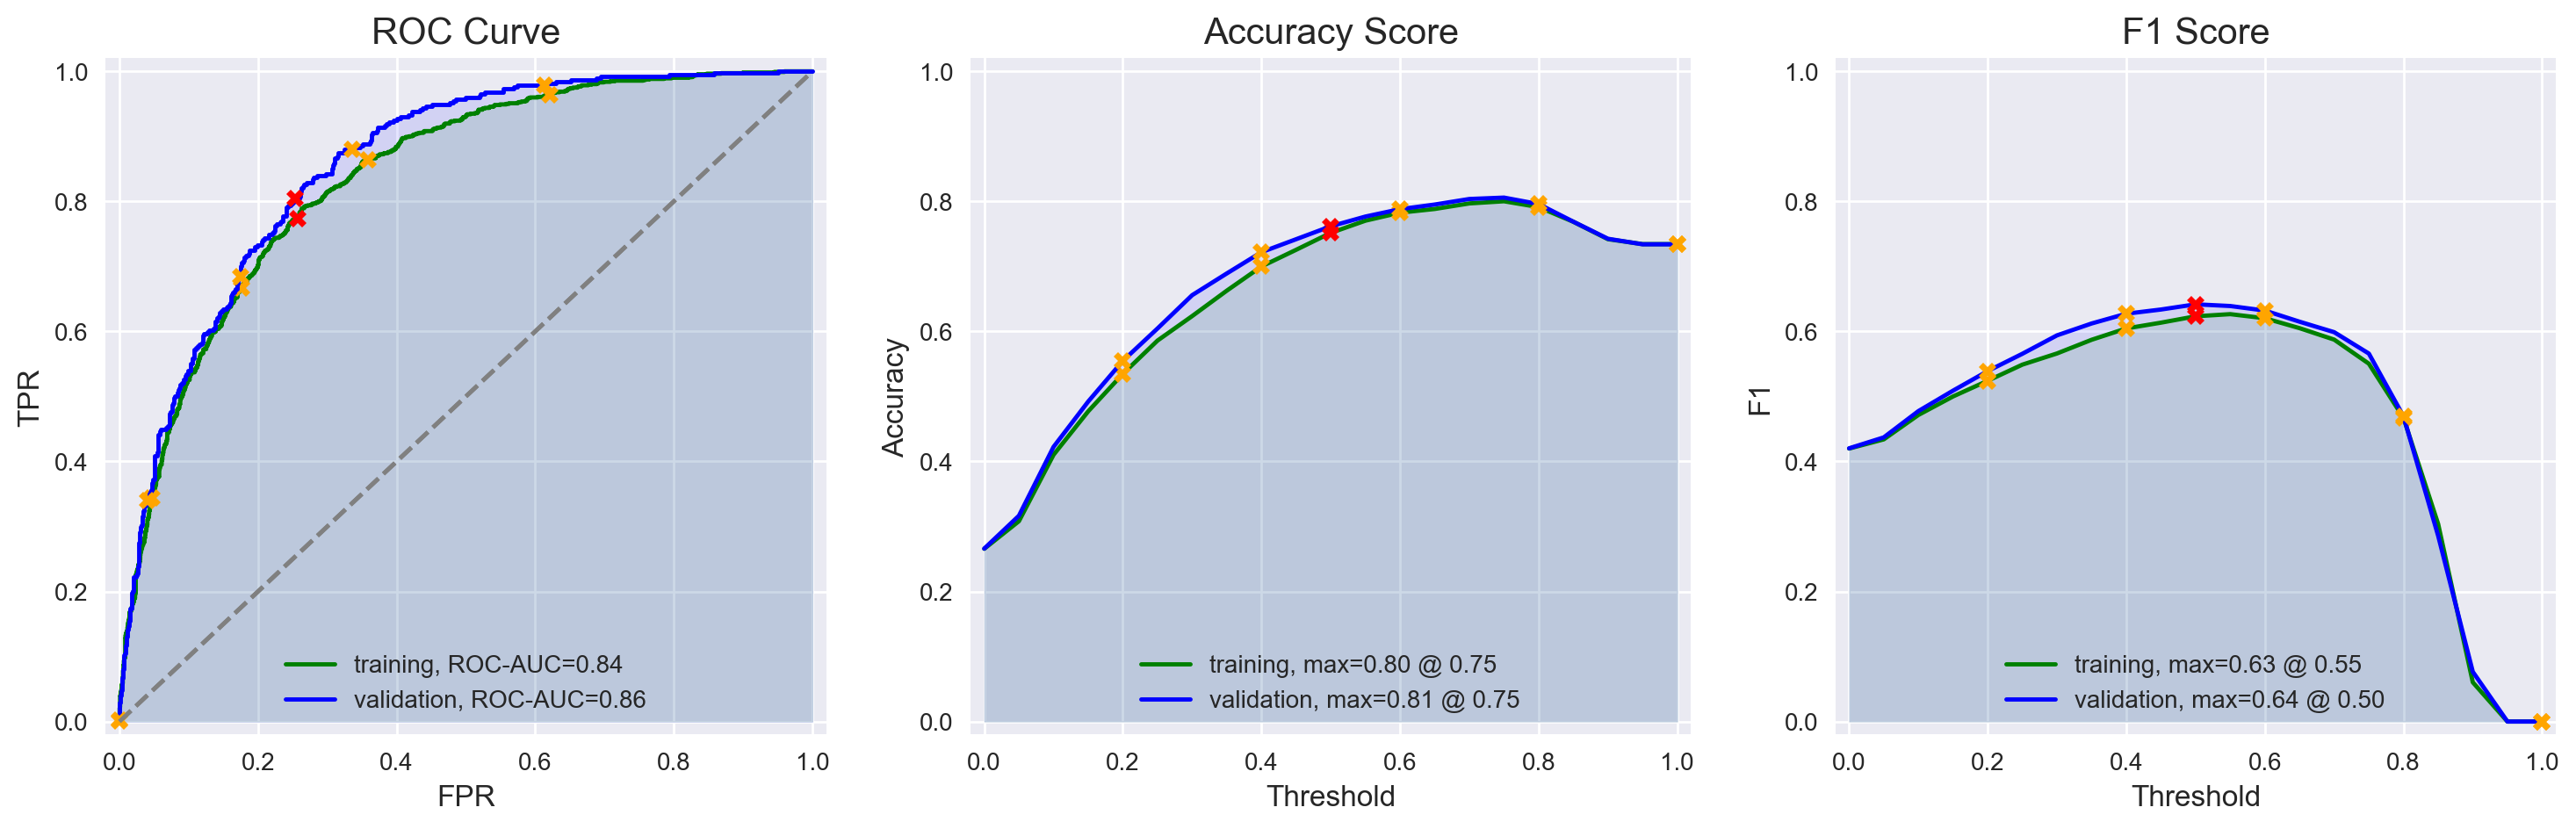

In [73]:
# konfigurasi pelatihan model
lr_best_params = study.best_params
print(f"Logistic regression best parameters: \n{lr_best_params}\n")

# oversampling
if lr_best_params['prop_minority']:
    oversampler = RandomOverSampler(sampling_strategy=lr_best_params['prop_minority']/(1-lr_best_params['prop_minority']), 
                                    random_state=101010, shrinkage=lr_best_params['shrinkage'])
    train_data = oversampler.fit_resample(feature_train, target_train)
else:
    train_data = (feature_train, target_train)

lr = LogisticRegression(penalty='elasticnet', solver='saga', C=lr_best_params['C'], l1_ratio=lr_best_params['l1_ratio'], 
                        class_weight='balanced', random_state=101010, n_jobs=-1)
lr.fit(*train_data)

# evaluasi model
fig, ax = plt.subplots(ncols=3, figsize=(18,5))
model_eval(lr, *train_data, 'green', 'training', ax=ax, with_conf_matrix=True)
model_eval(lr, feature_val, target_val, 'blue', 'validation', ax=ax, with_conf_matrix=True)
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Model memiliki *False Positive* (FP) cukup besar, yaitu 18,6% data *validation set*. Adapun *False Negative* (FN) relatif cukup kecil, yaitu 5,3% data *validation set*. Dari *confusion matrix* tersebut dapat diketahui skor *precision* dan *recall* secara berurutan yaitu 53,5% dan 80,2%. Dari hal tersebut dapat disimpulkan performa model **Logistic Regression** kurang baik pada metrik *precision* sehingga cukup banyak klien yang diprediksi akan berhenti padahal tidak.
* Berdasarkan metrik utama, skor ROC-AUC, terlihat bahwa model mengalami *underfitting*. Hal tersebut dikarenakan model tidak lebih baik saat memprediksi *training set* dibandingkan *validation set*.
* Berikut merupakan hasil evaluasi model pada *validation set* berdasarkan kurva di atas:
    * ROC-AUC = 0,86
    * Akurasi = 0,81 (@threshold = 0,75)
    * F1 = 0,64 (@threshold = 0,50)

</div>

### **Random Forest**

Pada bagian ini, kita akan melakukan optimasi model **Random Forest**. Proses *hyperparameter tuning* untuk sejumlah model membutuhkan waktu cukup lama, maka kita akan melakukan proses *hyperparameter tuning* pada file python yang terpisah. Output selama proses optimasi akan disimpan pada file *log* dan akan dimuat pada notebook ini.

Berikut di bawah ini merupakan *hyperparameter* model **Random Forest** yang akan kita uji:
* **Jenis *loss function* yang digunakan (`criterion`)** : Kita akan menguji *loss function* `'gini'`, `'entropy'` dan `'log_loss'`.
* **Jumlah fitur maksimum yang digunakan (`max_features`)** : Kita akan menguji dengan nilai `'sqrt'`, `'log2'` dan `None`.
* **Kedalaman pohon maksimum (`max_depth`)** : Nilai yang terlalu besar dapat menyebabkan *overfitting*. Kita akan menguji nilai `max_depth` pada rentang 1 hingga 50.
* **Jumlah sampel minimum untuk membagi sebuah *internal node* (`min_samples_split`)** : Nilai yang terlalu kecil dapat mengakibatkan *overfitting*. Kita akan menguji nilai `min_samples_split` pada rentang 2 hingga 30.
* **Jumlah sampel minimum yang terdapat di dalam *leaf node* (`min_samples_leaf`)** :  Nilai yang terlalu kecil dapat mengakibatkan *overfitting*. Kita akan mengatur nilai `min_samples_leaf` pada rentang 1 hingga `min_samples_split - 1`.
* **Jumlah *leaf node* maksimum (`max_leaf_nodes`)** : Nilai yang terlalu besar dapat mengakibatkan *overfitting*. Kita akan menguji nilai `max_leaf_nodes` pada rentang 50 hingga 200.

Selain itu, kita juga akan melakukan optimasi terkait *oversampling* pada dataset. *Oversampling* akan menggunakan model **RandomOverSampler**. Berikut merupakan parameter yang akan diatur:
* **Parameter untuk mengontrol *shrinkage* pada matrik kovarians (`shrinkage`)** : Nilai sama dengan nol menunjukkan data minoritas hanya diduplikasi (tanpa *smoothing*). Akan dilakukan pengujian nilai `shrinkage` pada rentang 0 hingga 3.
* **Menguji sejumlah skema *oversampling*** : 1) Tanpa *oversampling*; 2) *Oversampling* agar komposisi kelas minoritas menjadi 30%, 35%, 40%, 45% dan 50%.

> Note: Proses optimasi/*hyperparameter tuning* akan dilakukan dengan format yang sama seperti yang dilakukan pada model **Logistic Regression**, hanya saja dilakukan pada *script* yang terpisah.

Berikut di bawah ini merupakan *log* proses optimasi model **Random Forest**.

In [74]:
# menampilkan hasil optimasi menggunakan optuna
rf_log_path = './hyperparameter_tuning/random_forest.log'
with open(rf_log_path, 'r') as log_file:
    print(log_file.read())

Trial 0 finished with best value: 0.8699646084649504 and parameters: {'prop_minority': 0.3, 'shrinkage': 1.9559945407135455, 'criterion': 'entropy', 'max_features': 'sqrt', 'max_depth': 26, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_leaf_node': 55}. 
Trial 2 finished with best value: 0.8704478091447996 and parameters: {'prop_minority': 0.4, 'shrinkage': 2.2361563116349368, 'criterion': 'gini', 'max_features': 'sqrt', 'max_depth': 23, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_leaf_node': 184}. 
Trial 4 finished with best value: 0.8706317622186295 and parameters: {'prop_minority': 0.45, 'shrinkage': 0.1085310070918748, 'criterion': 'entropy', 'max_features': None, 'max_depth': 48, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_leaf_node': 95}. 
Trial 6 finished with best value: 0.8720373191559923 and parameters: {'prop_minority': None, 'shrinkage': 1.4173631198628542, 'criterion': 'gini', 'max_features': None, 'max_depth': 13, 'min_samples_split': 23, 'min_sampl

Dari hasil di atas ternyata model terbaik adalah model yang dilatih pada data *oversampling* dengan proporsi data minor sebesar 35%. 

Di bawah ini, kita akan melatih model **Random Forest** menggunakan konfigurasi terbaik di atas dan melakukan evaluasi model. Model akan dievaluasi pada *training set* (*oversampling*) dan *validation set*.

Random Forest best parameters: 
{'prop_minority': 0.35, 'shrinkage': 0.337026220032733, 'criterion': 'entropy', 'max_features': None, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_leaf_node': 112}

================== Normalize Confusion Matrix - training (os) ==================

Prediction  Active (0)  Churn (1)
Actual                           
Active (0)    0.588754   0.061267
Churn (1)     0.047209   0.302770
--------------------------------------------------------------------------------
=================== Normalize Confusion Matrix - validation ====================

Prediction  Active (0)  Churn (1)
Actual                           
Active (0)    0.643670   0.090327
Churn (1)     0.087482   0.178521
--------------------------------------------------------------------------------


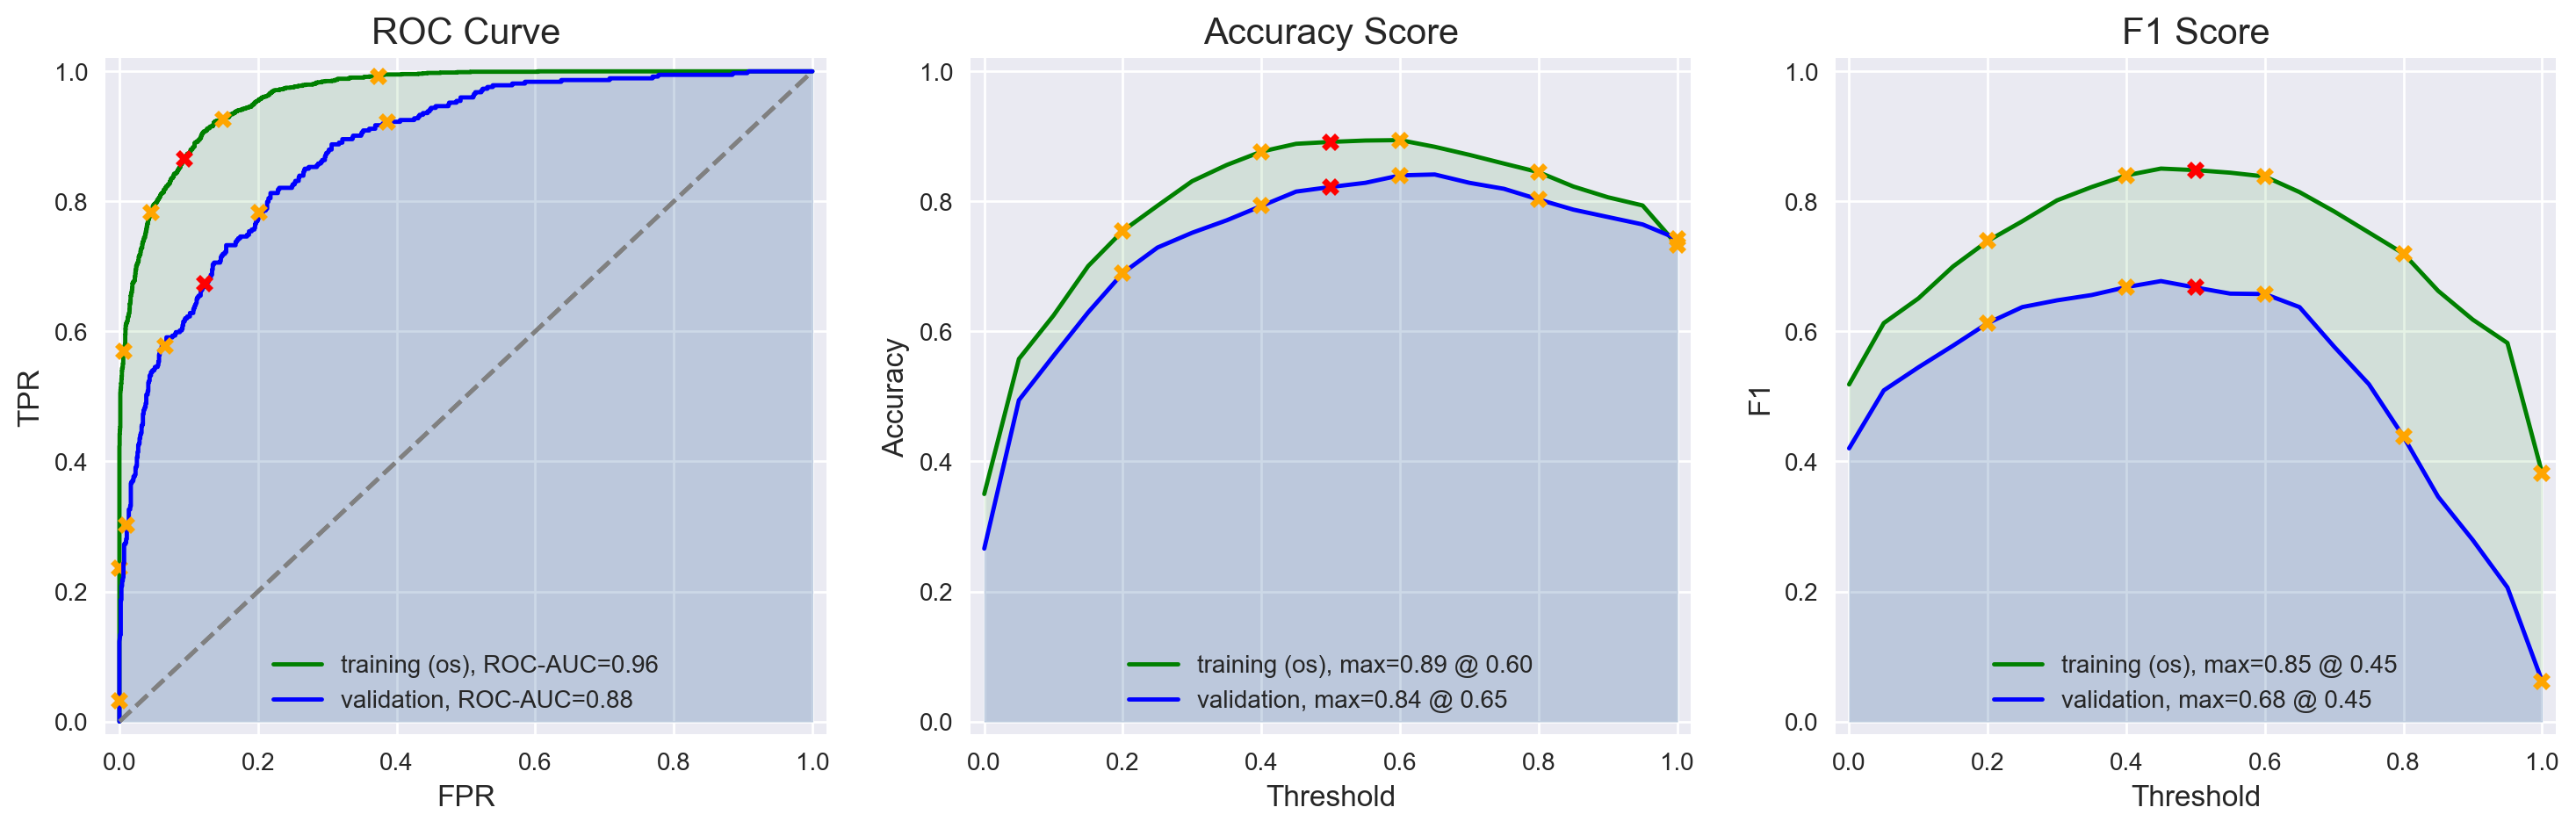

In [75]:
# konfigurasi pelatihan model
with open(rf_log_path, 'r') as log_file:
    # hanya mengambil data Trial, mengabaikan baris log lainnya.
    optuna_result = list(filter(lambda x: x.startswith('Trial'), log_file.readlines()))
    rf_best_params = ast.literal_eval(re.search("{[A-z\d ',:.]+}", optuna_result[-1]).group())
print(f"Random Forest best parameters: \n{rf_best_params}\n")

# oversampling
if rf_best_params['prop_minority']:
    oversampler = RandomOverSampler(sampling_strategy=rf_best_params['prop_minority']/(1-rf_best_params['prop_minority']), 
                                    random_state=101010, shrinkage=rf_best_params['shrinkage'])
    train_data = oversampler.fit_resample(feature_train, target_train)
else:
    train_data = (feature_train, target_train)

rf = RandomForestClassifier(n_estimators=100, max_depth=rf_best_params['max_depth'], min_samples_split=rf_best_params['min_samples_split'],
                            min_samples_leaf=rf_best_params['min_samples_leaf'], max_leaf_nodes=rf_best_params['max_leaf_node'], 
                            max_features=rf_best_params['max_features'], criterion=rf_best_params['criterion'], bootstrap=True, 
                            class_weight='balanced_subsample', n_jobs=-1, random_state=101010)
rf.fit(*train_data)

# evaluasi model
fig, ax = plt.subplots(ncols=3, figsize=(18,5))
model_eval(rf, *train_data, 'green', 'training (os)', ax=ax, with_conf_matrix=True) # os: oversampling
model_eval(rf, feature_val, target_val, 'blue', 'validation', ax=ax, with_conf_matrix=True)
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Model memiliki *False Positive* (FP) dan *False Negative* (FN) cukup rendah, di bawah 10%. Persentase data FP dan FN pada *validation set* secara berurutan, yaitu 9,0% dan 8,7%. Dari *confusion matrix* tersebut dapat diketahui skor *precision* dan *recall* secara berurutan yaitu 66,4% dan 67,1%. Dari hasil tersebut dapat disimpulkan bahwa performa model **Random Forest** cukup seimbang dari sisi metrik *precision* dan *recall*. Apabila dibandingkan dengan model **Logistic Regression**, model **Random Forest** memiliki skor *precision* yang lebih baik (+12,9%) tetapi memiliki skor *recall* yang lebih buruk (-13,1%).
* Berdasarkan metrik utama, skor ROC-AUC, terlihat bahwa model mengalami *overfitting*. Terdapat selisih sebesar 0,08 angka antara skor ROC-AUC *validation set* dan *training set*. Dibandingkan dengan model **Logistic Regression**, model **Random Forest** memiliki skor ROC-AUC, akurasi dan F1 yang lebih baik.
* Berikut merupakan hasil evaluasi model pada *validation set* berdasarkan kurva di atas:
    * ROC-AUC = 0,88
    * Akurasi = 0,84 (@threshold = 0,65)
    * F1 = 0,68 (@threshold = 0,45)

</div>

### **Gradient Boosting**

Pada bagian ini, kita akan melakukan optimasi model **Gradient Boosting**. Proses *hyperparameter tuning* untuk sejumlah model membutuhkan waktu cukup lama, maka kita akan melakukan proses *hyperparameter tuning* pada file python yang terpisah. Output selama proses optimasi akan disimpan pada file *log* dan akan dimuat pada notebook ini.

Berikut di bawah ini merupakan *hyperparameter* model **Gradient Boosting** yang akan kita uji:
* **Kedalaman pohon maksimum (`max_depth`)** : Pohon yang terlalu dalam dapat mengakibatkan *overfitting*. Sebaliknya, pohon yang terlalu dangkal dapat menyebabkan *underfitting*. Oleh karena itu kita akan menguji kedalaman pohon sebesar 1 hingga 50.
* **Jumlah *leaf node* maksimum (`max_leaves`)** : Nilai yang terlalu besar dapat mengakibatkan *overfitting*. Kita akan menguji nilai `max_leaves` pada rentang 50 hingga 200.
* **Konstanta laju pembelajaran (`learning_rate`)** : Konstanta yang berfungsi untuk memperoleh *global optimum* dan menghindari *local optimum*. Kita akan menguji nilai `learning_rate` pada rentang 0,0001 hingga 0,5.
* **Konstanta regularisasi L1 (`reg_alpha`)** : Konstanta yang berfungsi untuk mengurangi *overfitting*. Kita akan menguji nilai `reg_alpha` pada rentang 0 hingga 100.
* **Konstanta regularisasi L2 (`reg_lambda`)** : Konstanta yang berfungsi untuk mengurangi *overfitting*. Kita akan menguji nilai `reg_lambda` pada rentang 0 hingga 100.

Selain itu, kita juga akan melakukan optimasi terkait *oversampling* pada dataset. *Oversampling* akan menggunakan model **RandomOverSampler**. Berikut merupakan parameter yang akan diatur:
* **Parameter untuk mengontrol *shrinkage* pada matrik kovarians (`shrinkage`)** : Nilai sama dengan nol menunjukkan data minoritas hanya diduplikasi (tanpa *smoothing*). Akan dilakukan pengujian nilai `shrinkage` pada rentang 0 hingga 3.
* **Menguji sejumlah skema *oversampling*** : 1) Tanpa *oversampling*; 2) *Oversampling* agar komposisi kelas minoritas menjadi 30%, 35%, 40%, 45% dan 50%.

> Note: Proses optimasi/*hyperparameter tuning* akan dilakukan dengan format yang sama seperti yang dilakukan pada model **Logistic Regression**, hanya saja dilakukan pada *script* yang terpisah.

Berikut di bawah ini merupakan *log* proses optimasi model **Gradient Boosting**.

In [76]:
# menampilkan hasil optimasi menggunakan optuna
gb_log_path = './hyperparameter_tuning/gradient_boosting.log'
with open(gb_log_path, 'r') as log_file:
    print(log_file.read())

Trial 0 finished with best value: 0.8533090826182481 and parameters: {'prop_minority': 0.3, 'shrinkage': 1.9559945407135455, 'max_depth': 13, 'max_leaves': 183, 'learning_rate': 0.31414138458209584, 'reg_alpha': 83.58889380531987, 'reg_lambda': 34.2664468945313}. 
Trial 1 finished with best value: 0.8608900219707333 and parameters: {'prop_minority': 0.5, 'shrinkage': 1.867849840142625, 'max_depth': 43, 'max_leaves': 135, 'learning_rate': 0.22843505646029316, 'reg_alpha': 47.991366910098634, 'reg_lambda': 61.1165500548649}. 
Trial 6 finished with best value: 0.8634886829996269 and parameters: {'prop_minority': None, 'shrinkage': 1.4111027413059185, 'max_depth': 15, 'max_leaves': 191, 'learning_rate': 0.4719835023956262, 'reg_alpha': 27.671729035318094, 'reg_lambda': 76.49505452740023}. 
Trial 7 finished with best value: 0.8759145835924222 and parameters: {'prop_minority': 0.45, 'shrinkage': 1.7483225661630135, 'max_depth': 44, 'max_leaves': 143, 'learning_rate': 0.43260736342778244, 're

Dari hasil di atas ternyata model terbaik adalah model yang dilatih pada data *oversampling* dengan proporsi data minor sebesar 50%. 

Di bawah ini, kita akan melatih model **Gradient Boosting** menggunakan konfigurasi terbaik di atas dan melakukan evaluasi model. Model akan dievaluasi pada *training set* (*oversampling*) dan *validation set*.

Gradient Boosting best parameters: 
{'prop_minority': 0.5, 'shrinkage': 1.1934483534500178, 'max_depth': 3, 'max_leaves': 64, 'learning_rate': 0.4595063407427484, 'reg_alpha': 0.011498869063520073, 'reg_lambda': 0.12188105631903101}

================== Normalize Confusion Matrix - training (os) ==================

Prediction  Active (0)  Churn (1)
Actual                           
Active (0)    0.483538   0.016462
Churn (1)     0.046482   0.453518
--------------------------------------------------------------------------------
=================== Normalize Confusion Matrix - validation ====================

Prediction  Active (0)  Churn (1)
Actual                           
Active (0)    0.697724   0.036273
Churn (1)     0.095306   0.170697
--------------------------------------------------------------------------------


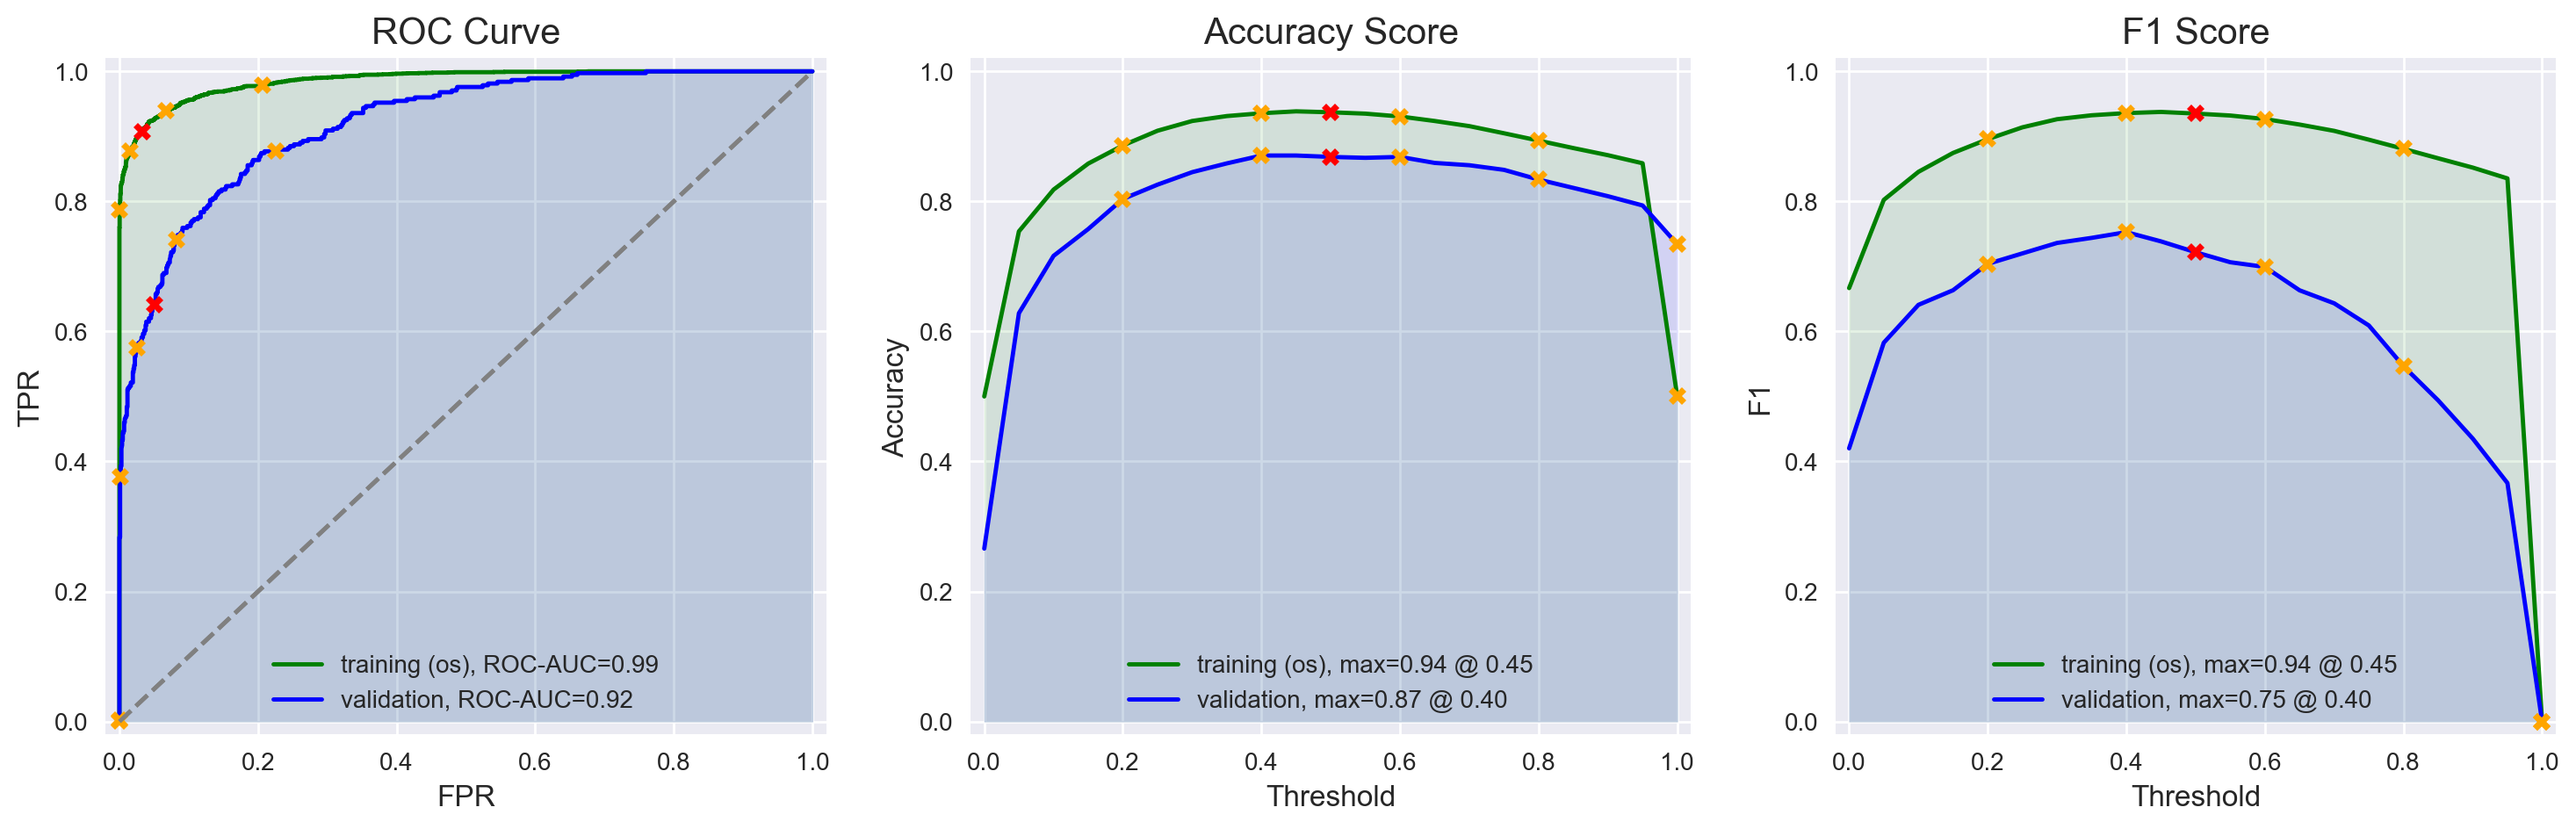

In [77]:
# konfigurasi pelatihan model
with open(gb_log_path, 'r') as log_file:
    # hanya mengambil data Trial, mengabaikan baris log lainnya.
    optuna_result = list(filter(lambda x: x.startswith('Trial'), log_file.readlines()))
    gb_best_params = ast.literal_eval(re.search("{[A-z\d ',:.]+}", optuna_result[-1]).group())
print(f"Gradient Boosting best parameters: \n{gb_best_params}\n")

# oversampling
if gb_best_params['prop_minority']:
    oversampler = RandomOverSampler(sampling_strategy=gb_best_params['prop_minority']/(1-gb_best_params['prop_minority']), 
                                    random_state=101010, shrinkage=gb_best_params['shrinkage'])
    train_data = oversampler.fit_resample(feature_train, target_train)
else:
    train_data = (feature_train, target_train)

xgbc = XGBClassifier(n_estimators=100, max_depth=gb_best_params['max_depth'], max_leaves=gb_best_params['max_leaves'], 
                     learning_rate=gb_best_params['learning_rate'], reg_alpha=gb_best_params['reg_alpha'], 
                     reg_lambda=gb_best_params['reg_lambda'], n_jobs=-1, random_state=101010)

xgbc.fit(*train_data)

# evaluasi model
fig, ax = plt.subplots(ncols=3, figsize=(18,5))
model_eval(xgbc, *train_data, 'green', 'training (os)', ax=ax, with_conf_matrix=True) # os: oversampling
model_eval(xgbc, feature_val, target_val, 'blue', 'validation', ax=ax, with_conf_matrix=True)
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Model memiliki *False Positive* (FP) dan *False Negative* (FN) cukup rendah, yaitu di bawah 10%. Persentase data FP dan FN pada *validation set* secara berurutan, yaitu 3,6% dan 9,5%. Dari *confusion matrix* tersebut dapat diketahui skor *precision* dan *recall* secara berurutan yaitu 82,5% dan 64,2%. Dari hasil tersebut dapat disimpulkan bahwa performa model **Gradient Boosting** kurang baik pada metrik *recall* sehingga cukup banyak klien yang akan berhenti berlangganan diprediksi akan tetap bertahan. Apabila dibandingkan dengan model **Logistic Regression**, model **Gradient Boosting** memiliki skor *precision* yang lebih baik (+29%) tetapi memiliki skor *recall* yang lebih buruk (-16%). Apabila dibandingkan dengan model **Random Forest**, model **Gradient Boosting** memiliki skor *precision* yang lebih baik (+16,1%) tetapi memiliki skor *recall* yang lebih buruk (-2,9%).
* Berdasarkan metrik utama, skor ROC-AUC, terlihat bahwa model mengalami *overfitting*. Terdapat selisih sebesar 0,07 angka antara skor ROC-AUC *validation set* dan *training set*. Dibandingkan dengan model **Logistic Regression** dan **Random Forest**, model **Gradient Boosting** memiliki skor ROC-AUC, akurasi dan F1 yang lebih baik.
* Berikut merupakan hasil evaluasi model pada *validation set* berdasarkan kurva di atas:
    * ROC-AUC = 0,92
    * Akurasi = 0,87 (@threshold = 0,40)
    * F1 = 0,75 (@threshold = 0,40)

</div>

## 3) Evaluasi Model

Dari hasil optimasi pada sesi sebelumnya, hanya model **Random Forest** dan **Gradient Boosting** yang dapat mencapai target skor ROC-AUC minimum, yaitu sebesar 0,88. Kedua model tersebut memperoleh skor ROC-AUC sebesar 0,88 dan 0,92 secara berturut-turut ketika memprediksi *validation set*. Oleh karena itu, pada sesi **Evaluasi Model** ini, kita akan menguji model **Gradient Boosting** pada *testing set* dan dibandingkan kemampuannya dengan hasil prediksi *validation set*.

Dari temuan sebelumnya, nilai *threshold* terbaik untuk model **Gradient Boosting** yaitu 0,40 ketika memprediksi *validation set*. Nilai ambang tersebut dapat menghasilkan nilai akurasi dan F1 sebesar 0,87 dan 0,75 secara berturut-turut.

=================== Normalize Confusion Matrix - validation ====================

Prediction  Active (0)  Churn (1)
Actual                           
Active (0)    0.697724   0.036273
Churn (1)     0.095306   0.170697
--------------------------------------------------------------------------------
===================== Normalize Confusion Matrix - testing =====================

Prediction  Active (0)  Churn (1)
Actual                           
Active (0)    0.684435   0.049751
Churn (1)     0.089552   0.176262
--------------------------------------------------------------------------------


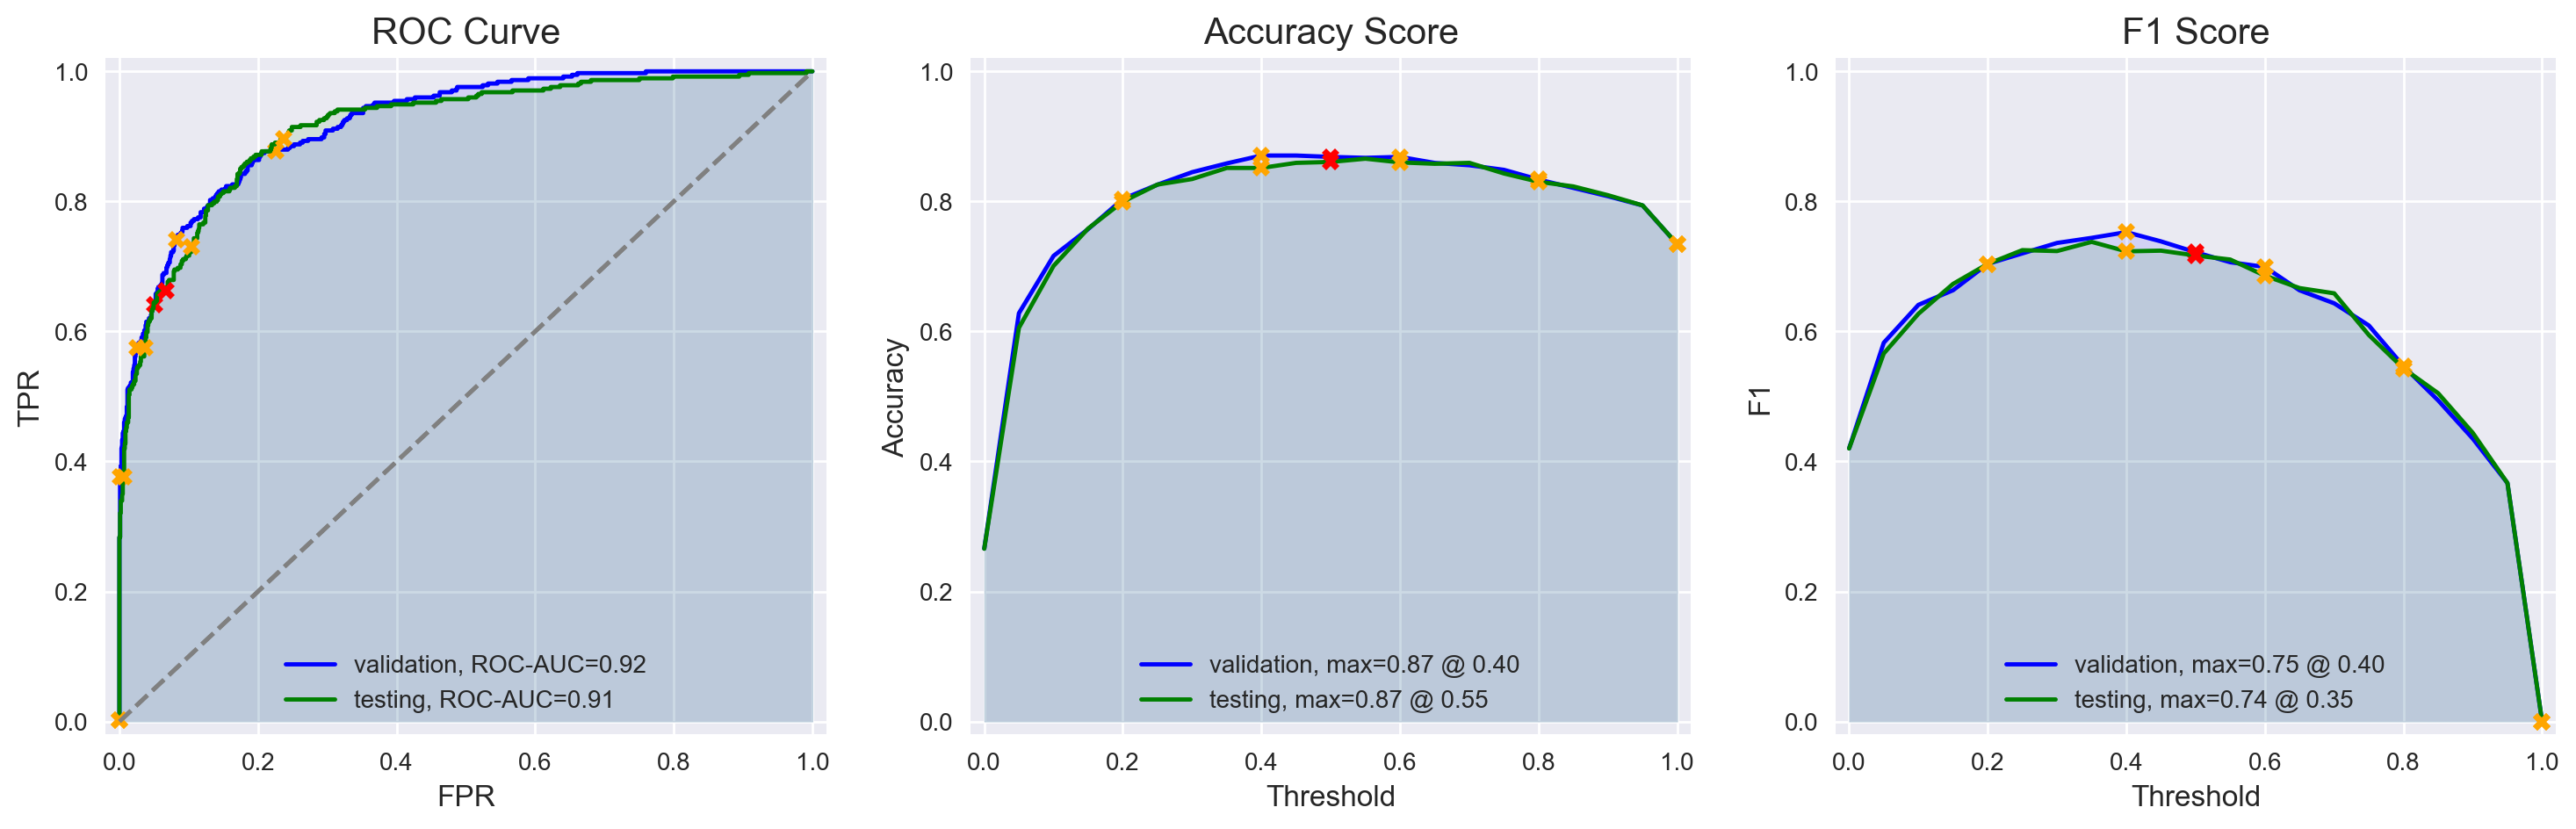

In [78]:
# evaluasi model
fig, ax = plt.subplots(ncols=3, figsize=(18,5))
model_eval(xgbc, feature_val, target_val, 'blue', 'validation', ax=ax, with_conf_matrix=True)
model_eval(xgbc, feature_test, target_test, 'green', 'testing', ax=ax, with_conf_matrix=True) # os: oversampling
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari hasil proporsi *confusion matrix* untuk kedua dataset, terlihat nilai proporsi yang relatif sama. Hal ini menunjukkan bahwa model cukup stabil dalam memrediksi *unseen data*. Hal yang sama juga terlihat pada kurva di atas, dimana kedua kurva relatif saling berimpitan yang menunjukkan kemampuan prediksi relatif stabil dan konsisten.
* Dari hasil di atas, berikut merupakan evaluasi model pada *testing set*:
    * Precision : 78,0% (@threshold = 0,50)
    * Recall : 66,3% (@threshold = 0,50)
    * ROC-AUC : 0,91
    * Akurasi : 0,87 (@threshold = 0,55)
    * F1 : 0,74 (@threshold = 0,35)

</div>

Berikut di bawah ini, kita akan menggabungkan *pipeline* rekayasa fitur dan model yang sudah dilatih, kemudian menyimpannya agar dapat digunakan pada tahap produksi.

In [79]:
# membuat pipeline
churn_predictor_pipeline = Pipeline([('feature_eng', feat_eng_pipe),
                                     ('predictive_model', xgbc)])

# menyimpan pipeline
joblib.dump(churn_predictor_pipeline, '../assets/churn_predictor_pipeline.pkl')

['../assets/churn_predictor_pipeline.pkl']

# **G. Kesimpulan**

<h3 style="font-weight:bold; font-family:Trebuchet MS">Hasil Analisa Data</h3>
<div style="margin-left:2%; width:95%; text-align:justify">

* Lebih sedikit ditemukan pengguna yang berhenti berlangganan ketika menggunakan layanan telepon saja. Pengguna yang berhenti berlangganan mayoritas berasal dari pengguna layanan internet dan telepon secara bersamaan. Kemungkinan besar alasan klien berhenti berlangganan terkait dengan ketidakpuasan pada layanan internet.
* Mayoritas pengguna layanan telepon hanya menggunakan 1-saluran telepon, yaitu sebesar 3385 per 6352 pengguna (53%). Secara proporsi, mayoritas klien yang berhenti berlanggan berasal dari pengguna layanan telepon multi-saluran.
* Pengguna layanan internet berbasis teknologi fiber optik merupakan yang terbesar, tetapi memiliki *churn rate* yang sangat tinggi yaitu sebesar 41,9%. Faktor persaingan harga antar kompetitor dapat menjadi penyebab *churn rate* yang tinggi.
* Jumlah layanan tambahan yang umum digunakan oleh pengguna layanan internet yaitu sebanyak 2 hingga 4 jenis layanan. 4 jenis layanan tambahan yang paling diminati, yaitu layanan *streaming film*, *streaming TV*, *cloud* untuk *online backup* dan layanan anti-virus/*device protection*.
* Mayoritas klien melakukan kontrak secara bulanan. Pada kategori kontrak per bulan, peluang klien berhenti berlangganan yaitu sebesar 42,7%. Pada kategori kontrak per 1 tahun, peluang klien berhenti berlangganan yaitu sebesar 11,3%. Adapun untuk kategori kontrak per 2 tahun, peluang klien berhenti berlangganan yaitu sebesar 2,8%.
* Tipikal durasi berlangganan untuk klien non-aktif yaitu sebesar 304 hari (~10 bulan). Adapun untuk klien aktif, yang mana durasi berlangganan masih terus berlanjut, hingga saat ini memiliki tipikal durasi berlangganan sebesar 1157 hari (~3 tahun). Dibutuhkan waktu sekitar 10 bulan untuk klien melakukan penyesuaian dan memutuskan apakah tetap terus berlangganan atau berhenti segera dari layanan telekomunikasi yang digunakan. Oleh karena itu, perlu ditingkatkan pelayanan untuk klien baru pada fase ini sehingga dapat meningkatkan retensi pelanggan.
* Tipikal tagihan bulanan klien yang aktif berada pada angka USD 64,4. Adapun tipikal tagihan bulanan klien yang non-aktif berada pada angka USD 79,6.


</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Hasil Membangun Model</h3>
<div style="margin-left:2%; width:95%; text-align:justify">

* Dari ketiga model yang diuji, hanya model **Random Forest** dan **Gradient Boosting** yang dapat mencapai target skor ROC-AUC minimum, yaitu sebesar 0,88. Dari hasil prediksi *validation set*, model **Random Forest** memperoleh skor ROC-AUC sebesar 0,88. Adapun model **Gradient Boosting** memperoleh skor ROC-AUC sebesar 0,92.
* Model **Gradient Boosting** cukup stabil ketika memprediksi *testing set*. Skor ROC-AUC saat model memprediksi *testing set*, yaitu 0,91. 
* Berdasarkan hasil *validation set*, nilai ambang batas (*threshold*) terbaik yang dapat digunakan pada model **Gradient Boosting**, yaitu 40%.
* Berikut merupakan *hyperparameter* terbaik untuk model **Gradient Boosting** pada proyek ini:
    * `'max_depth'` : 3
    * `'max_leaves'` : 64
    * `'learning_rate'` : 0.4595063407427484
    * `'reg_alpha'` : 0.011498869063520073
    * `'reg_lambda'` : 0.12188105631903101
* Berikut merupakan konfigurasi *oversampling* data pelatihan terbaik untuk model **Gradient Boosting**:
    * `'prop_minority'` : 0.5
    * `'shrinkage'` : 1.1934483534500178

</div>